In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import timeit
from sklearn.metrics import mean_squared_error
import math
import spgl1 as spgl1
from sklearn.linear_model import orthogonal_mp
import pywt
from data_matrices import *
from sys import getsizeof
#import DLIPsim as dlip
import inspect
from pprint import pprint
import warnings
import h5py
from cs_utils import *
warnings.filterwarnings('ignore')

In [2]:
#'undersampling-freq-db2-haar-sym2-arrays-snr=-10-db.hdf5'
#'undersampling-position-db2-haar-sym2-arrays-snr=-10-db.hdf5'
snr = [-30,-20,-10,0,10,20,30,40]
#snr = [-20,-10]
str_position_aux = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10
str_freq_aux = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10
str_combined_aux = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10
#file_hf5 = filename
#hf = h5py.File(file_hf5, 'r')
#with h5py.File(file_hf5, 'r') as f:
#    g = f.visit(print)
#percentage = np.array(hf['percentage'])
percentage = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45, \
                       0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.])
#print(percentage)
print(str_position_aux)
print(str_freq_aux)

hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=-10-db.hdf5
hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=-10-db.hdf5


In [3]:
with h5py.File(str_position_aux, 'r') as f:
    g = f.visit(print)
with h5py.File(str_freq_aux, 'r') as f:
    g = f.visit(print)
with h5py.File(str_combined_aux, 'r') as f:
    g = f.visit(print)

error-psnr-omp-db2
error-psnr-omp-haar
error-psnr-omp-sym2
error-psnr-spgl1-db2
error-psnr-spgl1-haar
error-psnr-spgl1-sym2
percentage
psnr-omp-db2
psnr-omp-haar
psnr-omp-sym2
psnr-spgl1-db2
psnr-spgl1-haar
psnr-spgl1-sym2
rmse-omp-error-module-db2
rmse-omp-error-module-haar
rmse-omp-error-module-sym2
rmse-omp-error-phase-db2
rmse-omp-error-phase-haar
rmse-omp-error-phase-sym2
rmse-omp-module-db2
rmse-omp-module-haar
rmse-omp-module-sym2
rmse-omp-phase-db2
rmse-omp-phase-haar
rmse-omp-phase-sym2
rmse-slpgl1-phase-db2
rmse-slpgl1-phase-haar
rmse-slpgl1-phase-sym2
rmse-spgl1-error-module-db2
rmse-spgl1-error-module-haar
rmse-spgl1-error-module-sym2
rmse-spgl1-error-phase-db2
rmse-spgl1-error-phase-haar
rmse-spgl1-error-phase-sym2
rmse-spgl1-module-db2
rmse-spgl1-module-haar
rmse-spgl1-module-sym2
error-psnr-omp-db2
error-psnr-omp-haar
error-psnr-omp-sym2
error-psnr-spgl1-db2
error-psnr-spgl1-haar
error-psnr-spgl1-sym2
percentage
psnr-omp-db2
psnr-omp-haar
psnr-omp-sym2
psnr-spgl1-db2
psn

In [4]:
def GetArrays(filename):
    file_hf5 = filename
    hf = h5py.File(file_hf5, 'r')
    #with h5py.File(file_hf5, 'r') as f:
    #    g = f.visit(print)
    percentage = np.array(hf['percentage'])
    
    psnr_omp_db2 = np.array(hf['psnr-omp-db2'])
    error_psnr_omp_db2 = np.array(hf['error-psnr-omp-db2'])
    rmse_omp_module_db2 = np.array(hf['rmse-omp-module-db2'])
    rmse_omp_error_module_db2 = np.array(hf['rmse-omp-error-module-db2'])
    rmse_omp_phase_db2 = np.array(hf['rmse-omp-phase-db2'])
    rmse_omp_error_phase_db2 = np.array(hf['rmse-omp-error-phase-db2'])

    psnr_omp_haar = np.array(hf['psnr-omp-haar'])
    error_psnr_omp_haar = np.array(hf['error-psnr-omp-haar'])
    rmse_omp_module_haar = np.array(hf['rmse-omp-module-haar'])
    rmse_omp_error_module_haar = np.array(hf['rmse-omp-error-module-haar'])
    rmse_omp_phase_haar = np.array(hf['rmse-omp-phase-haar'])
    rmse_omp_error_phase_haar = np.array(hf['rmse-omp-error-phase-haar'])

    psnr_omp_sym2 = np.array(hf['psnr-omp-sym2'])
    error_psnr_omp_sym2 = np.array(hf['error-psnr-omp-sym2'])
    rmse_omp_module_sym2 = np.array(hf['rmse-omp-module-sym2'])
    rmse_omp_error_module_sym2 = np.array(hf['rmse-omp-error-module-sym2'])
    rmse_omp_phase_sym2 = np.array(hf['rmse-omp-phase-sym2'])
    rmse_omp_error_phase_sym2 = np.array(hf['rmse-omp-error-phase-sym2'])

    psnr_spgl1_db2 = np.array(hf['psnr-spgl1-db2'])
    error_psnr_spgl1_db2 = np.array(hf['error-psnr-spgl1-db2'])
    rmse_spgl1_module_db2 = np.array(hf['rmse-spgl1-module-db2'])
    rmse_spgl1_error_module_db2 = np.array(hf['rmse-spgl1-error-module-db2'])
    rmse_spgl1_phase_db2 = np.array(hf['rmse-slpgl1-phase-db2'])
    rmse_spgl1_error_phase_db2 = np.array(hf['rmse-spgl1-error-phase-db2'])

    psnr_spgl1_haar = np.array(hf['psnr-spgl1-haar'])
    error_psnr_spgl1_haar = np.array(hf['error-psnr-spgl1-haar'])
    rmse_spgl1_module_haar = np.array(hf['rmse-spgl1-module-haar'])
    rmse_spgl1_error_module_haar = np.array(hf['rmse-spgl1-error-module-haar'])
    rmse_spgl1_phase_haar = np.array(hf['rmse-slpgl1-phase-haar'])
    rmse_spgl1_error_phase_haar = np.array(hf['rmse-spgl1-error-phase-haar'])

    psnr_spgl1_sym2 = np.array(hf['psnr-spgl1-sym2'])
    error_psnr_spgl1_sym2 = np.array(hf['error-psnr-spgl1-sym2'])
    rmse_spgl1_module_sym2 = np.array(hf['rmse-spgl1-module-sym2'])
    rmse_spgl1_error_module_sym2 = np.array(hf['rmse-spgl1-error-module-sym2'])
    rmse_spgl1_phase_sym2 = np.array(hf['rmse-slpgl1-phase-sym2'])
    rmse_spgl1_error_phase_sym2 = np.array(hf['rmse-spgl1-error-phase-sym2'])
    
    return  psnr_omp_db2,error_psnr_omp_db2,rmse_omp_module_db2,rmse_omp_error_module_db2,rmse_omp_phase_db2,rmse_omp_error_phase_db2,psnr_omp_haar,error_psnr_omp_haar,    rmse_omp_module_haar,rmse_omp_error_module_haar,rmse_omp_phase_haar,rmse_omp_error_phase_haar,psnr_omp_sym2,error_psnr_omp_sym2,rmse_omp_module_sym2,rmse_omp_error_module_sym2,rmse_omp_phase_sym2,rmse_omp_error_phase_sym2,psnr_spgl1_db2,error_psnr_spgl1_db2,rmse_spgl1_module_db2,rmse_spgl1_error_module_db2,rmse_spgl1_phase_db2,rmse_spgl1_error_phase_db2,psnr_spgl1_haar,error_psnr_spgl1_haar,rmse_spgl1_module_haar,rmse_spgl1_error_module_haar,rmse_spgl1_phase_haar,rmse_spgl1_error_phase_haar,psnr_spgl1_sym2,error_psnr_spgl1_sym2,rmse_spgl1_module_sym2,rmse_spgl1_error_module_sym2,rmse_spgl1_phase_sym2,rmse_spgl1_error_phase_sym2    

In [5]:
#filename_40dB = 'db2-haar-sym2-arrays-snr=%d-db.hdf5' % 40
#psnr_omp_db2_40dB,error_psnr_omp_db2_40dB,rmse_omp_module_db2_40dB,rmse_omp_error_module_db2_40dB,rmse_omp_phase_db2_40dB,rmse_omp_error_phase_db2_40dB,psnr_omp_haar_40dB,error_psnr_omp_haar_40dB,    rmse_omp_module_haar_40dB,rmse_omp_error_module_haar_40dB,rmse_omp_phase_haar_40dB,rmse_omp_error_phase_haar_40dB,psnr_omp_sym2_40dB_40dB,error_psnr_omp_sym2_40dB_40dB,rmse_omp_module_sym2_40dB_40dB,rmse_omp_error_module_sym2_40dB_40dB,rmse_omp_phase_sym2_40dB_40dB,rmse_omp_error_phase_sym2_40dB_40dB,psnr_spgl1_db2_40dB,error_psnr_spgl1_db2_40dB,rmse_spgl1_module_db2_40dB,rmse_spgl1_error_module_db2_40dB,rmse_spgl1_phase_db2_40dB,rmse_spgl1_error_phase_db2_40dB,psnr_spgl1_haar_40dB,error_psnr_spgl1_haar_40dB,rmse_spgl1_module_haar_40dB,rmse_spgl1_error_module_haar_40dB,rmse_spgl1_phase_haar_40dB,rmse_spgl1_error_phase_haar_40dB,psnr_spgl1_sym2_40dB_40dB,error_psnr_spgl1_sym2_40dB_40dB,rmse_spgl1_module_sym2_40dB_40dB,rmse_spgl1_error_module_sym2_40dB_40dB,rmse_spgl1_phase_sym2_40dB_40dB,rmse_spgl1_error_phase_sym2_40dB_40dB = GetArrays(filename_40dB)
#filename_30dB = 'db2-haar-sym2-arrays-snr=%d-db.hdf5' % 30
#psnr_omp_db2_30dB,error_psnr_omp_db2_30dB,rmse_omp_module_db2_30dB,rmse_omp_error_module_db2_30dB,rmse_omp_phase_db2_30dB,rmse_omp_error_phase_db2_30dB,psnr_omp_haar_30dB,error_psnr_omp_haar_30dB,    rmse_omp_module_haar_30dB,rmse_omp_error_module_haar_30dB,rmse_omp_phase_haar_30dB,rmse_omp_error_phase_haar_30dB,psnr_omp_sym2_30dB_30dB,error_psnr_omp_sym2_30dB_30dB,rmse_omp_module_sym2_30dB_30dB,rmse_omp_error_module_sym2_30dB_30dB,rmse_omp_phase_sym2_30dB_30dB,rmse_omp_error_phase_sym2_30dB_30dB,psnr_spgl1_db2_30dB,error_psnr_spgl1_db2_30dB,rmse_spgl1_module_db2_30dB,rmse_spgl1_error_module_db2_30dB,rmse_spgl1_phase_db2_30dB,rmse_spgl1_error_phase_db2_30dB,psnr_spgl1_haar_30dB,error_psnr_spgl1_haar_30dB,rmse_spgl1_module_haar_30dB,rmse_spgl1_error_module_haar_30dB,rmse_spgl1_phase_haar_30dB,rmse_spgl1_error_phase_haar_30dB,psnr_spgl1_sym2_30dB_30dB,error_psnr_spgl1_sym2_30dB_30dB,rmse_spgl1_module_sym2_30dB_30dB,rmse_spgl1_error_module_sym2_30dB_30dB,rmse_spgl1_phase_sym2_30dB_30dB,rmse_spgl1_error_phase_sym2_30dB_30dB = GetArrays(filename_30dB)
#filename_20dB = 'db2-haar-sym2-arrays-snr=%d-db.hdf5' % 20
#psnr_omp_db2_20dB,error_psnr_omp_db2_20dB,rmse_omp_module_db2_20dB,rmse_omp_error_module_db2_20dB,rmse_omp_phase_db2_20dB,rmse_omp_error_phase_db2_20dB,psnr_omp_haar_20dB,error_psnr_omp_haar_20dB,    rmse_omp_module_haar_20dB,rmse_omp_error_module_haar_20dB,rmse_omp_phase_haar_20dB,rmse_omp_error_phase_haar_20dB,psnr_omp_sym2_20dB_20dB,error_psnr_omp_sym2_20dB_20dB,rmse_omp_module_sym2_20dB_20dB,rmse_omp_error_module_sym2_20dB_20dB,rmse_omp_phase_sym2_20dB_20dB,rmse_omp_error_phase_sym2_20dB_20dB,psnr_spgl1_db2_20dB,error_psnr_spgl1_db2_20dB,rmse_spgl1_module_db2_20dB,rmse_spgl1_error_module_db2_20dB,rmse_spgl1_phase_db2_20dB,rmse_spgl1_error_phase_db2_20dB,psnr_spgl1_haar_20dB,error_psnr_spgl1_haar_20dB,rmse_spgl1_module_haar_20dB,rmse_spgl1_error_module_haar_20dB,rmse_spgl1_phase_haar_20dB,rmse_spgl1_error_phase_haar_20dB,psnr_spgl1_sym2_20dB_20dB,error_psnr_spgl1_sym2_20dB_20dB,rmse_spgl1_module_sym2_20dB_20dB,rmse_spgl1_error_module_sym2_20dB_20dB,rmse_spgl1_phase_sym2_20dB_20dB,rmse_spgl1_error_phase_sym2_20dB_20dB = GetArrays(filename_20dB)
#filename_10dB = 'db2-haar-sym2-arrays-snr=%d-db.hdf5' % 10
#psnr_omp_db2_10dB,error_psnr_omp_db2_10dB,rmse_omp_module_db2_10dB,rmse_omp_error_module_db2_10dB,rmse_omp_phase_db2_10dB,rmse_omp_error_phase_db2_10dB,psnr_omp_haar_10dB,error_psnr_omp_haar_10dB,    rmse_omp_module_haar_10dB,rmse_omp_error_module_haar_10dB,rmse_omp_phase_haar_10dB,rmse_omp_error_phase_haar_10dB,psnr_omp_sym2_10dB_10dB,error_psnr_omp_sym2_10dB_10dB,rmse_omp_module_sym2_10dB_10dB,rmse_omp_error_module_sym2_10dB_10dB,rmse_omp_phase_sym2_10dB_10dB,rmse_omp_error_phase_sym2_10dB_10dB,psnr_spgl1_db2_10dB,error_psnr_spgl1_db2_10dB,rmse_spgl1_module_db2_10dB,rmse_spgl1_error_module_db2_10dB,rmse_spgl1_phase_db2_10dB,rmse_spgl1_error_phase_db2_10dB,psnr_spgl1_haar_10dB,error_psnr_spgl1_haar_10dB,rmse_spgl1_module_haar_10dB,rmse_spgl1_error_module_haar_10dB,rmse_spgl1_phase_haar_10dB,rmse_spgl1_error_phase_haar_10dB,psnr_spgl1_sym2_10dB_10dB,error_psnr_spgl1_sym2_10dB_10dB,rmse_spgl1_module_sym2_10dB_10dB,rmse_spgl1_error_module_sym2_10dB_10dB,rmse_spgl1_phase_sym2_10dB_10dB,rmse_spgl1_error_phase_sym2_10dB_10dB = GetArrays(filename_10dB)
#filename_0dB = 'db2-haar-sym2-arrays-snr=%d-db.hdf5' % 0
#psnr_omp_db2_0dB,error_psnr_omp_db2_0dB,rmse_omp_module_db2_0dB,rmse_omp_error_module_db2_0dB,rmse_omp_phase_db2_0dB,rmse_omp_error_phase_db2_0dB,psnr_omp_haar_0dB,error_psnr_omp_haar_0dB,    rmse_omp_module_haar_0dB,rmse_omp_error_module_haar_0dB,rmse_omp_phase_haar_0dB,rmse_omp_error_phase_haar_0dB,psnr_omp_sym2_0dB_0dB,error_psnr_omp_sym2_0dB_0dB,rmse_omp_module_sym2_0dB_0dB,rmse_omp_error_module_sym2_0dB_0dB,rmse_omp_phase_sym2_0dB_0dB,rmse_omp_error_phase_sym2_0dB_0dB,psnr_spgl1_db2_0dB,error_psnr_spgl1_db2_0dB,rmse_spgl1_module_db2_0dB,rmse_spgl1_error_module_db2_0dB,rmse_spgl1_phase_db2_0dB,rmse_spgl1_error_phase_db2_0dB,psnr_spgl1_haar_0dB,error_psnr_spgl1_haar_0dB,rmse_spgl1_module_haar_0dB,rmse_spgl1_error_module_haar_0dB,rmse_spgl1_phase_haar_0dB,rmse_spgl1_error_phase_haar_0dB,psnr_spgl1_sym2_0dB_0dB,error_psnr_spgl1_sym2_0dB_0dB,rmse_spgl1_module_sym2_0dB_0dB,rmse_spgl1_error_module_sym2_0dB_0dB,rmse_spgl1_phase_sym2_0dB_0dB,rmse_spgl1_error_phase_sym2_0dB_0dB = GetArrays(filename_0dB)
#str_position_aux = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10
#str_freq_aux = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10
filename_pos_minus10dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10
filename_freq_minus10dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10
filename_mixed_minus10dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -10

psnr_omp_db2_pos_minus10dB,error_psnr_omp_db2_pos_minus10dB,rmse_omp_module_db2_pos_minus10dB,rmse_omp_error_module_db2_pos_minus10dB,rmse_omp_phase_db2_pos_minus10dB,rmse_omp_error_phase_db2_pos_minus10dB,psnr_omp_haar_pos_minus10dB,error_psnr_omp_haar_pos_minus10dB,    rmse_omp_module_haar_pos_minus10dB,rmse_omp_error_module_haar_pos_minus10dB,rmse_omp_phase_haar_pos_minus10dB,rmse_omp_error_phase_haar_pos_minus10dB,psnr_omp_sym2_pos_minus10dB_pos_minus10dB,error_psnr_omp_sym2_pos_minus10dB_pos_minus10dB,rmse_omp_module_sym2_pos_minus10dB_pos_minus10dB,rmse_omp_error_module_sym2_pos_minus10dB_pos_minus10dB,rmse_omp_phase_sym2_pos_minus10dB_pos_minus10dB,rmse_omp_error_phase_sym2_pos_minus10dB_pos_minus10dB,psnr_spgl1_db2_pos_minus10dB,error_psnr_spgl1_db2_pos_minus10dB,rmse_spgl1_module_db2_pos_minus10dB,rmse_spgl1_error_module_db2_pos_minus10dB,rmse_spgl1_phase_db2_pos_minus10dB,rmse_spgl1_error_phase_db2_pos_minus10dB,psnr_spgl1_haar_pos_minus10dB,error_psnr_spgl1_haar_pos_minus10dB,rmse_spgl1_module_haar_pos_minus10dB,rmse_spgl1_error_module_haar_pos_minus10dB,rmse_spgl1_phase_haar_pos_minus10dB,rmse_spgl1_error_phase_haar_pos_minus10dB,psnr_spgl1_sym2_pos_minus10dB,error_psnr_spgl1_sym2_pos_minus10dB,rmse_spgl1_module_sym2_pos_minus10dB,rmse_spgl1_error_module_sym2_pos_minus10dB,rmse_spgl1_phase_sym2_pos_minus10dB,rmse_spgl1_error_phase_sym2_pos_minus10dB = GetArrays(filename_pos_minus10dB)
psnr_omp_db2_freq_minus10dB,error_psnr_omp_db2_freq_minus10dB,rmse_omp_module_db2_freq_minus10dB,rmse_omp_error_module_db2_freq_minus10dB,rmse_omp_phase_db2_freq_minus10dB,rmse_omp_error_phase_db2_freq_minus10dB,psnr_omp_haar_freq_minus10dB,error_psnr_omp_haar_freq_minus10dB,    rmse_omp_module_haar_freq_minus10dB,rmse_omp_error_module_haar_freq_minus10dB,rmse_omp_phase_haar_freq_minus10dB,rmse_omp_error_phase_haar_freq_minus10dB,psnr_omp_sym2_freq_minus10dB_freq_minus10dB,error_psnr_omp_sym2_freq_minus10dB_freq_minus10dB,rmse_omp_module_sym2_freq_minus10dB_freq_minus10dB,rmse_omp_error_module_sym2_freq_minus10dB_freq_minus10dB,rmse_omp_phase_sym2_freq_minus10dB_freq_minus10dB,rmse_omp_error_phase_sym2_freq_minus10dB_freq_minus10dB,psnr_spgl1_db2_freq_minus10dB,error_psnr_spgl1_db2_freq_minus10dB,rmse_spgl1_module_db2_freq_minus10dB,rmse_spgl1_error_module_db2_freq_minus10dB,rmse_spgl1_phase_db2_freq_minus10dB,rmse_spgl1_error_phase_db2_freq_minus10dB,psnr_spgl1_haar_freq_minus10dB,error_psnr_spgl1_haar_freq_minus10dB,rmse_spgl1_module_haar_freq_minus10dB,rmse_spgl1_error_module_haar_freq_minus10dB,rmse_spgl1_phase_haar_freq_minus10dB,rmse_spgl1_error_phase_haar_freq_minus10dB,psnr_spgl1_sym2_freq_minus10dB,error_psnr_spgl1_sym2_freq_minus10dB,rmse_spgl1_module_sym2_freq_minus10dB,rmse_spgl1_error_module_sym2_freq_minus10dB,rmse_spgl1_phase_sym2_freq_minus10dB,rmse_spgl1_error_phase_sym2_freq_minus10dB = GetArrays(filename_freq_minus10dB)
psnr_omp_db2_mixed_minus10dB,error_psnr_omp_db2_mixed_minus10dB,rmse_omp_module_db2_mixed_minus10dB,rmse_omp_error_module_db2_mixed_minus10dB,rmse_omp_phase_db2_mixed_minus10dB,rmse_omp_error_phase_db2_mixed_minus10dB,psnr_omp_haar_mixed_minus10dB,error_psnr_omp_haar_mixed_minus10dB,    rmse_omp_module_haar_mixed_minus10dB,rmse_omp_error_module_haar_mixed_minus10dB,rmse_omp_phase_haar_mixed_minus10dB,rmse_omp_error_phase_haar_mixed_minus10dB,psnr_omp_sym2_mixed_minus10dB_mixed_minus10dB,error_psnr_omp_sym2_mixed_minus10dB_mixed_minus10dB,rmse_omp_module_sym2_mixed_minus10dB_mixed_minus10dB,rmse_omp_error_module_sym2_mixed_minus10dB_mixed_minus10dB,rmse_omp_phase_sym2_mixed_minus10dB_mixed_minus10dB,rmse_omp_error_phase_sym2_mixed_minus10dB_mixed_minus10dB,psnr_spgl1_db2_mixed_minus10dB,error_psnr_spgl1_db2_mixed_minus10dB,rmse_spgl1_module_db2_mixed_minus10dB,rmse_spgl1_error_module_db2_mixed_minus10dB,rmse_spgl1_phase_db2_mixed_minus10dB,rmse_spgl1_error_phase_db2_mixed_minus10dB,psnr_spgl1_haar_mixed_minus10dB,error_psnr_spgl1_haar_mixed_minus10dB,rmse_spgl1_module_haar_mixed_minus10dB,rmse_spgl1_error_module_haar_mixed_minus10dB,rmse_spgl1_phase_haar_mixed_minus10dB,rmse_spgl1_error_phase_haar_mixed_minus10dB,psnr_spgl1_sym2_mixed_minus10dB,error_psnr_spgl1_sym2_mixed_minus10dB,rmse_spgl1_module_sym2_mixed_minus10dB,rmse_spgl1_error_module_sym2_mixed_minus10dB,rmse_spgl1_phase_sym2_mixed_minus10dB,rmse_spgl1_error_phase_sym2_mixed_minus10dB = GetArrays(filename_mixed_minus10dB)

filename_pos_minus20dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -20
filename_freq_minus20dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -20
filename_mixed_minus20dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -20

psnr_omp_db2_pos_minus20dB,error_psnr_omp_db2_pos_minus20dB,rmse_omp_module_db2_pos_minus20dB,rmse_omp_error_module_db2_pos_minus20dB,rmse_omp_phase_db2_pos_minus20dB,rmse_omp_error_phase_db2_pos_minus20dB,psnr_omp_haar_pos_minus20dB,error_psnr_omp_haar_pos_minus20dB,    rmse_omp_module_haar_pos_minus20dB,rmse_omp_error_module_haar_pos_minus20dB,rmse_omp_phase_haar_pos_minus20dB,rmse_omp_error_phase_haar_pos_minus20dB,psnr_omp_sym2_pos_minus20dB_pos_minus20dB,error_psnr_omp_sym2_pos_minus20dB_pos_minus20dB,rmse_omp_module_sym2_pos_minus20dB_pos_minus20dB,rmse_omp_error_module_sym2_pos_minus20dB_pos_minus20dB,rmse_omp_phase_sym2_pos_minus20dB_pos_minus20dB,rmse_omp_error_phase_sym2_pos_minus20dB_pos_minus20dB,psnr_spgl1_db2_pos_minus20dB,error_psnr_spgl1_db2_pos_minus20dB,rmse_spgl1_module_db2_pos_minus20dB,rmse_spgl1_error_module_db2_pos_minus20dB,rmse_spgl1_phase_db2_pos_minus20dB,rmse_spgl1_error_phase_db2_pos_minus20dB,psnr_spgl1_haar_pos_minus20dB,error_psnr_spgl1_haar_pos_minus20dB,rmse_spgl1_module_haar_pos_minus20dB,rmse_spgl1_error_module_haar_pos_minus20dB,rmse_spgl1_phase_haar_pos_minus20dB,rmse_spgl1_error_phase_haar_pos_minus20dB,psnr_spgl1_sym2_pos_minus20dB,error_psnr_spgl1_sym2_pos_minus20dB,rmse_spgl1_module_sym2_pos_minus20dB,rmse_spgl1_error_module_sym2_pos_minus20dB,rmse_spgl1_phase_sym2_pos_minus20dB,rmse_spgl1_error_phase_sym2_pos_minus20dB = GetArrays(filename_pos_minus20dB)
psnr_omp_db2_freq_minus20dB,error_psnr_omp_db2_freq_minus20dB,rmse_omp_module_db2_freq_minus20dB,rmse_omp_error_module_db2_freq_minus20dB,rmse_omp_phase_db2_freq_minus20dB,rmse_omp_error_phase_db2_freq_minus20dB,psnr_omp_haar_freq_minus20dB,error_psnr_omp_haar_freq_minus20dB,    rmse_omp_module_haar_freq_minus20dB,rmse_omp_error_module_haar_freq_minus20dB,rmse_omp_phase_haar_freq_minus20dB,rmse_omp_error_phase_haar_freq_minus20dB,psnr_omp_sym2_freq_minus20dB_freq_minus20dB,error_psnr_omp_sym2_freq_minus20dB_freq_minus20dB,rmse_omp_module_sym2_freq_minus20dB_freq_minus20dB,rmse_omp_error_module_sym2_freq_minus20dB_freq_minus20dB,rmse_omp_phase_sym2_freq_minus20dB_freq_minus20dB,rmse_omp_error_phase_sym2_freq_minus20dB_freq_minus20dB,psnr_spgl1_db2_freq_minus20dB,error_psnr_spgl1_db2_freq_minus20dB,rmse_spgl1_module_db2_freq_minus20dB,rmse_spgl1_error_module_db2_freq_minus20dB,rmse_spgl1_phase_db2_freq_minus20dB,rmse_spgl1_error_phase_db2_freq_minus20dB,psnr_spgl1_haar_freq_minus20dB,error_psnr_spgl1_haar_freq_minus20dB,rmse_spgl1_module_haar_freq_minus20dB,rmse_spgl1_error_module_haar_freq_minus20dB,rmse_spgl1_phase_haar_freq_minus20dB,rmse_spgl1_error_phase_haar_freq_minus20dB,psnr_spgl1_sym2_freq_minus20dB,error_psnr_spgl1_sym2_freq_minus20dB,rmse_spgl1_module_sym2_freq_minus20dB,rmse_spgl1_error_module_sym2_freq_minus20dB,rmse_spgl1_phase_sym2_freq_minus20dB,rmse_spgl1_error_phase_sym2_freq_minus20dB = GetArrays(filename_freq_minus20dB)
psnr_omp_db2_mixed_minus20dB,error_psnr_omp_db2_mixed_minus20dB,rmse_omp_module_db2_mixed_minus20dB,rmse_omp_error_module_db2_mixed_minus20dB,rmse_omp_phase_db2_mixed_minus20dB,rmse_omp_error_phase_db2_mixed_minus20dB,psnr_omp_haar_mixed_minus20dB,error_psnr_omp_haar_mixed_minus20dB,    rmse_omp_module_haar_mixed_minus20dB,rmse_omp_error_module_haar_mixed_minus20dB,rmse_omp_phase_haar_mixed_minus20dB,rmse_omp_error_phase_haar_mixed_minus20dB,psnr_omp_sym2_mixed_minus20dB_mixed_minus20dB,error_psnr_omp_sym2_mixed_minus20dB_mixed_minus20dB,rmse_omp_module_sym2_mixed_minus20dB_mixed_minus20dB,rmse_omp_error_module_sym2_mixed_minus20dB_mixed_minus20dB,rmse_omp_phase_sym2_mixed_minus20dB_mixed_minus20dB,rmse_omp_error_phase_sym2_mixed_minus20dB_mixed_minus20dB,psnr_spgl1_db2_mixed_minus20dB,error_psnr_spgl1_db2_mixed_minus20dB,rmse_spgl1_module_db2_mixed_minus20dB,rmse_spgl1_error_module_db2_mixed_minus20dB,rmse_spgl1_phase_db2_mixed_minus20dB,rmse_spgl1_error_phase_db2_mixed_minus20dB,psnr_spgl1_haar_mixed_minus20dB,error_psnr_spgl1_haar_mixed_minus20dB,rmse_spgl1_module_haar_mixed_minus20dB,rmse_spgl1_error_module_haar_mixed_minus20dB,rmse_spgl1_phase_haar_mixed_minus20dB,rmse_spgl1_error_phase_haar_mixed_minus20dB,psnr_spgl1_sym2_mixed_minus20dB,error_psnr_spgl1_sym2_mixed_minus20dB,rmse_spgl1_module_sym2_mixed_minus20dB,rmse_spgl1_error_module_sym2_mixed_minus20dB,rmse_spgl1_phase_sym2_mixed_minus20dB,rmse_spgl1_error_phase_sym2_mixed_minus20dB = GetArrays(filename_mixed_minus20dB)

filename_pos_minus30dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -30
filename_freq_minus30dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -30
filename_mixed_minus30dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % -30

psnr_omp_db2_pos_minus30dB,error_psnr_omp_db2_pos_minus30dB,rmse_omp_module_db2_pos_minus30dB,rmse_omp_error_module_db2_pos_minus30dB,rmse_omp_phase_db2_pos_minus30dB,rmse_omp_error_phase_db2_pos_minus30dB,psnr_omp_haar_pos_minus30dB,error_psnr_omp_haar_pos_minus30dB,    rmse_omp_module_haar_pos_minus30dB,rmse_omp_error_module_haar_pos_minus30dB,rmse_omp_phase_haar_pos_minus30dB,rmse_omp_error_phase_haar_pos_minus30dB,psnr_omp_sym2_pos_minus30dB_pos_minus30dB,error_psnr_omp_sym2_pos_minus30dB_pos_minus30dB,rmse_omp_module_sym2_pos_minus30dB_pos_minus30dB,rmse_omp_error_module_sym2_pos_minus30dB_pos_minus30dB,rmse_omp_phase_sym2_pos_minus30dB_pos_minus30dB,rmse_omp_error_phase_sym2_pos_minus30dB_pos_minus30dB,psnr_spgl1_db2_pos_minus30dB,error_psnr_spgl1_db2_pos_minus30dB,rmse_spgl1_module_db2_pos_minus30dB,rmse_spgl1_error_module_db2_pos_minus30dB,rmse_spgl1_phase_db2_pos_minus30dB,rmse_spgl1_error_phase_db2_pos_minus30dB,psnr_spgl1_haar_pos_minus30dB,error_psnr_spgl1_haar_pos_minus30dB,rmse_spgl1_module_haar_pos_minus30dB,rmse_spgl1_error_module_haar_pos_minus30dB,rmse_spgl1_phase_haar_pos_minus30dB,rmse_spgl1_error_phase_haar_pos_minus30dB,psnr_spgl1_sym2_pos_minus30dB,error_psnr_spgl1_sym2_pos_minus30dB,rmse_spgl1_module_sym2_pos_minus30dB,rmse_spgl1_error_module_sym2_pos_minus30dB,rmse_spgl1_phase_sym2_pos_minus30dB,rmse_spgl1_error_phase_sym2_pos_minus30dB = GetArrays(filename_pos_minus30dB)
psnr_omp_db2_freq_minus30dB,error_psnr_omp_db2_freq_minus30dB,rmse_omp_module_db2_freq_minus30dB,rmse_omp_error_module_db2_freq_minus30dB,rmse_omp_phase_db2_freq_minus30dB,rmse_omp_error_phase_db2_freq_minus30dB,psnr_omp_haar_freq_minus30dB,error_psnr_omp_haar_freq_minus30dB,    rmse_omp_module_haar_freq_minus30dB,rmse_omp_error_module_haar_freq_minus30dB,rmse_omp_phase_haar_freq_minus30dB,rmse_omp_error_phase_haar_freq_minus30dB,psnr_omp_sym2_freq_minus30dB_freq_minus30dB,error_psnr_omp_sym2_freq_minus30dB_freq_minus30dB,rmse_omp_module_sym2_freq_minus30dB_freq_minus30dB,rmse_omp_error_module_sym2_freq_minus30dB_freq_minus30dB,rmse_omp_phase_sym2_freq_minus30dB_freq_minus30dB,rmse_omp_error_phase_sym2_freq_minus30dB_freq_minus30dB,psnr_spgl1_db2_freq_minus30dB,error_psnr_spgl1_db2_freq_minus30dB,rmse_spgl1_module_db2_freq_minus30dB,rmse_spgl1_error_module_db2_freq_minus30dB,rmse_spgl1_phase_db2_freq_minus30dB,rmse_spgl1_error_phase_db2_freq_minus30dB,psnr_spgl1_haar_freq_minus30dB,error_psnr_spgl1_haar_freq_minus30dB,rmse_spgl1_module_haar_freq_minus30dB,rmse_spgl1_error_module_haar_freq_minus30dB,rmse_spgl1_phase_haar_freq_minus30dB,rmse_spgl1_error_phase_haar_freq_minus30dB,psnr_spgl1_sym2_freq_minus30dB,error_psnr_spgl1_sym2_freq_minus30dB,rmse_spgl1_module_sym2_freq_minus30dB,rmse_spgl1_error_module_sym2_freq_minus30dB,rmse_spgl1_phase_sym2_freq_minus30dB,rmse_spgl1_error_phase_sym2_freq_minus30dB = GetArrays(filename_freq_minus30dB)
psnr_omp_db2_mixed_minus30dB,error_psnr_omp_db2_mixed_minus30dB,rmse_omp_module_db2_mixed_minus30dB,rmse_omp_error_module_db2_mixed_minus30dB,rmse_omp_phase_db2_mixed_minus30dB,rmse_omp_error_phase_db2_mixed_minus30dB,psnr_omp_haar_mixed_minus30dB,error_psnr_omp_haar_mixed_minus30dB,    rmse_omp_module_haar_mixed_minus30dB,rmse_omp_error_module_haar_mixed_minus30dB,rmse_omp_phase_haar_mixed_minus30dB,rmse_omp_error_phase_haar_mixed_minus30dB,psnr_omp_sym2_mixed_minus30dB_mixed_minus30dB,error_psnr_omp_sym2_mixed_minus30dB_mixed_minus30dB,rmse_omp_module_sym2_mixed_minus30dB_mixed_minus30dB,rmse_omp_error_module_sym2_mixed_minus30dB_mixed_minus30dB,rmse_omp_phase_sym2_mixed_minus30dB_mixed_minus30dB,rmse_omp_error_phase_sym2_mixed_minus30dB_mixed_minus30dB,psnr_spgl1_db2_mixed_minus30dB,error_psnr_spgl1_db2_mixed_minus30dB,rmse_spgl1_module_db2_mixed_minus30dB,rmse_spgl1_error_module_db2_mixed_minus30dB,rmse_spgl1_phase_db2_mixed_minus30dB,rmse_spgl1_error_phase_db2_mixed_minus30dB,psnr_spgl1_haar_mixed_minus30dB,error_psnr_spgl1_haar_mixed_minus30dB,rmse_spgl1_module_haar_mixed_minus30dB,rmse_spgl1_error_module_haar_mixed_minus30dB,rmse_spgl1_phase_haar_mixed_minus30dB,rmse_spgl1_error_phase_haar_mixed_minus30dB,psnr_spgl1_sym2_mixed_minus30dB,error_psnr_spgl1_sym2_mixed_minus30dB,rmse_spgl1_module_sym2_mixed_minus30dB,rmse_spgl1_error_module_sym2_mixed_minus30dB,rmse_spgl1_phase_sym2_mixed_minus30dB,rmse_spgl1_error_phase_sym2_mixed_minus30dB = GetArrays(filename_mixed_minus30dB)
##################################################################################################
filename_pos_0dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 0
filename_freq_0dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 0
filename_mixed_0dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 0

psnr_omp_db2_pos_0dB,error_psnr_omp_db2_pos_0dB,rmse_omp_module_db2_pos_0dB,rmse_omp_error_module_db2_pos_0dB,rmse_omp_phase_db2_pos_0dB,rmse_omp_error_phase_db2_pos_0dB,psnr_omp_haar_pos_0dB,error_psnr_omp_haar_pos_0dB,    rmse_omp_module_haar_pos_0dB,rmse_omp_error_module_haar_pos_0dB,rmse_omp_phase_haar_pos_0dB,rmse_omp_error_phase_haar_pos_0dB,psnr_omp_sym2_pos_0dB_pos_0dB,error_psnr_omp_sym2_pos_0dB_pos_0dB,rmse_omp_module_sym2_pos_0dB_pos_0dB,rmse_omp_error_module_sym2_pos_0dB_pos_0dB,rmse_omp_phase_sym2_pos_0dB_pos_0dB,rmse_omp_error_phase_sym2_pos_0dB_pos_0dB,psnr_spgl1_db2_pos_0dB,error_psnr_spgl1_db2_pos_0dB,rmse_spgl1_module_db2_pos_0dB,rmse_spgl1_error_module_db2_pos_0dB,rmse_spgl1_phase_db2_pos_0dB,rmse_spgl1_error_phase_db2_pos_0dB,psnr_spgl1_haar_pos_0dB,error_psnr_spgl1_haar_pos_0dB,rmse_spgl1_module_haar_pos_0dB,rmse_spgl1_error_module_haar_pos_0dB,rmse_spgl1_phase_haar_pos_0dB,rmse_spgl1_error_phase_haar_pos_0dB,psnr_spgl1_sym2_pos_0dB,error_psnr_spgl1_sym2_pos_0dB,rmse_spgl1_module_sym2_pos_0dB,rmse_spgl1_error_module_sym2_pos_0dB,rmse_spgl1_phase_sym2_pos_0dB,rmse_spgl1_error_phase_sym2_pos_0dB = GetArrays(filename_pos_0dB)
psnr_omp_db2_freq_0dB,error_psnr_omp_db2_freq_0dB,rmse_omp_module_db2_freq_0dB,rmse_omp_error_module_db2_freq_0dB,rmse_omp_phase_db2_freq_0dB,rmse_omp_error_phase_db2_freq_0dB,psnr_omp_haar_freq_0dB,error_psnr_omp_haar_freq_0dB,    rmse_omp_module_haar_freq_0dB,rmse_omp_error_module_haar_freq_0dB,rmse_omp_phase_haar_freq_0dB,rmse_omp_error_phase_haar_freq_0dB,psnr_omp_sym2_freq_0dB_freq_0dB,error_psnr_omp_sym2_freq_0dB_freq_0dB,rmse_omp_module_sym2_freq_0dB_freq_0dB,rmse_omp_error_module_sym2_freq_0dB_freq_0dB,rmse_omp_phase_sym2_freq_0dB_freq_0dB,rmse_omp_error_phase_sym2_freq_0dB_freq_0dB,psnr_spgl1_db2_freq_0dB,error_psnr_spgl1_db2_freq_0dB,rmse_spgl1_module_db2_freq_0dB,rmse_spgl1_error_module_db2_freq_0dB,rmse_spgl1_phase_db2_freq_0dB,rmse_spgl1_error_phase_db2_freq_0dB,psnr_spgl1_haar_freq_0dB,error_psnr_spgl1_haar_freq_0dB,rmse_spgl1_module_haar_freq_0dB,rmse_spgl1_error_module_haar_freq_0dB,rmse_spgl1_phase_haar_freq_0dB,rmse_spgl1_error_phase_haar_freq_0dB,psnr_spgl1_sym2_freq_0dB,error_psnr_spgl1_sym2_freq_0dB,rmse_spgl1_module_sym2_freq_0dB,rmse_spgl1_error_module_sym2_freq_0dB,rmse_spgl1_phase_sym2_freq_0dB,rmse_spgl1_error_phase_sym2_freq_0dB = GetArrays(filename_freq_0dB)
psnr_omp_db2_mixed_0dB,error_psnr_omp_db2_mixed_0dB,rmse_omp_module_db2_mixed_0dB,rmse_omp_error_module_db2_mixed_0dB,rmse_omp_phase_db2_mixed_0dB,rmse_omp_error_phase_db2_mixed_0dB,psnr_omp_haar_mixed_0dB,error_psnr_omp_haar_mixed_0dB,    rmse_omp_module_haar_mixed_0dB,rmse_omp_error_module_haar_mixed_0dB,rmse_omp_phase_haar_mixed_0dB,rmse_omp_error_phase_haar_mixed_0dB,psnr_omp_sym2_mixed_0dB_mixed_0dB,error_psnr_omp_sym2_mixed_0dB_mixed_0dB,rmse_omp_module_sym2_mixed_0dB_mixed_0dB,rmse_omp_error_module_sym2_mixed_0dB_mixed_0dB,rmse_omp_phase_sym2_mixed_0dB_mixed_0dB,rmse_omp_error_phase_sym2_mixed_0dB_mixed_0dB,psnr_spgl1_db2_mixed_0dB,error_psnr_spgl1_db2_mixed_0dB,rmse_spgl1_module_db2_mixed_0dB,rmse_spgl1_error_module_db2_mixed_0dB,rmse_spgl1_phase_db2_mixed_0dB,rmse_spgl1_error_phase_db2_mixed_0dB,psnr_spgl1_haar_mixed_0dB,error_psnr_spgl1_haar_mixed_0dB,rmse_spgl1_module_haar_mixed_0dB,rmse_spgl1_error_module_haar_mixed_0dB,rmse_spgl1_phase_haar_mixed_0dB,rmse_spgl1_error_phase_haar_mixed_0dB,psnr_spgl1_sym2_mixed_0dB,error_psnr_spgl1_sym2_mixed_0dB,rmse_spgl1_module_sym2_mixed_0dB,rmse_spgl1_error_module_sym2_mixed_0dB,rmse_spgl1_phase_sym2_mixed_0dB,rmse_spgl1_error_phase_sym2_mixed_0dB = GetArrays(filename_mixed_0dB)

#################################################################################################################################################################
filename_pos_plus10dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 10
filename_freq_plus10dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 10
filename_mixed_plus10dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 10

psnr_omp_db2_pos_plus10dB,error_psnr_omp_db2_pos_plus10dB,rmse_omp_module_db2_pos_plus10dB,rmse_omp_error_module_db2_pos_plus10dB,rmse_omp_phase_db2_pos_plus10dB,rmse_omp_error_phase_db2_pos_plus10dB,psnr_omp_haar_pos_plus10dB,error_psnr_omp_haar_pos_plus10dB,    rmse_omp_module_haar_pos_plus10dB,rmse_omp_error_module_haar_pos_plus10dB,rmse_omp_phase_haar_pos_plus10dB,rmse_omp_error_phase_haar_pos_plus10dB,psnr_omp_sym2_pos_plus10dB_pos_plus10dB,error_psnr_omp_sym2_pos_plus10dB_pos_plus10dB,rmse_omp_module_sym2_pos_plus10dB_pos_plus10dB,rmse_omp_error_module_sym2_pos_plus10dB_pos_plus10dB,rmse_omp_phase_sym2_pos_plus10dB_pos_plus10dB,rmse_omp_error_phase_sym2_pos_plus10dB_pos_plus10dB,psnr_spgl1_db2_pos_plus10dB,error_psnr_spgl1_db2_pos_plus10dB,rmse_spgl1_module_db2_pos_plus10dB,rmse_spgl1_error_module_db2_pos_plus10dB,rmse_spgl1_phase_db2_pos_plus10dB,rmse_spgl1_error_phase_db2_pos_plus10dB,psnr_spgl1_haar_pos_plus10dB,error_psnr_spgl1_haar_pos_plus10dB,rmse_spgl1_module_haar_pos_plus10dB,rmse_spgl1_error_module_haar_pos_plus10dB,rmse_spgl1_phase_haar_pos_plus10dB,rmse_spgl1_error_phase_haar_pos_plus10dB,psnr_spgl1_sym2_pos_plus10dB,error_psnr_spgl1_sym2_pos_plus10dB,rmse_spgl1_module_sym2_pos_plus10dB,rmse_spgl1_error_module_sym2_pos_plus10dB,rmse_spgl1_phase_sym2_pos_plus10dB,rmse_spgl1_error_phase_sym2_pos_plus10dB = GetArrays(filename_pos_plus10dB)
psnr_omp_db2_freq_plus10dB,error_psnr_omp_db2_freq_plus10dB,rmse_omp_module_db2_freq_plus10dB,rmse_omp_error_module_db2_freq_plus10dB,rmse_omp_phase_db2_freq_plus10dB,rmse_omp_error_phase_db2_freq_plus10dB,psnr_omp_haar_freq_plus10dB,error_psnr_omp_haar_freq_plus10dB,    rmse_omp_module_haar_freq_plus10dB,rmse_omp_error_module_haar_freq_plus10dB,rmse_omp_phase_haar_freq_plus10dB,rmse_omp_error_phase_haar_freq_plus10dB,psnr_omp_sym2_freq_plus10dB_freq_plus10dB,error_psnr_omp_sym2_freq_plus10dB_freq_plus10dB,rmse_omp_module_sym2_freq_plus10dB_freq_plus10dB,rmse_omp_error_module_sym2_freq_plus10dB_freq_plus10dB,rmse_omp_phase_sym2_freq_plus10dB_freq_plus10dB,rmse_omp_error_phase_sym2_freq_plus10dB_freq_plus10dB,psnr_spgl1_db2_freq_plus10dB,error_psnr_spgl1_db2_freq_plus10dB,rmse_spgl1_module_db2_freq_plus10dB,rmse_spgl1_error_module_db2_freq_plus10dB,rmse_spgl1_phase_db2_freq_plus10dB,rmse_spgl1_error_phase_db2_freq_plus10dB,psnr_spgl1_haar_freq_plus10dB,error_psnr_spgl1_haar_freq_plus10dB,rmse_spgl1_module_haar_freq_plus10dB,rmse_spgl1_error_module_haar_freq_plus10dB,rmse_spgl1_phase_haar_freq_plus10dB,rmse_spgl1_error_phase_haar_freq_plus10dB,psnr_spgl1_sym2_freq_plus10dB,error_psnr_spgl1_sym2_freq_plus10dB,rmse_spgl1_module_sym2_freq_plus10dB,rmse_spgl1_error_module_sym2_freq_plus10dB,rmse_spgl1_phase_sym2_freq_plus10dB,rmse_spgl1_error_phase_sym2_freq_plus10dB = GetArrays(filename_freq_plus10dB)
psnr_omp_db2_mixed_plus10dB,error_psnr_omp_db2_mixed_plus10dB,rmse_omp_module_db2_mixed_plus10dB,rmse_omp_error_module_db2_mixed_plus10dB,rmse_omp_phase_db2_mixed_plus10dB,rmse_omp_error_phase_db2_mixed_plus10dB,psnr_omp_haar_mixed_plus10dB,error_psnr_omp_haar_mixed_plus10dB,    rmse_omp_module_haar_mixed_plus10dB,rmse_omp_error_module_haar_mixed_plus10dB,rmse_omp_phase_haar_mixed_plus10dB,rmse_omp_error_phase_haar_mixed_plus10dB,psnr_omp_sym2_mixed_plus10dB_mixed_plus10dB,error_psnr_omp_sym2_mixed_plus10dB_mixed_plus10dB,rmse_omp_module_sym2_mixed_plus10dB_mixed_plus10dB,rmse_omp_error_module_sym2_mixed_plus10dB_mixed_plus10dB,rmse_omp_phase_sym2_mixed_plus10dB_mixed_plus10dB,rmse_omp_error_phase_sym2_mixed_plus10dB_mixed_plus10dB,psnr_spgl1_db2_mixed_plus10dB,error_psnr_spgl1_db2_mixed_plus10dB,rmse_spgl1_module_db2_mixed_plus10dB,rmse_spgl1_error_module_db2_mixed_plus10dB,rmse_spgl1_phase_db2_mixed_plus10dB,rmse_spgl1_error_phase_db2_mixed_plus10dB,psnr_spgl1_haar_mixed_plus10dB,error_psnr_spgl1_haar_mixed_plus10dB,rmse_spgl1_module_haar_mixed_plus10dB,rmse_spgl1_error_module_haar_mixed_plus10dB,rmse_spgl1_phase_haar_mixed_plus10dB,rmse_spgl1_error_phase_haar_mixed_plus10dB,psnr_spgl1_sym2_mixed_plus10dB,error_psnr_spgl1_sym2_mixed_plus10dB,rmse_spgl1_module_sym2_mixed_plus10dB,rmse_spgl1_error_module_sym2_mixed_plus10dB,rmse_spgl1_phase_sym2_mixed_plus10dB,rmse_spgl1_error_phase_sym2_mixed_plus10dB = GetArrays(filename_mixed_plus10dB)

filename_pos_plus20dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 20
filename_freq_plus20dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 20
filename_mixed_plus20dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 20

psnr_omp_db2_pos_plus20dB,error_psnr_omp_db2_pos_plus20dB,rmse_omp_module_db2_pos_plus20dB,rmse_omp_error_module_db2_pos_plus20dB,rmse_omp_phase_db2_pos_plus20dB,rmse_omp_error_phase_db2_pos_plus20dB,psnr_omp_haar_pos_plus20dB,error_psnr_omp_haar_pos_plus20dB,    rmse_omp_module_haar_pos_plus20dB,rmse_omp_error_module_haar_pos_plus20dB,rmse_omp_phase_haar_pos_plus20dB,rmse_omp_error_phase_haar_pos_plus20dB,psnr_omp_sym2_pos_plus20dB_pos_plus20dB,error_psnr_omp_sym2_pos_plus20dB_pos_plus20dB,rmse_omp_module_sym2_pos_plus20dB_pos_plus20dB,rmse_omp_error_module_sym2_pos_plus20dB_pos_plus20dB,rmse_omp_phase_sym2_pos_plus20dB_pos_plus20dB,rmse_omp_error_phase_sym2_pos_plus20dB_pos_plus20dB,psnr_spgl1_db2_pos_plus20dB,error_psnr_spgl1_db2_pos_plus20dB,rmse_spgl1_module_db2_pos_plus20dB,rmse_spgl1_error_module_db2_pos_plus20dB,rmse_spgl1_phase_db2_pos_plus20dB,rmse_spgl1_error_phase_db2_pos_plus20dB,psnr_spgl1_haar_pos_plus20dB,error_psnr_spgl1_haar_pos_plus20dB,rmse_spgl1_module_haar_pos_plus20dB,rmse_spgl1_error_module_haar_pos_plus20dB,rmse_spgl1_phase_haar_pos_plus20dB,rmse_spgl1_error_phase_haar_pos_plus20dB,psnr_spgl1_sym2_pos_plus20dB,error_psnr_spgl1_sym2_pos_plus20dB,rmse_spgl1_module_sym2_pos_plus20dB,rmse_spgl1_error_module_sym2_pos_plus20dB,rmse_spgl1_phase_sym2_pos_plus20dB,rmse_spgl1_error_phase_sym2_pos_plus20dB = GetArrays(filename_pos_plus20dB)
psnr_omp_db2_freq_plus20dB,error_psnr_omp_db2_freq_plus20dB,rmse_omp_module_db2_freq_plus20dB,rmse_omp_error_module_db2_freq_plus20dB,rmse_omp_phase_db2_freq_plus20dB,rmse_omp_error_phase_db2_freq_plus20dB,psnr_omp_haar_freq_plus20dB,error_psnr_omp_haar_freq_plus20dB,    rmse_omp_module_haar_freq_plus20dB,rmse_omp_error_module_haar_freq_plus20dB,rmse_omp_phase_haar_freq_plus20dB,rmse_omp_error_phase_haar_freq_plus20dB,psnr_omp_sym2_freq_plus20dB_freq_plus20dB,error_psnr_omp_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_module_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_error_module_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_phase_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_error_phase_sym2_freq_plus20dB_freq_plus20dB,psnr_spgl1_db2_freq_plus20dB,error_psnr_spgl1_db2_freq_plus20dB,rmse_spgl1_module_db2_freq_plus20dB,rmse_spgl1_error_module_db2_freq_plus20dB,rmse_spgl1_phase_db2_freq_plus20dB,rmse_spgl1_error_phase_db2_freq_plus20dB,psnr_spgl1_haar_freq_plus20dB,error_psnr_spgl1_haar_freq_plus20dB,rmse_spgl1_module_haar_freq_plus20dB,rmse_spgl1_error_module_haar_freq_plus20dB,rmse_spgl1_phase_haar_freq_plus20dB,rmse_spgl1_error_phase_haar_freq_plus20dB,psnr_spgl1_sym2_freq_plus20dB,error_psnr_spgl1_sym2_freq_plus20dB,rmse_spgl1_module_sym2_freq_plus20dB,rmse_spgl1_error_module_sym2_freq_plus20dB,rmse_spgl1_phase_sym2_freq_plus20dB,rmse_spgl1_error_phase_sym2_freq_plus20dB = GetArrays(filename_freq_plus20dB)
psnr_omp_db2_mixed_plus20dB,error_psnr_omp_db2_mixed_plus20dB,rmse_omp_module_db2_mixed_plus20dB,rmse_omp_error_module_db2_mixed_plus20dB,rmse_omp_phase_db2_mixed_plus20dB,rmse_omp_error_phase_db2_mixed_plus20dB,psnr_omp_haar_mixed_plus20dB,error_psnr_omp_haar_mixed_plus20dB,    rmse_omp_module_haar_mixed_plus20dB,rmse_omp_error_module_haar_mixed_plus20dB,rmse_omp_phase_haar_mixed_plus20dB,rmse_omp_error_phase_haar_mixed_plus20dB,psnr_omp_sym2_mixed_plus20dB_mixed_plus20dB,error_psnr_omp_sym2_mixed_plus20dB_mixed_plus20dB,rmse_omp_module_sym2_mixed_plus20dB_mixed_plus20dB,rmse_omp_error_module_sym2_mixed_plus20dB_mixed_plus20dB,rmse_omp_phase_sym2_mixed_plus20dB_mixed_plus20dB,rmse_omp_error_phase_sym2_mixed_plus20dB_mixed_plus20dB,psnr_spgl1_db2_mixed_plus20dB,error_psnr_spgl1_db2_mixed_plus20dB,rmse_spgl1_module_db2_mixed_plus20dB,rmse_spgl1_error_module_db2_mixed_plus20dB,rmse_spgl1_phase_db2_mixed_plus20dB,rmse_spgl1_error_phase_db2_mixed_plus20dB,psnr_spgl1_haar_mixed_plus20dB,error_psnr_spgl1_haar_mixed_plus20dB,rmse_spgl1_module_haar_mixed_plus20dB,rmse_spgl1_error_module_haar_mixed_plus20dB,rmse_spgl1_phase_haar_mixed_plus20dB,rmse_spgl1_error_phase_haar_mixed_plus20dB,psnr_spgl1_sym2_mixed_plus20dB,error_psnr_spgl1_sym2_mixed_plus20dB,rmse_spgl1_module_sym2_mixed_plus20dB,rmse_spgl1_error_module_sym2_mixed_plus20dB,rmse_spgl1_phase_sym2_mixed_plus20dB,rmse_spgl1_error_phase_sym2_mixed_plus20dB = GetArrays(filename_mixed_plus20dB)

filename_pos_plus30dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 30
filename_freq_plus30dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 30
filename_mixed_plus30dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 30

psnr_omp_db2_pos_plus30dB,error_psnr_omp_db2_pos_plus30dB,rmse_omp_module_db2_pos_plus30dB,rmse_omp_error_module_db2_pos_plus30dB,rmse_omp_phase_db2_pos_plus30dB,rmse_omp_error_phase_db2_pos_plus30dB,psnr_omp_haar_pos_plus30dB,error_psnr_omp_haar_pos_plus30dB,    rmse_omp_module_haar_pos_plus30dB,rmse_omp_error_module_haar_pos_plus30dB,rmse_omp_phase_haar_pos_plus30dB,rmse_omp_error_phase_haar_pos_plus30dB,psnr_omp_sym2_pos_plus30dB_pos_plus30dB,error_psnr_omp_sym2_pos_plus30dB_pos_plus30dB,rmse_omp_module_sym2_pos_plus30dB_pos_plus30dB,rmse_omp_error_module_sym2_pos_plus30dB_pos_plus30dB,rmse_omp_phase_sym2_pos_plus30dB_pos_plus30dB,rmse_omp_error_phase_sym2_pos_plus30dB_pos_plus30dB,psnr_spgl1_db2_pos_plus30dB,error_psnr_spgl1_db2_pos_plus30dB,rmse_spgl1_module_db2_pos_plus30dB,rmse_spgl1_error_module_db2_pos_plus30dB,rmse_spgl1_phase_db2_pos_plus30dB,rmse_spgl1_error_phase_db2_pos_plus30dB,psnr_spgl1_haar_pos_plus30dB,error_psnr_spgl1_haar_pos_plus30dB,rmse_spgl1_module_haar_pos_plus30dB,rmse_spgl1_error_module_haar_pos_plus30dB,rmse_spgl1_phase_haar_pos_plus30dB,rmse_spgl1_error_phase_haar_pos_plus30dB,psnr_spgl1_sym2_pos_plus30dB,error_psnr_spgl1_sym2_pos_plus30dB,rmse_spgl1_module_sym2_pos_plus30dB,rmse_spgl1_error_module_sym2_pos_plus30dB,rmse_spgl1_phase_sym2_pos_plus30dB,rmse_spgl1_error_phase_sym2_pos_plus30dB = GetArrays(filename_pos_plus30dB)
psnr_omp_db2_freq_plus30dB,error_psnr_omp_db2_freq_plus30dB,rmse_omp_module_db2_freq_plus30dB,rmse_omp_error_module_db2_freq_plus30dB,rmse_omp_phase_db2_freq_plus30dB,rmse_omp_error_phase_db2_freq_plus30dB,psnr_omp_haar_freq_plus30dB,error_psnr_omp_haar_freq_plus30dB,    rmse_omp_module_haar_freq_plus30dB,rmse_omp_error_module_haar_freq_plus30dB,rmse_omp_phase_haar_freq_plus30dB,rmse_omp_error_phase_haar_freq_plus30dB,psnr_omp_sym2_freq_plus30dB_freq_plus30dB,error_psnr_omp_sym2_freq_plus30dB_freq_plus30dB,rmse_omp_module_sym2_freq_plus30dB_freq_plus30dB,rmse_omp_error_module_sym2_freq_plus30dB_freq_plus30dB,rmse_omp_phase_sym2_freq_plus30dB_freq_plus30dB,rmse_omp_error_phase_sym2_freq_plus30dB_freq_plus30dB,psnr_spgl1_db2_freq_plus30dB,error_psnr_spgl1_db2_freq_plus30dB,rmse_spgl1_module_db2_freq_plus30dB,rmse_spgl1_error_module_db2_freq_plus30dB,rmse_spgl1_phase_db2_freq_plus30dB,rmse_spgl1_error_phase_db2_freq_plus30dB,psnr_spgl1_haar_freq_plus30dB,error_psnr_spgl1_haar_freq_plus30dB,rmse_spgl1_module_haar_freq_plus30dB,rmse_spgl1_error_module_haar_freq_plus30dB,rmse_spgl1_phase_haar_freq_plus30dB,rmse_spgl1_error_phase_haar_freq_plus30dB,psnr_spgl1_sym2_freq_plus30dB,error_psnr_spgl1_sym2_freq_plus30dB,rmse_spgl1_module_sym2_freq_plus30dB,rmse_spgl1_error_module_sym2_freq_plus30dB,rmse_spgl1_phase_sym2_freq_plus30dB,rmse_spgl1_error_phase_sym2_freq_plus30dB = GetArrays(filename_freq_plus30dB)
psnr_omp_db2_mixed_plus30dB,error_psnr_omp_db2_mixed_plus30dB,rmse_omp_module_db2_mixed_plus30dB,rmse_omp_error_module_db2_mixed_plus30dB,rmse_omp_phase_db2_mixed_plus30dB,rmse_omp_error_phase_db2_mixed_plus30dB,psnr_omp_haar_mixed_plus30dB,error_psnr_omp_haar_mixed_plus30dB,    rmse_omp_module_haar_mixed_plus30dB,rmse_omp_error_module_haar_mixed_plus30dB,rmse_omp_phase_haar_mixed_plus30dB,rmse_omp_error_phase_haar_mixed_plus30dB,psnr_omp_sym2_mixed_plus30dB_mixed_plus30dB,error_psnr_omp_sym2_mixed_plus30dB_mixed_plus30dB,rmse_omp_module_sym2_mixed_plus30dB_mixed_plus30dB,rmse_omp_error_module_sym2_mixed_plus30dB_mixed_plus30dB,rmse_omp_phase_sym2_mixed_plus30dB_mixed_plus30dB,rmse_omp_error_phase_sym2_mixed_plus30dB_mixed_plus30dB,psnr_spgl1_db2_mixed_plus30dB,error_psnr_spgl1_db2_mixed_plus30dB,rmse_spgl1_module_db2_mixed_plus30dB,rmse_spgl1_error_module_db2_mixed_plus30dB,rmse_spgl1_phase_db2_mixed_plus30dB,rmse_spgl1_error_phase_db2_mixed_plus30dB,psnr_spgl1_haar_mixed_plus30dB,error_psnr_spgl1_haar_mixed_plus30dB,rmse_spgl1_module_haar_mixed_plus30dB,rmse_spgl1_error_module_haar_mixed_plus30dB,rmse_spgl1_phase_haar_mixed_plus30dB,rmse_spgl1_error_phase_haar_mixed_plus30dB,psnr_spgl1_sym2_mixed_plus30dB,error_psnr_spgl1_sym2_mixed_plus30dB,rmse_spgl1_module_sym2_mixed_plus30dB,rmse_spgl1_error_module_sym2_mixed_plus30dB,rmse_spgl1_phase_sym2_mixed_plus30dB,rmse_spgl1_error_phase_sym2_mixed_plus30dB = GetArrays(filename_mixed_plus30dB)

filename_pos_plus40dB = 'hdf5-files/undersampling-position-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 40
filename_freq_plus40dB = 'hdf5-files/undersampling-freq-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 40
filename_mixed_plus40dB = 'hdf5-files/undersampling-mixed-db2-haar-sym2-arrays-snr=%d-db.hdf5' % 40

psnr_omp_db2_pos_plus40dB,error_psnr_omp_db2_pos_plus40dB,rmse_omp_module_db2_pos_plus40dB,rmse_omp_error_module_db2_pos_plus40dB,rmse_omp_phase_db2_pos_plus40dB,rmse_omp_error_phase_db2_pos_plus40dB,psnr_omp_haar_pos_plus40dB,error_psnr_omp_haar_pos_plus40dB,    rmse_omp_module_haar_pos_plus40dB,rmse_omp_error_module_haar_pos_plus40dB,rmse_omp_phase_haar_pos_plus40dB,rmse_omp_error_phase_haar_pos_plus40dB,psnr_omp_sym2_pos_plus40dB_pos_plus40dB,error_psnr_omp_sym2_pos_plus40dB_pos_plus40dB,rmse_omp_module_sym2_pos_plus40dB_pos_plus40dB,rmse_omp_error_module_sym2_pos_plus40dB_pos_plus40dB,rmse_omp_phase_sym2_pos_plus40dB_pos_plus40dB,rmse_omp_error_phase_sym2_pos_plus40dB_pos_plus40dB,psnr_spgl1_db2_pos_plus40dB,error_psnr_spgl1_db2_pos_plus40dB,rmse_spgl1_module_db2_pos_plus40dB,rmse_spgl1_error_module_db2_pos_plus40dB,rmse_spgl1_phase_db2_pos_plus40dB,rmse_spgl1_error_phase_db2_pos_plus40dB,psnr_spgl1_haar_pos_plus40dB,error_psnr_spgl1_haar_pos_plus40dB,rmse_spgl1_module_haar_pos_plus40dB,rmse_spgl1_error_module_haar_pos_plus40dB,rmse_spgl1_phase_haar_pos_plus40dB,rmse_spgl1_error_phase_haar_pos_plus40dB,psnr_spgl1_sym2_pos_plus40dB,error_psnr_spgl1_sym2_pos_plus40dB,rmse_spgl1_module_sym2_pos_plus40dB,rmse_spgl1_error_module_sym2_pos_plus40dB,rmse_spgl1_phase_sym2_pos_plus40dB,rmse_spgl1_error_phase_sym2_pos_plus40dB = GetArrays(filename_pos_plus40dB)
psnr_omp_db2_freq_plus40dB,error_psnr_omp_db2_freq_plus40dB,rmse_omp_module_db2_freq_plus40dB,rmse_omp_error_module_db2_freq_plus40dB,rmse_omp_phase_db2_freq_plus40dB,rmse_omp_error_phase_db2_freq_plus40dB,psnr_omp_haar_freq_plus40dB,error_psnr_omp_haar_freq_plus40dB,    rmse_omp_module_haar_freq_plus40dB,rmse_omp_error_module_haar_freq_plus40dB,rmse_omp_phase_haar_freq_plus40dB,rmse_omp_error_phase_haar_freq_plus40dB,psnr_omp_sym2_freq_plus40dB_freq_plus40dB,error_psnr_omp_sym2_freq_plus40dB_freq_plus40dB,rmse_omp_module_sym2_freq_plus40dB_freq_plus40dB,rmse_omp_error_module_sym2_freq_plus40dB_freq_plus40dB,rmse_omp_phase_sym2_freq_plus40dB_freq_plus40dB,rmse_omp_error_phase_sym2_freq_plus40dB_freq_plus40dB,psnr_spgl1_db2_freq_plus40dB,error_psnr_spgl1_db2_freq_plus40dB,rmse_spgl1_module_db2_freq_plus40dB,rmse_spgl1_error_module_db2_freq_plus40dB,rmse_spgl1_phase_db2_freq_plus40dB,rmse_spgl1_error_phase_db2_freq_plus40dB,psnr_spgl1_haar_freq_plus40dB,error_psnr_spgl1_haar_freq_plus40dB,rmse_spgl1_module_haar_freq_plus40dB,rmse_spgl1_error_module_haar_freq_plus40dB,rmse_spgl1_phase_haar_freq_plus40dB,rmse_spgl1_error_phase_haar_freq_plus40dB,psnr_spgl1_sym2_freq_plus40dB,error_psnr_spgl1_sym2_freq_plus40dB,rmse_spgl1_module_sym2_freq_plus40dB,rmse_spgl1_error_module_sym2_freq_plus40dB,rmse_spgl1_phase_sym2_freq_plus40dB,rmse_spgl1_error_phase_sym2_freq_plus40dB = GetArrays(filename_freq_plus40dB)
psnr_omp_db2_mixed_plus40dB,error_psnr_omp_db2_mixed_plus40dB,rmse_omp_module_db2_mixed_plus40dB,rmse_omp_error_module_db2_mixed_plus40dB,rmse_omp_phase_db2_mixed_plus40dB,rmse_omp_error_phase_db2_mixed_plus40dB,psnr_omp_haar_mixed_plus40dB,error_psnr_omp_haar_mixed_plus40dB,    rmse_omp_module_haar_mixed_plus40dB,rmse_omp_error_module_haar_mixed_plus40dB,rmse_omp_phase_haar_mixed_plus40dB,rmse_omp_error_phase_haar_mixed_plus40dB,psnr_omp_sym2_mixed_plus40dB_mixed_plus40dB,error_psnr_omp_sym2_mixed_plus40dB_mixed_plus40dB,rmse_omp_module_sym2_mixed_plus40dB_mixed_plus40dB,rmse_omp_error_module_sym2_mixed_plus40dB_mixed_plus40dB,rmse_omp_phase_sym2_mixed_plus40dB_mixed_plus40dB,rmse_omp_error_phase_sym2_mixed_plus40dB_mixed_plus40dB,psnr_spgl1_db2_mixed_plus40dB,error_psnr_spgl1_db2_mixed_plus40dB,rmse_spgl1_module_db2_mixed_plus40dB,rmse_spgl1_error_module_db2_mixed_plus40dB,rmse_spgl1_phase_db2_mixed_plus40dB,rmse_spgl1_error_phase_db2_mixed_plus40dB,psnr_spgl1_haar_mixed_plus40dB,error_psnr_spgl1_haar_mixed_plus40dB,rmse_spgl1_module_haar_mixed_plus40dB,rmse_spgl1_error_module_haar_mixed_plus40dB,rmse_spgl1_phase_haar_mixed_plus40dB,rmse_spgl1_error_phase_haar_mixed_plus40dB,psnr_spgl1_sym2_mixed_plus40dB,error_psnr_spgl1_sym2_mixed_plus40dB,rmse_spgl1_module_sym2_mixed_plus40dB,rmse_spgl1_error_module_sym2_mixed_plus40dB,rmse_spgl1_phase_sym2_mixed_plus40dB,rmse_spgl1_error_phase_sym2_mixed_plus40dB = GetArrays(filename_mixed_plus40dB)


percentage_dB = np.log10(percentage)

### Plotting PSNR and RMSE (module & phase) vs $\frac{M}{N}$ for different SNR values

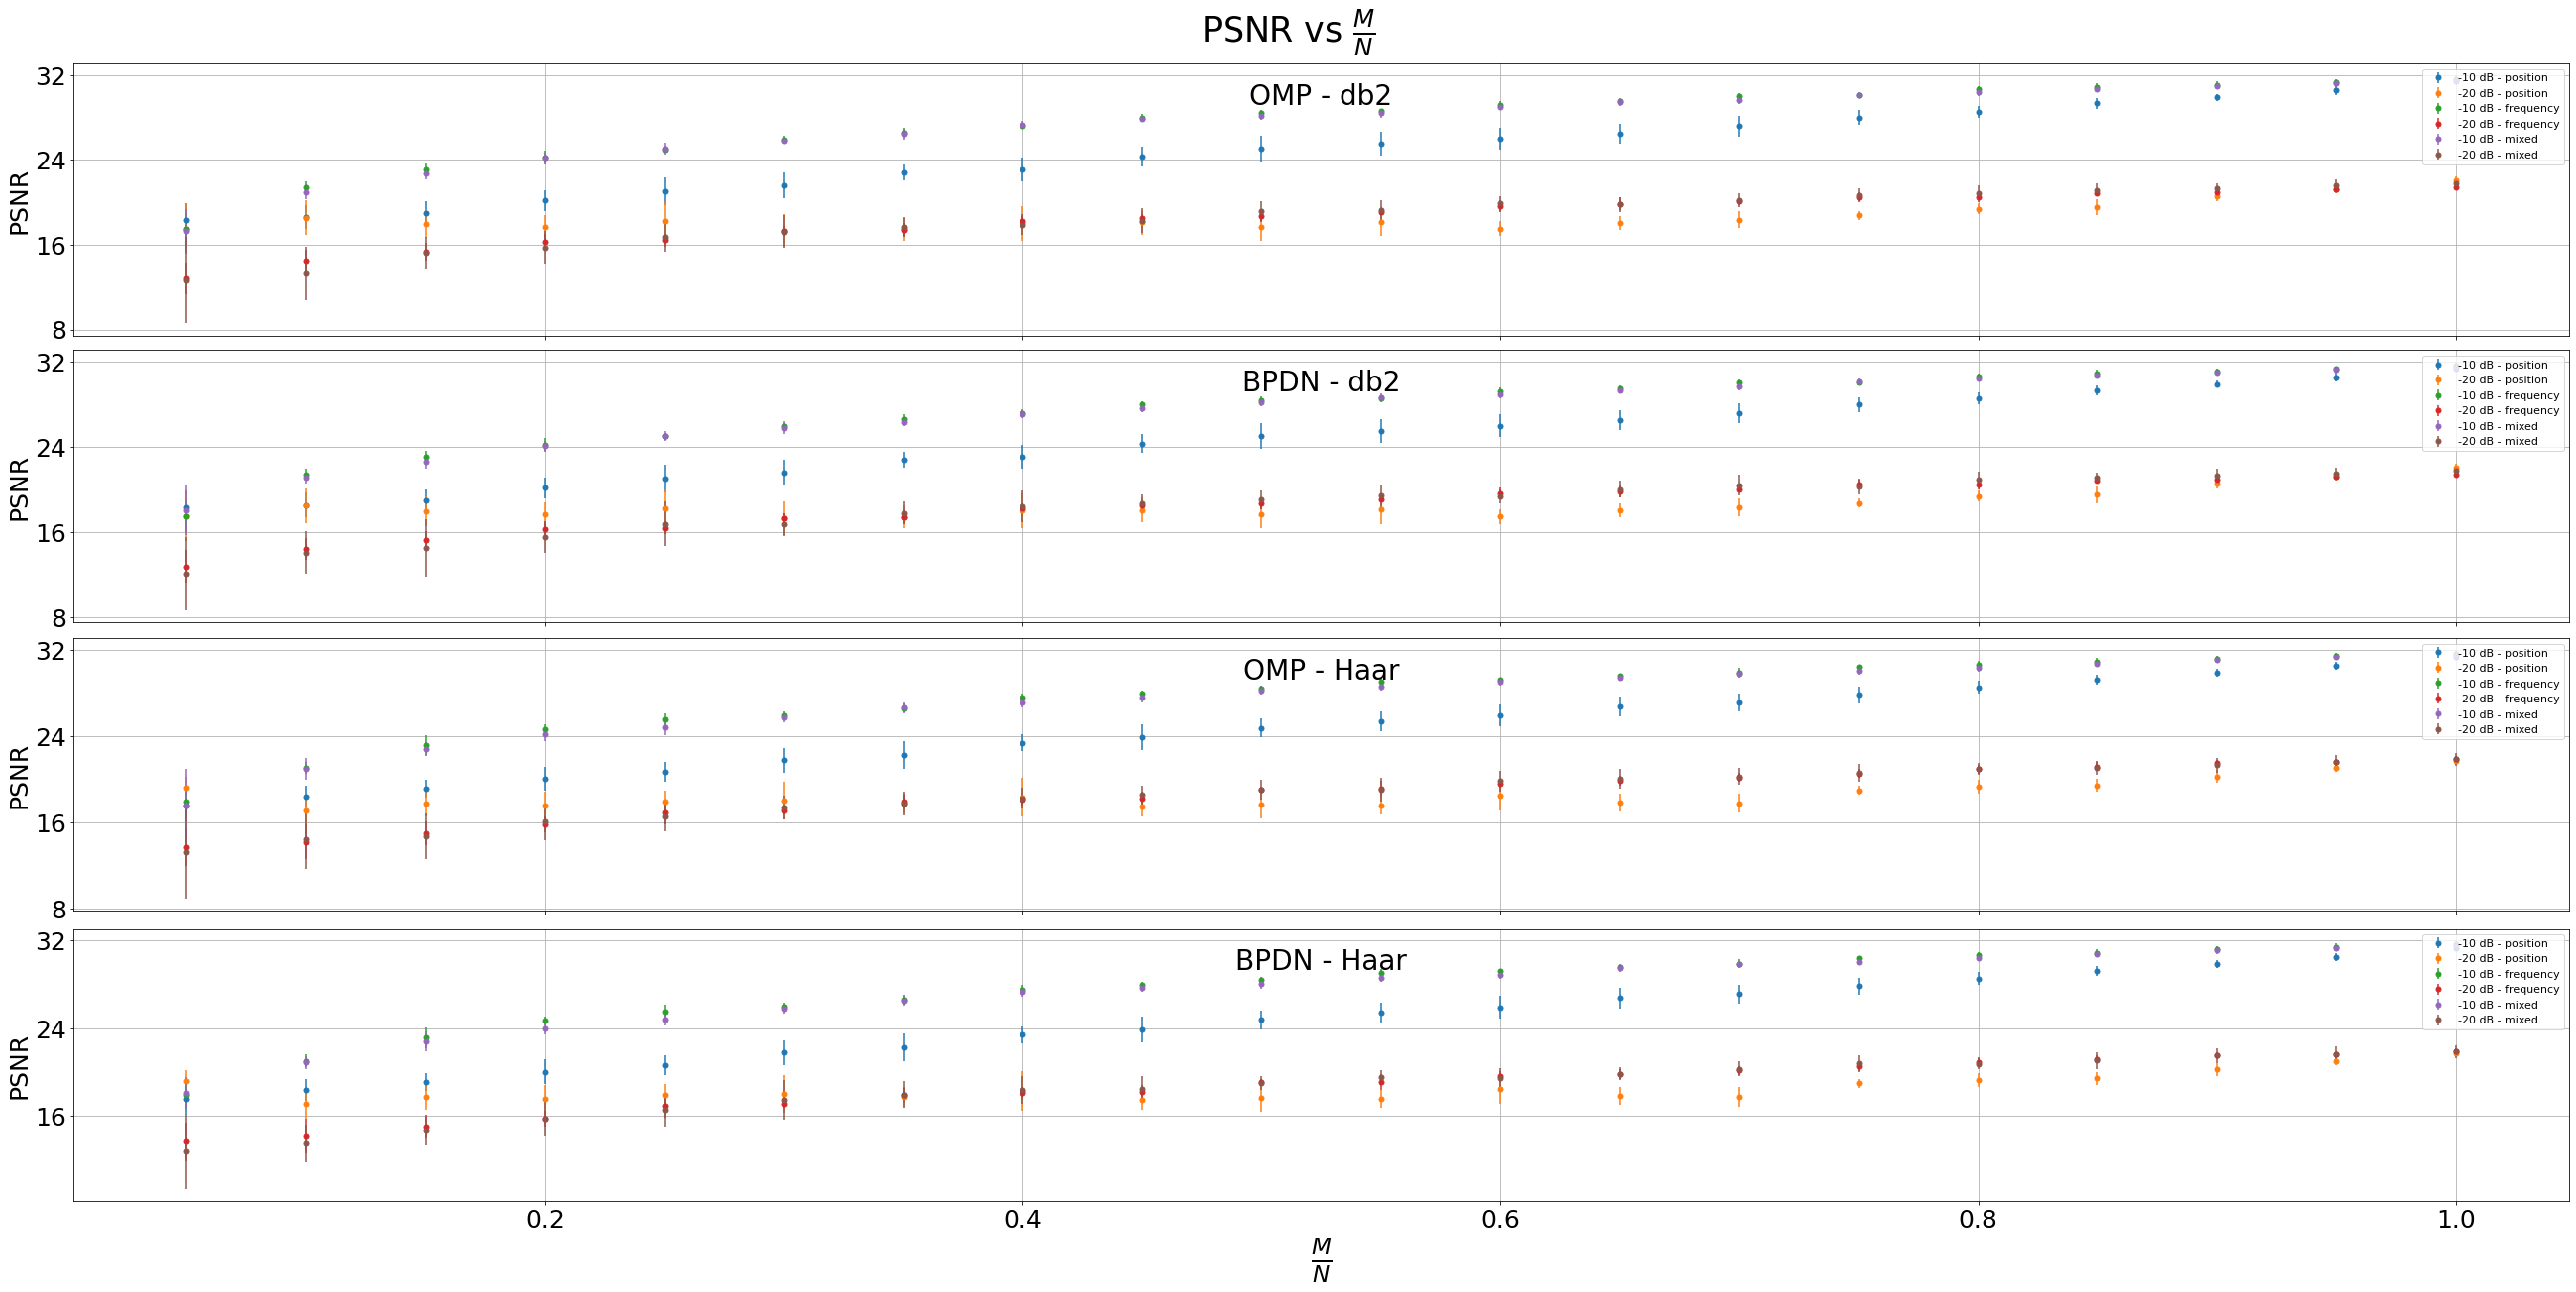

In [6]:
from matplotlib import ticker
M = 4
yticks = ticker.MaxNLocator(M)

dir_plots = '/home/jp/GBSAR/GBSAR_Imaging_Algorithms-master/Code-from-server/New-code/New-Plots-undersampling-both'
yd, yu = 5,95
xi,xf = 0.0,1.07
fontsize=25
markersize=10
loc = 'upper right'
fig, ax = plt.subplots(4,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus10dB,yerr=error_psnr_omp_db2_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus20dB,yerr=error_psnr_omp_db2_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.85,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)
ax[0].yaxis.set_major_locator(yticks)

#ax[0].set_ylim(yd,yu)
#ax[0].set_xlim(xi,xf)
ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus10dB,yerr=error_psnr_spgl1_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus20dB,yerr=error_psnr_spgl1_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus10dB,yerr=error_psnr_spgl1_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus20dB,yerr=error_psnr_spgl1_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus10dB,yerr=error_psnr_spgl1_db2_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus20dB,yerr=error_psnr_spgl1_db2_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.85,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
#ax[1].set_xlim(xi,xf)
ax[2].errorbar(percentage,psnr_omp_haar_pos_minus10dB,yerr=error_psnr_omp_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_pos_minus20dB,yerr=error_psnr_omp_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_freq_minus10dB,yerr=error_psnr_omp_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_freq_minus20dB,yerr=error_psnr_omp_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_mixed_minus10dB,yerr=error_psnr_omp_haar_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,psnr_omp_haar_mixed_minus20dB,yerr=error_psnr_omp_haar_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[2].xaxis.set_tick_params(labelsize=fontsize)
ax[2].yaxis.set_tick_params(labelsize=fontsize)
ax[2].set_ylabel('PSNR', fontsize=fontsize)
ax[2].grid()
ax[2].legend(fontsize=fontsize-14,loc=loc)
ax[2].text(.5,.85,'OMP - Haar',horizontalalignment='center',transform=ax[2].transAxes,fontsize=fontsize+3)
ax[2].yaxis.set_major_locator(yticks)

#ax[2].set_ylim(yd,yu)
#ax[2].set_xlim(xi,xf)

ax[3].errorbar(percentage,psnr_spgl1_haar_pos_minus10dB,yerr=error_psnr_spgl1_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_pos_minus20dB,yerr=error_psnr_spgl1_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_freq_minus10dB,yerr=error_psnr_spgl1_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_freq_minus20dB,yerr=error_psnr_spgl1_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_mixed_minus10dB,yerr=error_psnr_spgl1_haar_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,psnr_spgl1_haar_mixed_minus20dB,yerr=error_psnr_spgl1_haar_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)

ax[3].xaxis.set_tick_params(labelsize=fontsize)
ax[3].yaxis.set_tick_params(labelsize=fontsize)
ax[3].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+8)
ax[3].set_ylabel('PSNR', fontsize=fontsize)
ax[3].grid()
ax[3].legend(fontsize=fontsize-14,loc=loc)
ax[3].text(.5,.85,'BPDN - Haar',horizontalalignment='center',transform=ax[3].transAxes,fontsize=fontsize+3)
ax[3].yaxis.set_major_locator(yticks)

#ax[3].set_ylim(yd,yu)
#ax[3].set_xlim(xi,xf)
fig.suptitle(r'PSNR vs $\frac{M}{N}$',fontsize=fontsize+10)
plt.savefig('%s/psnr-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')
plt.savefig('%s/psnr-vs-data-fraction-different-snr.png' % dir_plots,bbox_inches='tight')

NameError: name 'color' is not defined

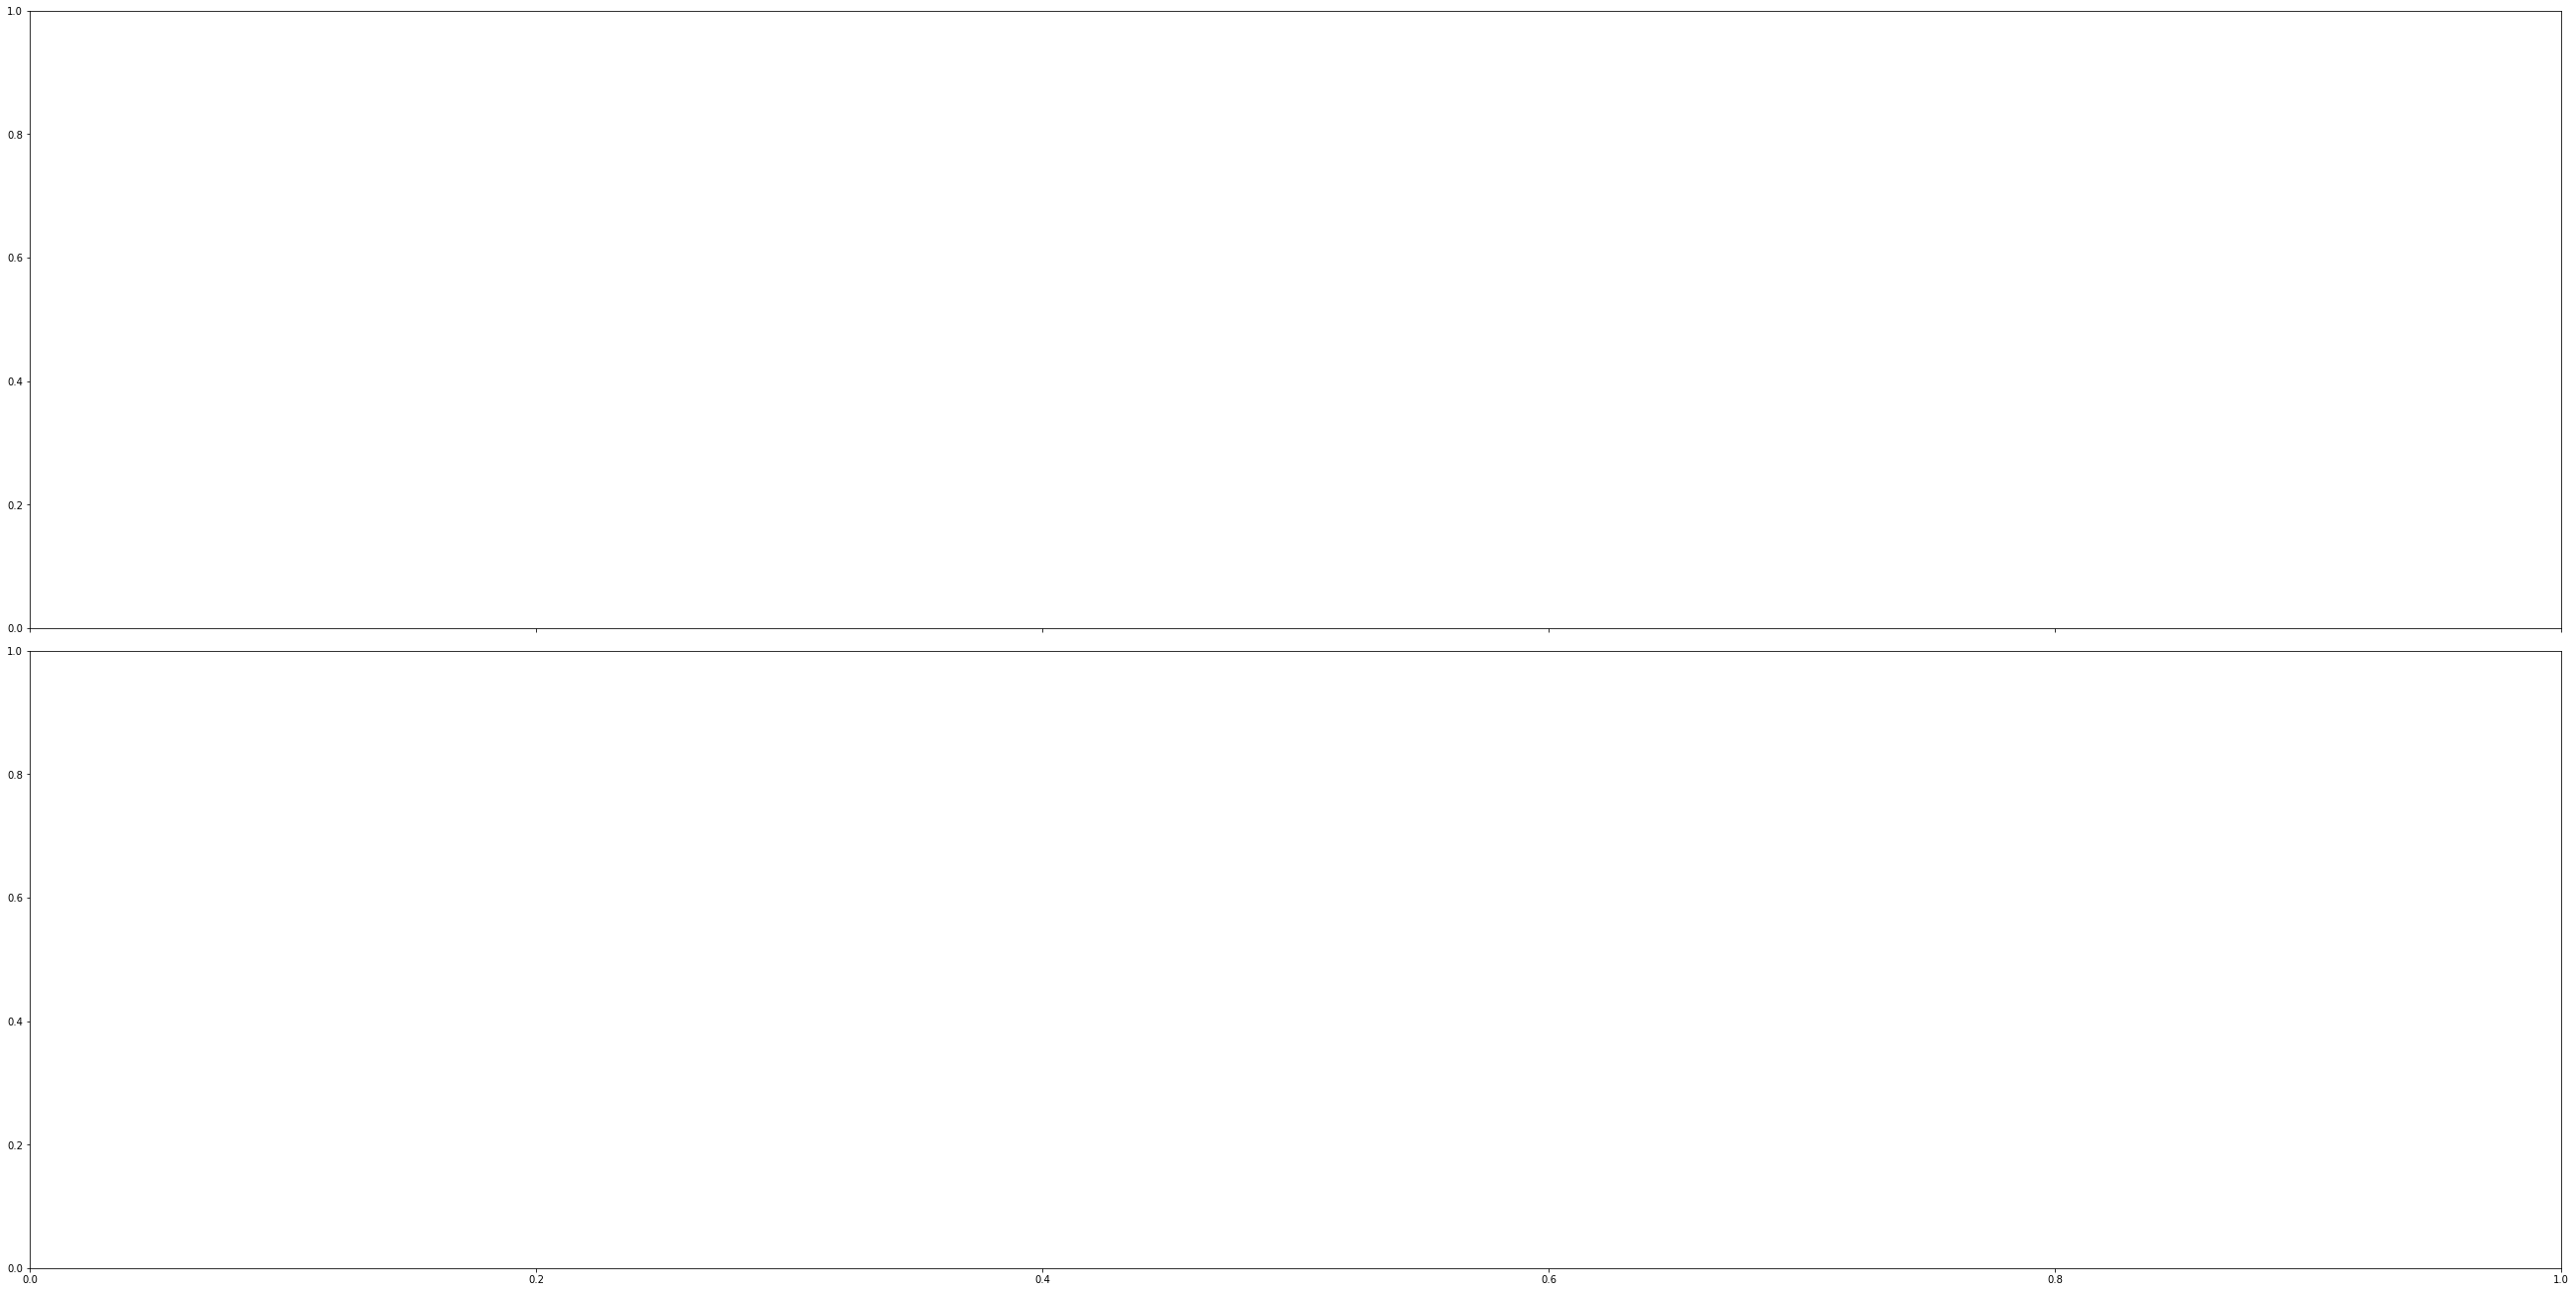

In [7]:
from matplotlib import ticker
import matplotlib.ticker as plticker
M = 14
#xticks = ticker.MaxNLocator(M)
yticks = ticker.MaxNLocator(10)
loc = plticker.MultipleLocator(base=0.05)
colors = ['black','blue','orange','purple','pink','yellow','red','grey']
dir_plots = '/home/jp/GBSAR/GBSAR_Imaging_Algorithms-master/Code-from-server/New-code/New-Plots-undersampling-both'
yd, yu = 5,95
xi,xf = 0.0,1.07
fontsize=34
markersize=14
leg_loc = 'upper right'
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus30dB,yerr=error_psnr_omp_db2_pos_minus30dB,label='-30 dB - position',fmt='.',markersize=markersize,color=color[0])
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize,color=color[1])
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize,color=color[2])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus30dB,yerr=error_psnr_omp_db2_freq_minus30dB,label='-30 dB - frequency',fmt='.',markersize=markersize,color=color[3])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize,color=color[4])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize,color=color[5])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus30dB,yerr=error_psnr_omp_db2_mixed_minus30dB,label='-30 dB - mixed',fmt='.',markersize=markersize,color=color[6])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus10dB,yerr=error_psnr_omp_db2_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus20dB,yerr=error_psnr_omp_db2_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_pos_0dB,yerr=error_psnr_omp_db2_pos_0dB,label='0 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus40dB,yerr=error_psnr_omp_db2_pos_plus40dB,label='40 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_0dB,yerr=error_psnr_omp_db2_freq_0dB,label='0 dB - freq',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus40dB,yerr=error_psnr_omp_db2_freq_plus40dB,label='40 dB - freq',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_mixed_0dB,yerr=error_psnr_omp_db2_mixed_0dB,label='0 dB - mixed',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus40dB,yerr=error_psnr_omp_db2_mixed_plus40dB,label='40 dB - mixed',fmt='.',markersize=markersize)

ax[0].xaxis.set_major_locator(xticks)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
#ax[0].legend(fontsize=fontsize-10,loc=leg_loc)
#ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.3),fontsize=fontsize-5)
ax[0].text(.55,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus10dB,yerr=error_psnr_spgl1_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus20dB,yerr=error_psnr_spgl1_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus10dB,yerr=error_psnr_spgl1_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus20dB,yerr=error_psnr_spgl1_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus10dB,yerr=error_psnr_spgl1_db2_mixed_minus10dB,label='-10 dB - mixed',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus20dB,yerr=error_psnr_spgl1_db2_mixed_minus20dB,label='-20 dB - mixed',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_pos_0dB,yerr=error_psnr_spgl1_db2_pos_0dB,label='0 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus40dB,yerr=error_psnr_spgl1_db2_pos_plus40dB,label='40 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_0dB,yerr=error_psnr_spgl1_db2_freq_0dB,label='0 dB - freq',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus40dB,yerr=error_psnr_spgl1_db2_freq_plus40dB,label='40 dB - freq',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_0dB,yerr=error_psnr_spgl1_db2_mixed_0dB,label='0 dB - mixed',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus40dB,yerr=error_psnr_spgl1_db2_mixed_plus40dB,label='40 dB - mixed',fmt='.',markersize=markersize)

ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].xaxis.set_major_locator(xticks)
ax[1].grid()
ax[1].legend(fontsize=fontsize-10,bbox_to_anchor=(1, 0.8))#,loc=leg_loc)
ax[1].text(.55,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
ax[1].xaxis.set_major_locator(xticks)
#ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
plt.suptitle('PSNR - db2',horizontalalignment='center',fontsize=fontsize+12)
#fig.legend(bbox_to_anchor=(1, 0.8),fontsize=fontsize)
#fig.tight_layout()
#fig.subplots_adjust(right=0.93)

In [94]:
#np.isclose(psnr_omp_db2_pos_plus40dB,psnr_spgl1_db2_pos_plus40dB)
print(np.isclose(rmse_omp_module_db2_pos_plus30dB,rmse_spgl1_module_db2_pos_plus30dB))
print(np.isclose(rmse_omp_phase_db2_pos_plus30dB,rmse_spgl1_phase_db2_pos_plus30dB))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


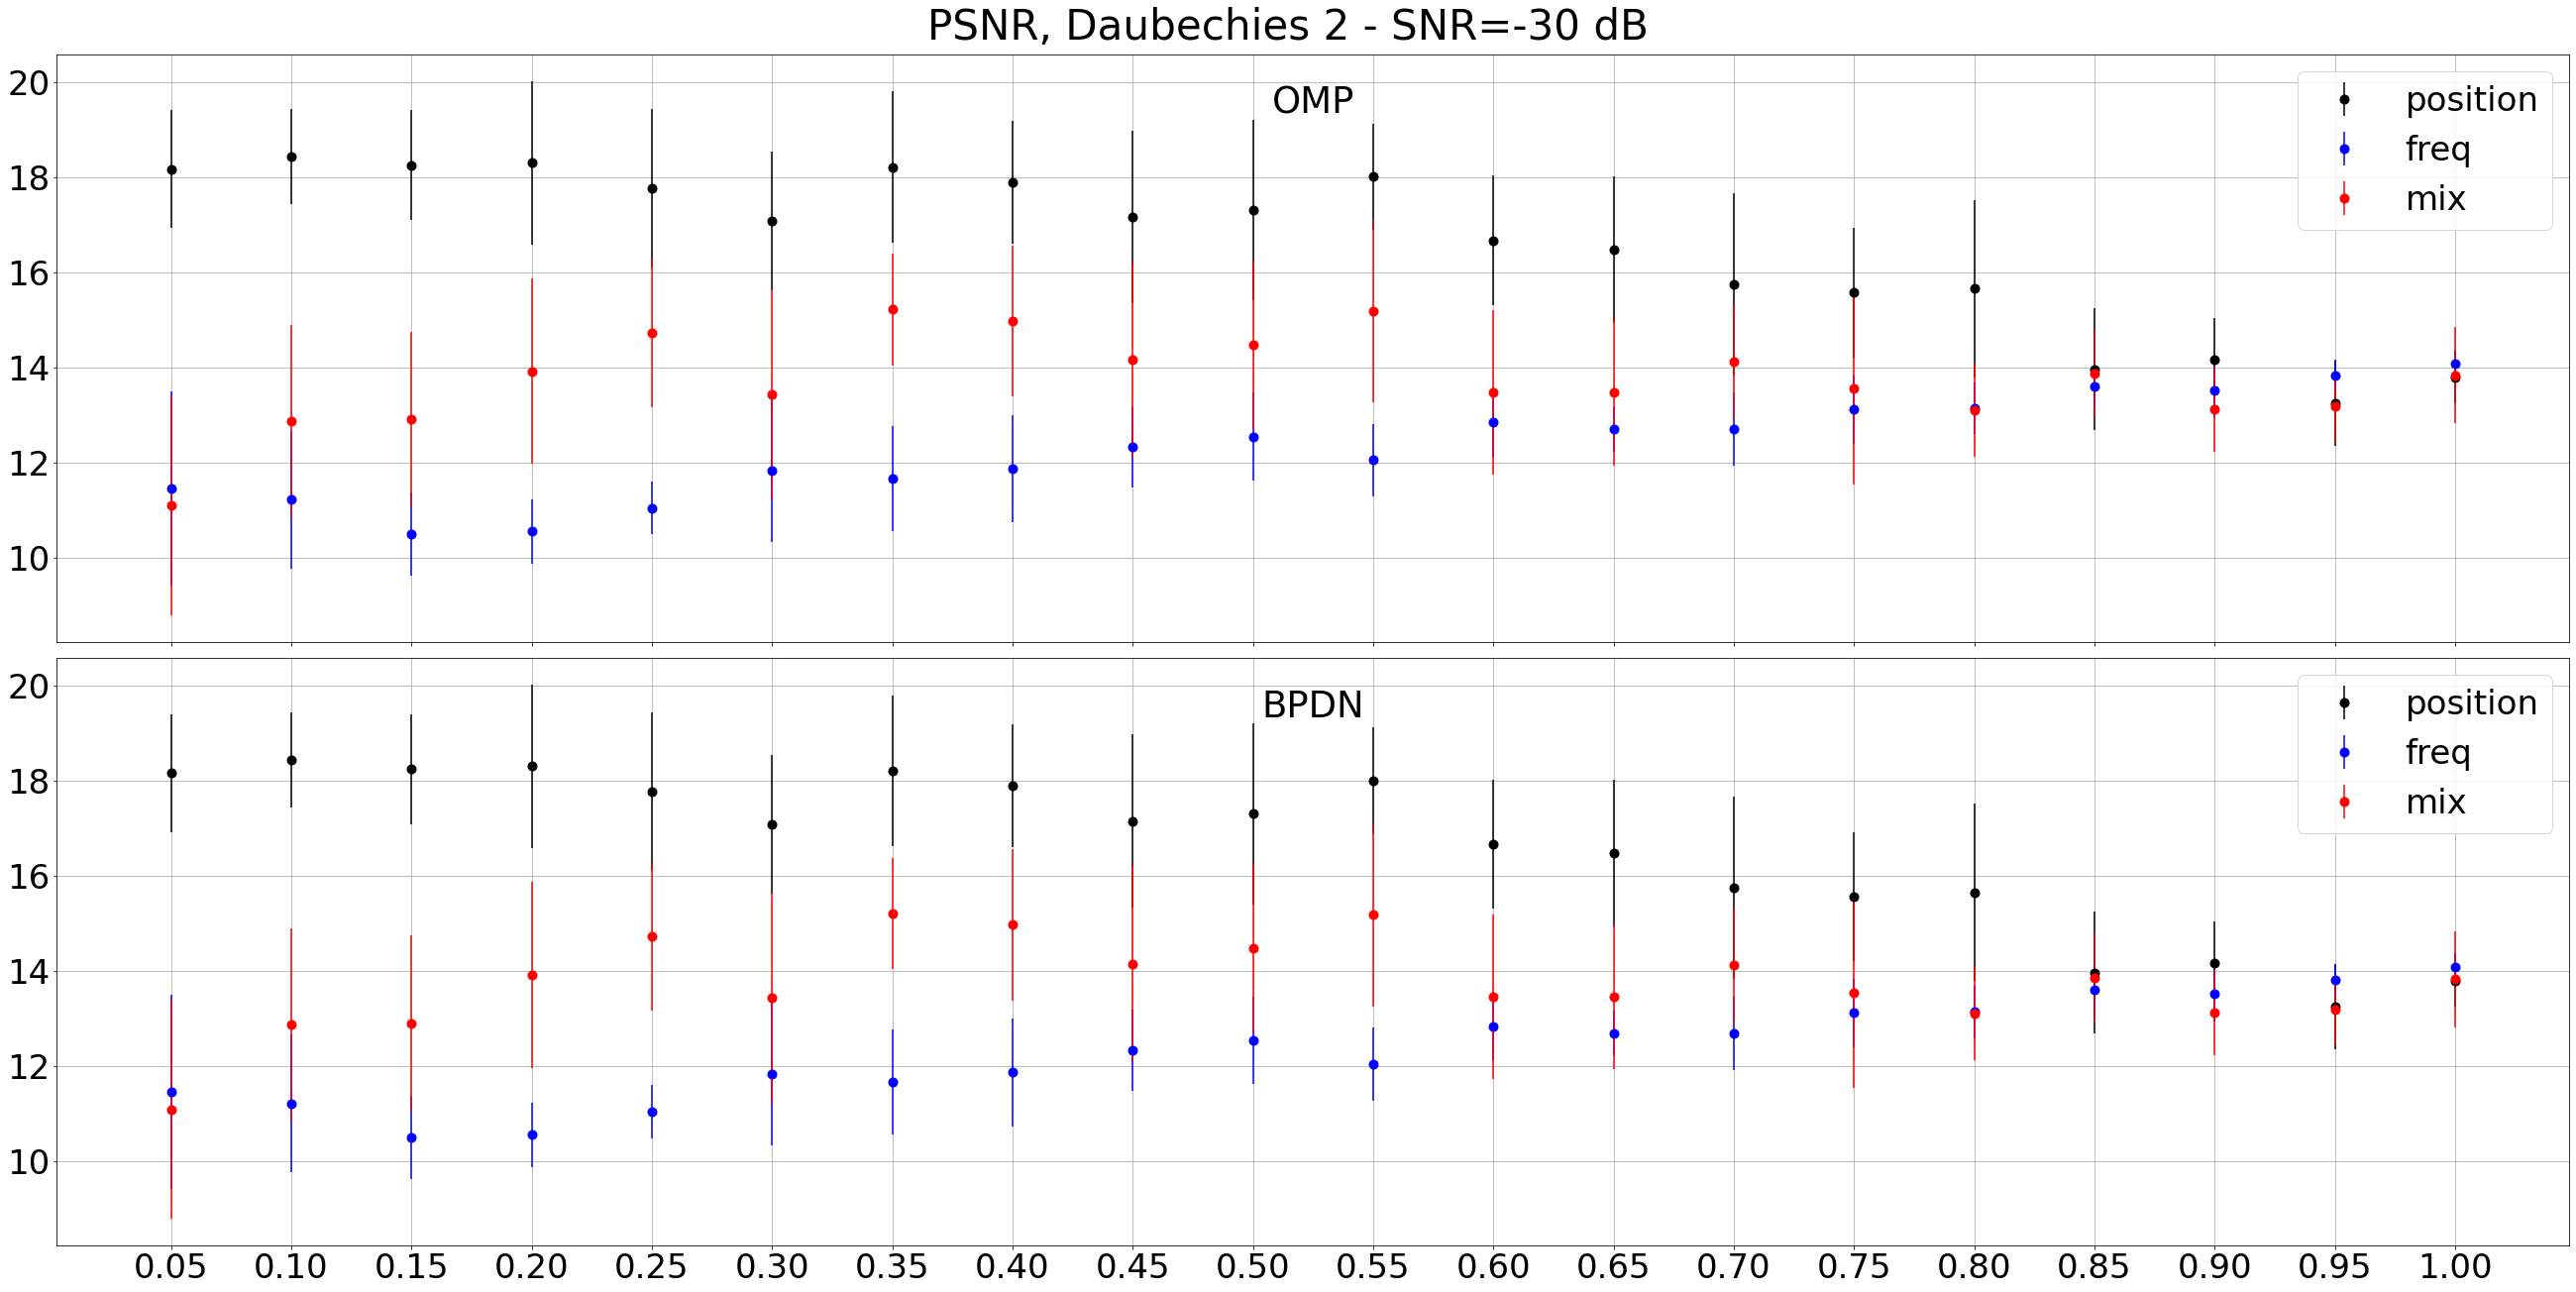

In [22]:
colors = ['black','blue','red']
yticks = ticker.MaxNLocator(10)
loc = plticker.MultipleLocator(base=0.05)
fontsize=34
markersize=18
leg_loc = 'upper right'
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus30dB,yerr=error_psnr_omp_db2_pos_minus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus30dB,yerr=error_psnr_omp_db2_freq_minus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus30dB,yerr=error_psnr_omp_db2_mixed_minus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus30dB,yerr=error_psnr_spgl1_db2_pos_minus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus30dB,yerr=error_psnr_spgl1_db2_freq_minus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus30dB,yerr=error_psnr_spgl1_db2_mixed_minus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=-30 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=-30dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=-30dB.pdf',bbox_inches='tight')

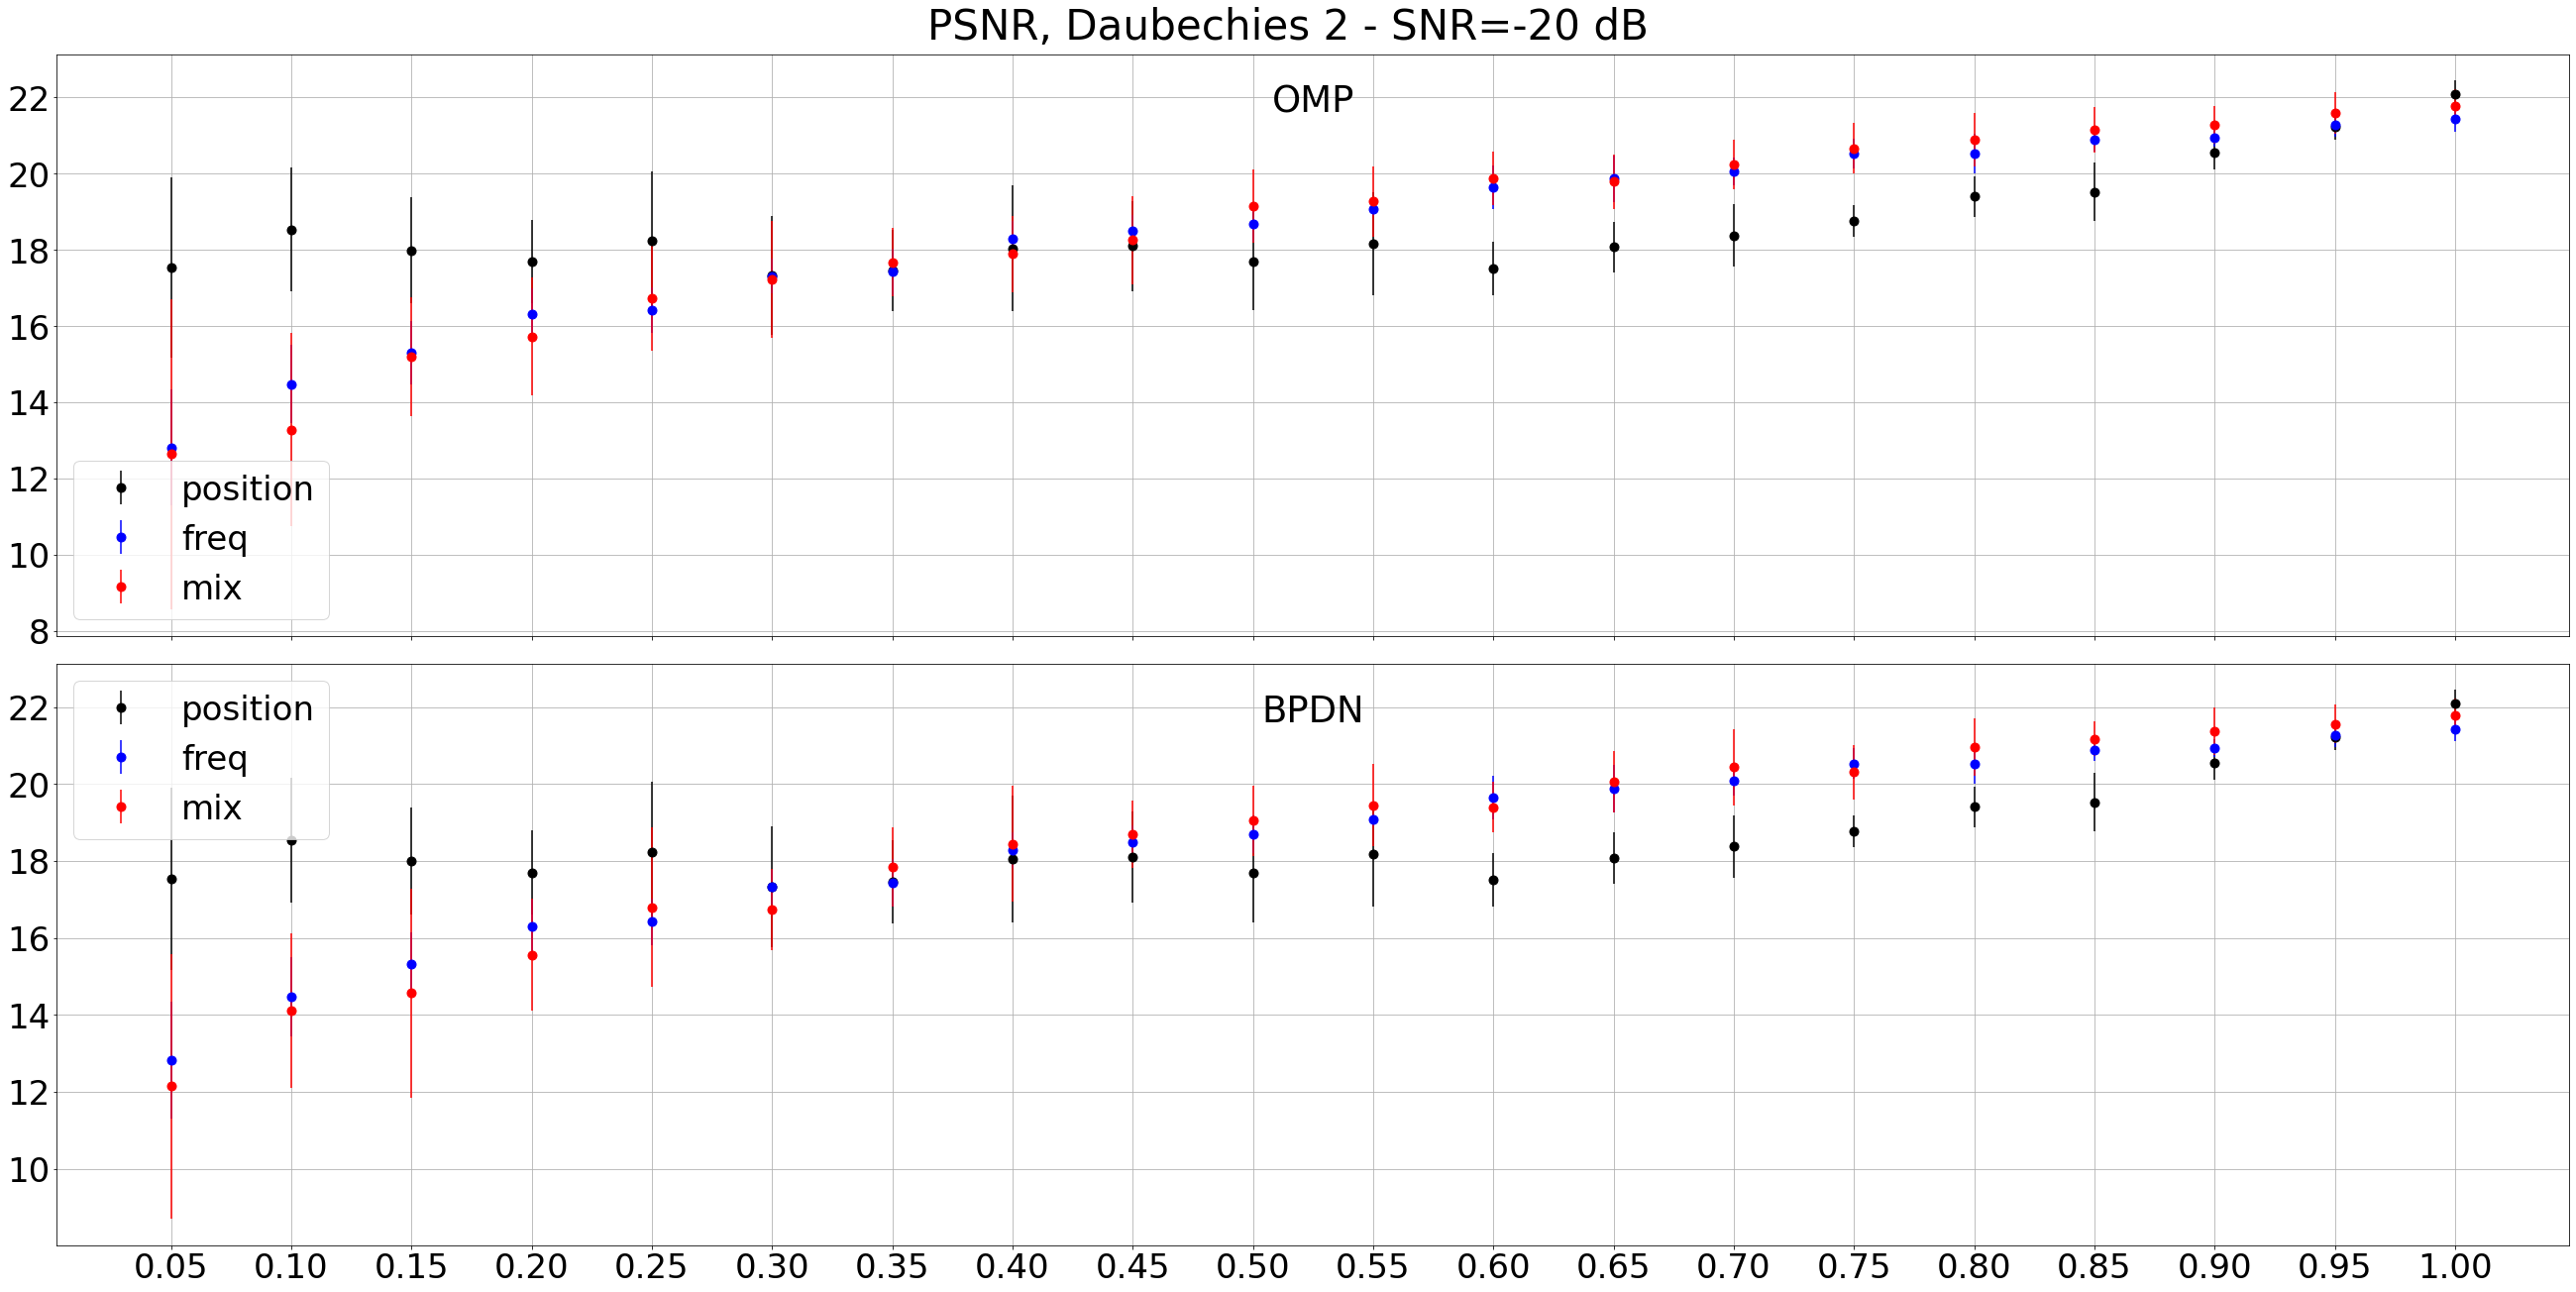

In [24]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus20dB,yerr=error_psnr_omp_db2_mixed_minus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus20dB,yerr=error_psnr_spgl1_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus20dB,yerr=error_psnr_spgl1_db2_freq_minus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus20dB,yerr=error_psnr_spgl1_db2_mixed_minus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=-20 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=-20dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=-20dB.pdf',bbox_inches='tight')


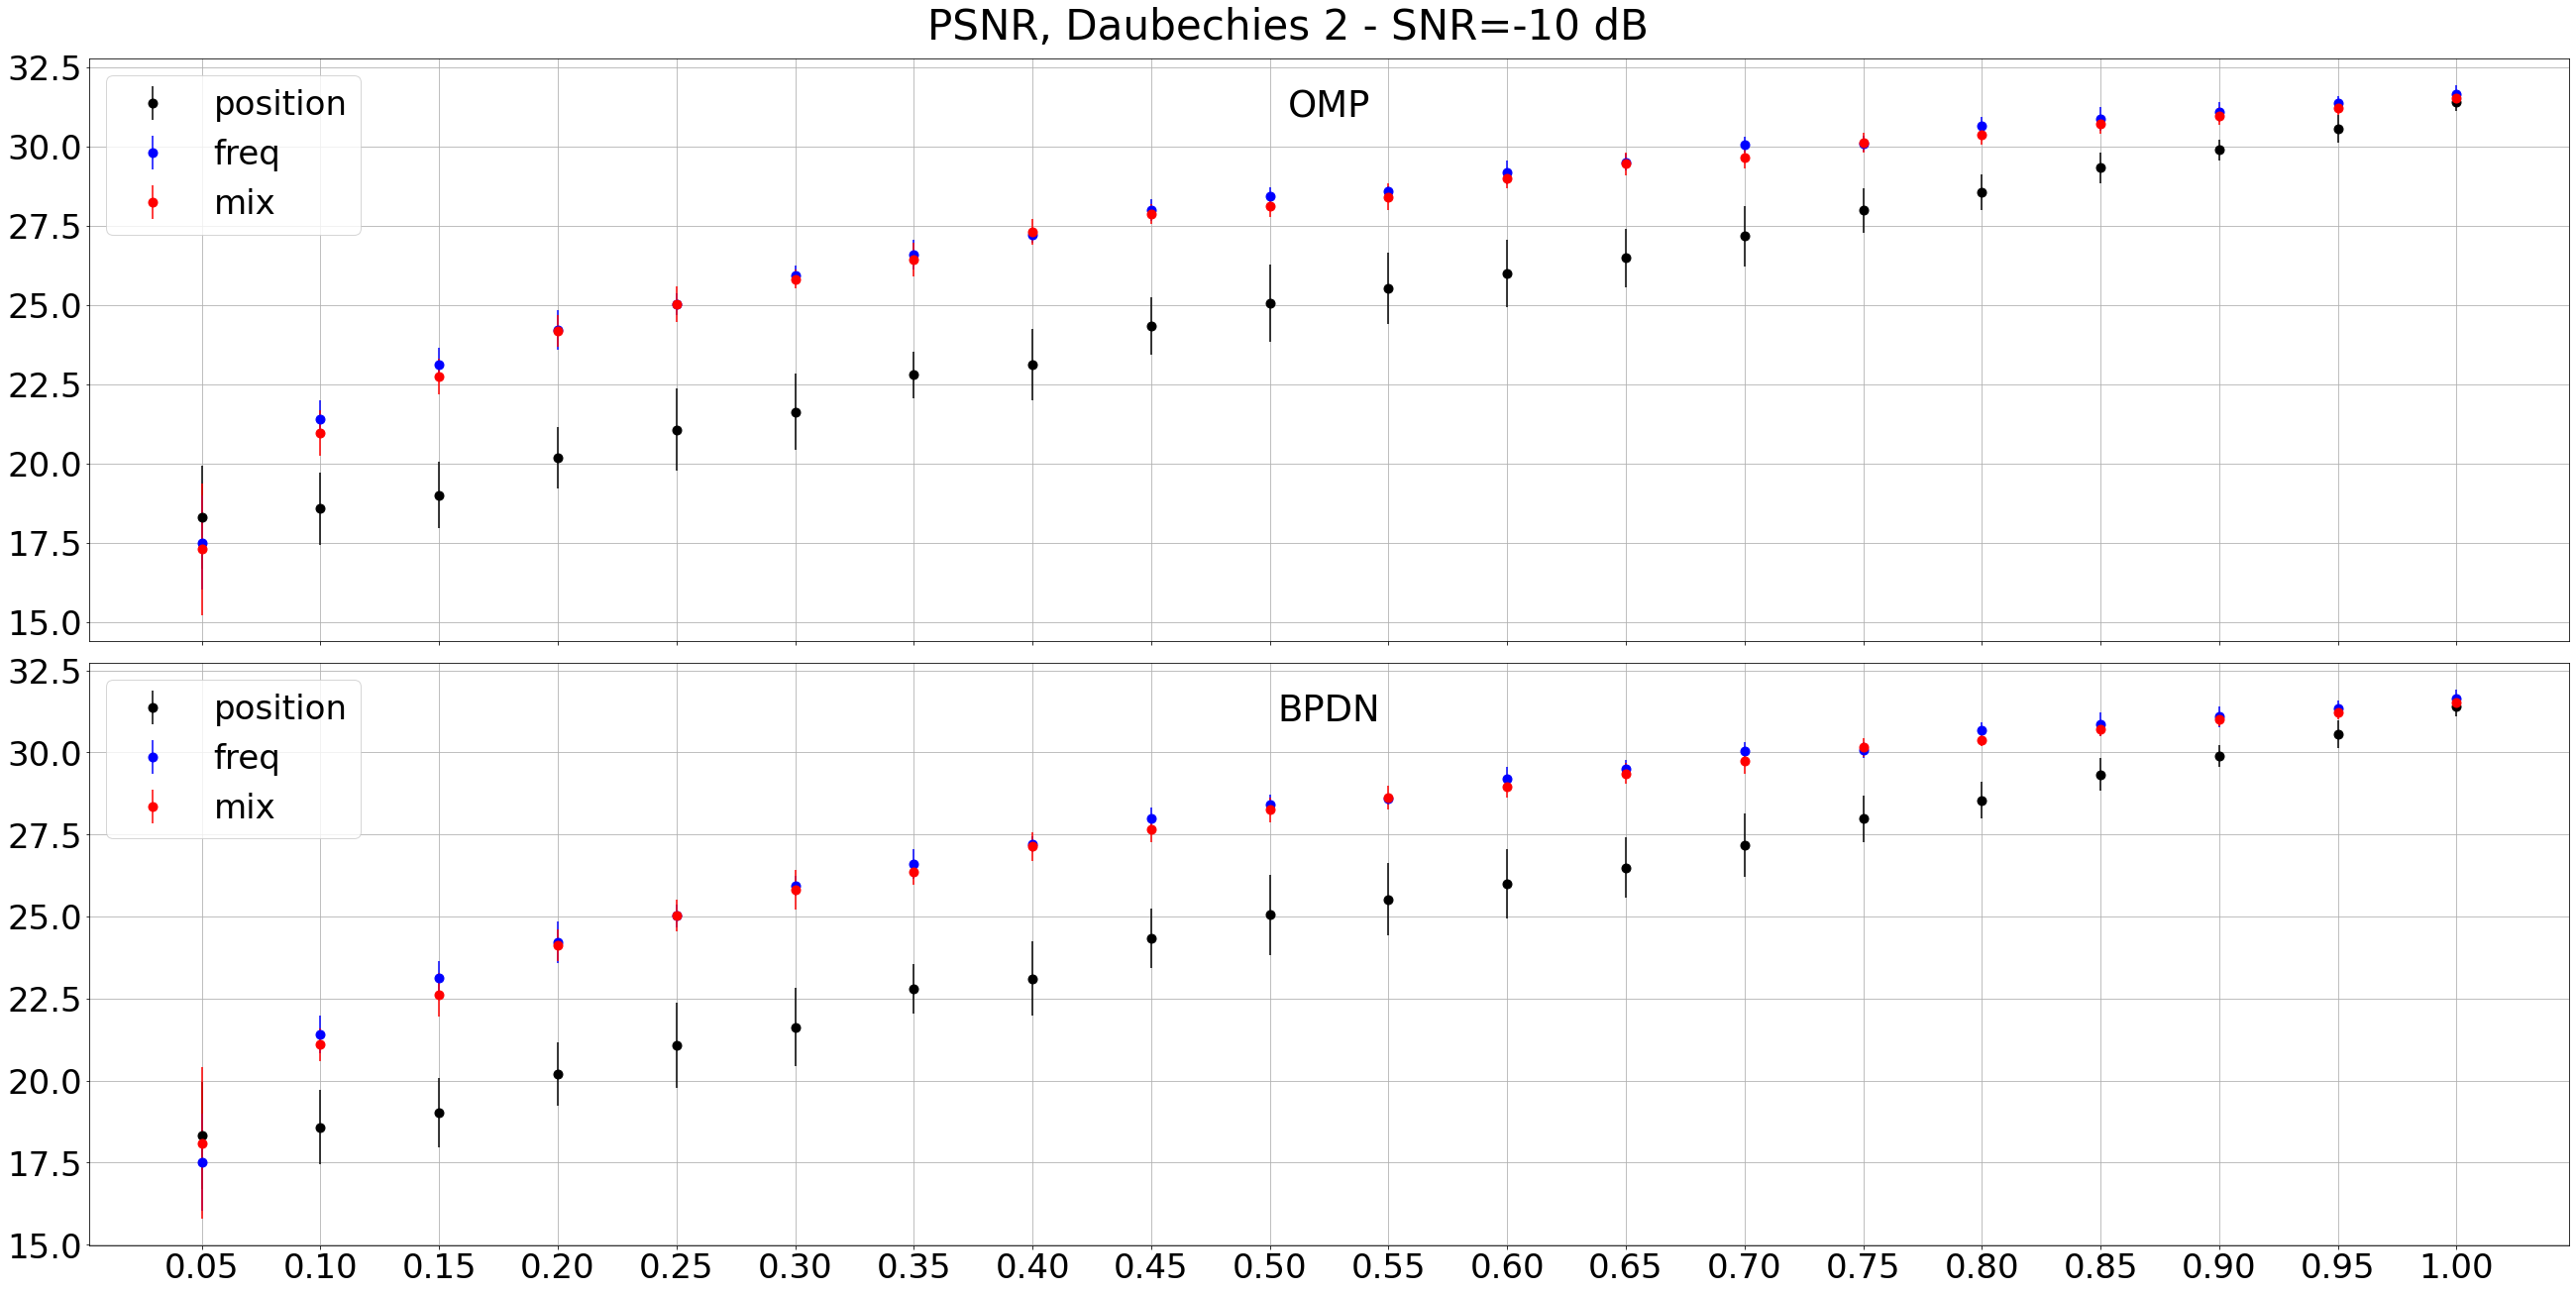

In [25]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_minus10dB,yerr=error_psnr_omp_db2_mixed_minus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus10dB,yerr=error_psnr_spgl1_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus10dB,yerr=error_psnr_spgl1_db2_freq_minus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_minus10dB,yerr=error_psnr_spgl1_db2_mixed_minus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=-10 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=-10dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=-10dB.pdf',bbox_inches='tight')


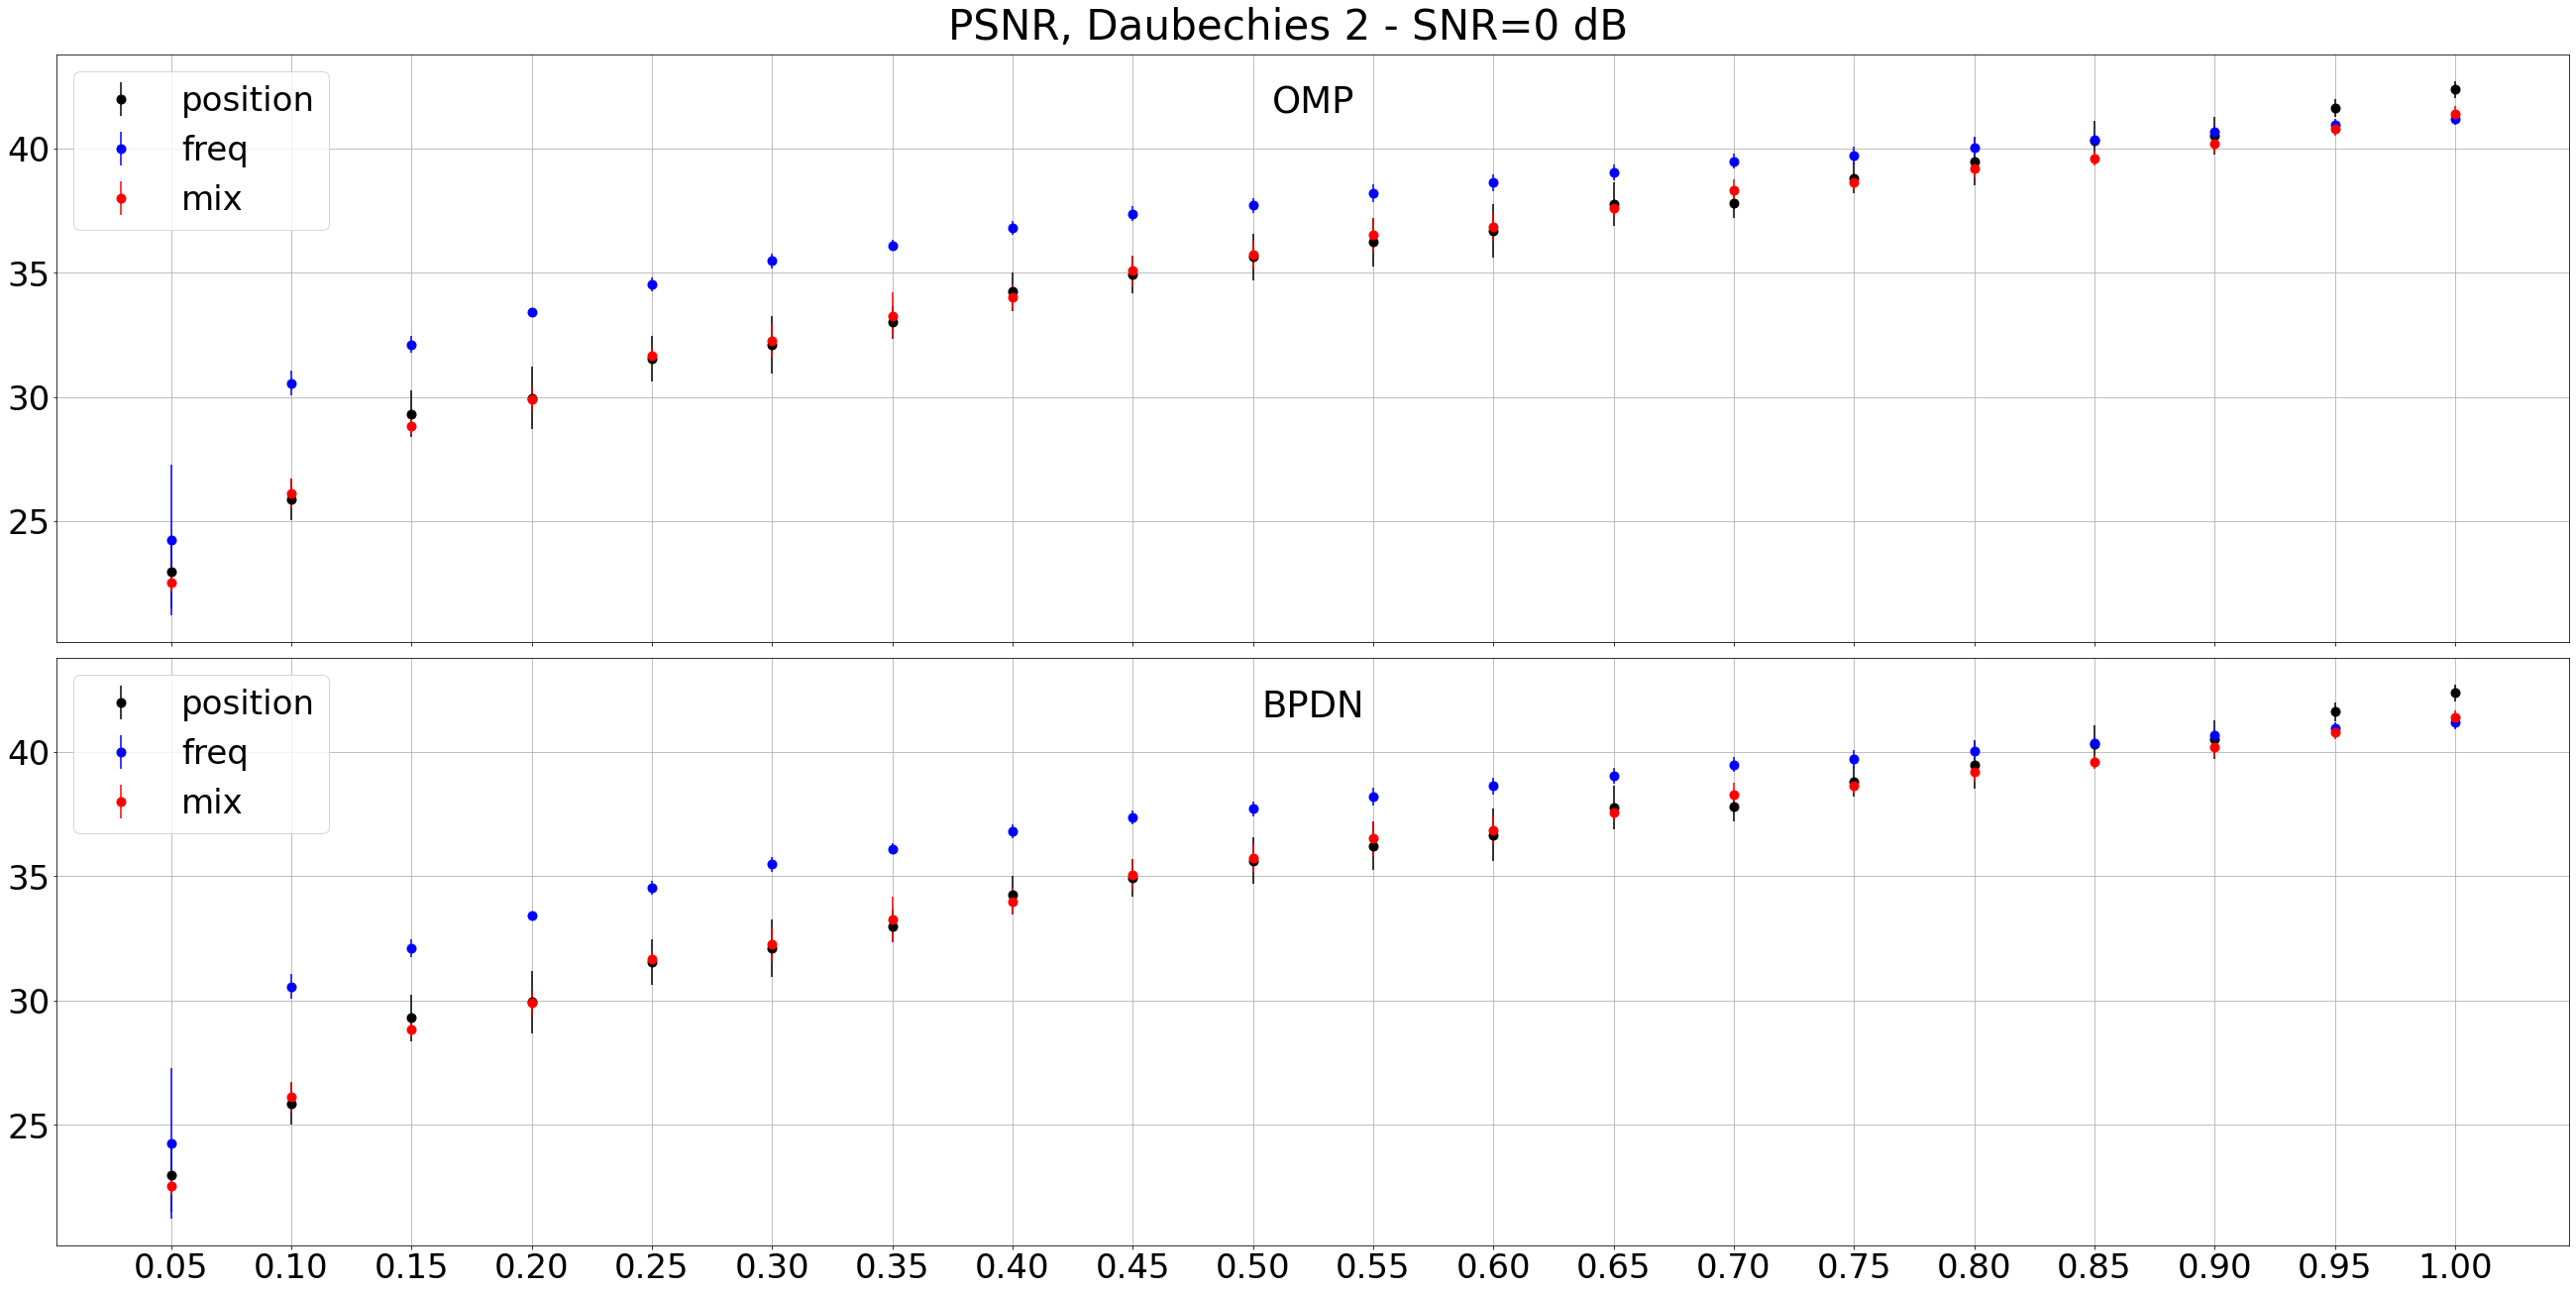

In [26]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_0dB,yerr=error_psnr_omp_db2_pos_0dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_0dB,yerr=error_psnr_omp_db2_freq_0dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_0dB,yerr=error_psnr_omp_db2_mixed_0dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_0dB,yerr=error_psnr_spgl1_db2_pos_0dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_0dB,yerr=error_psnr_spgl1_db2_freq_0dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_0dB,yerr=error_psnr_spgl1_db2_mixed_0dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=0 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=0dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=0dB.pdf',bbox_inches='tight')


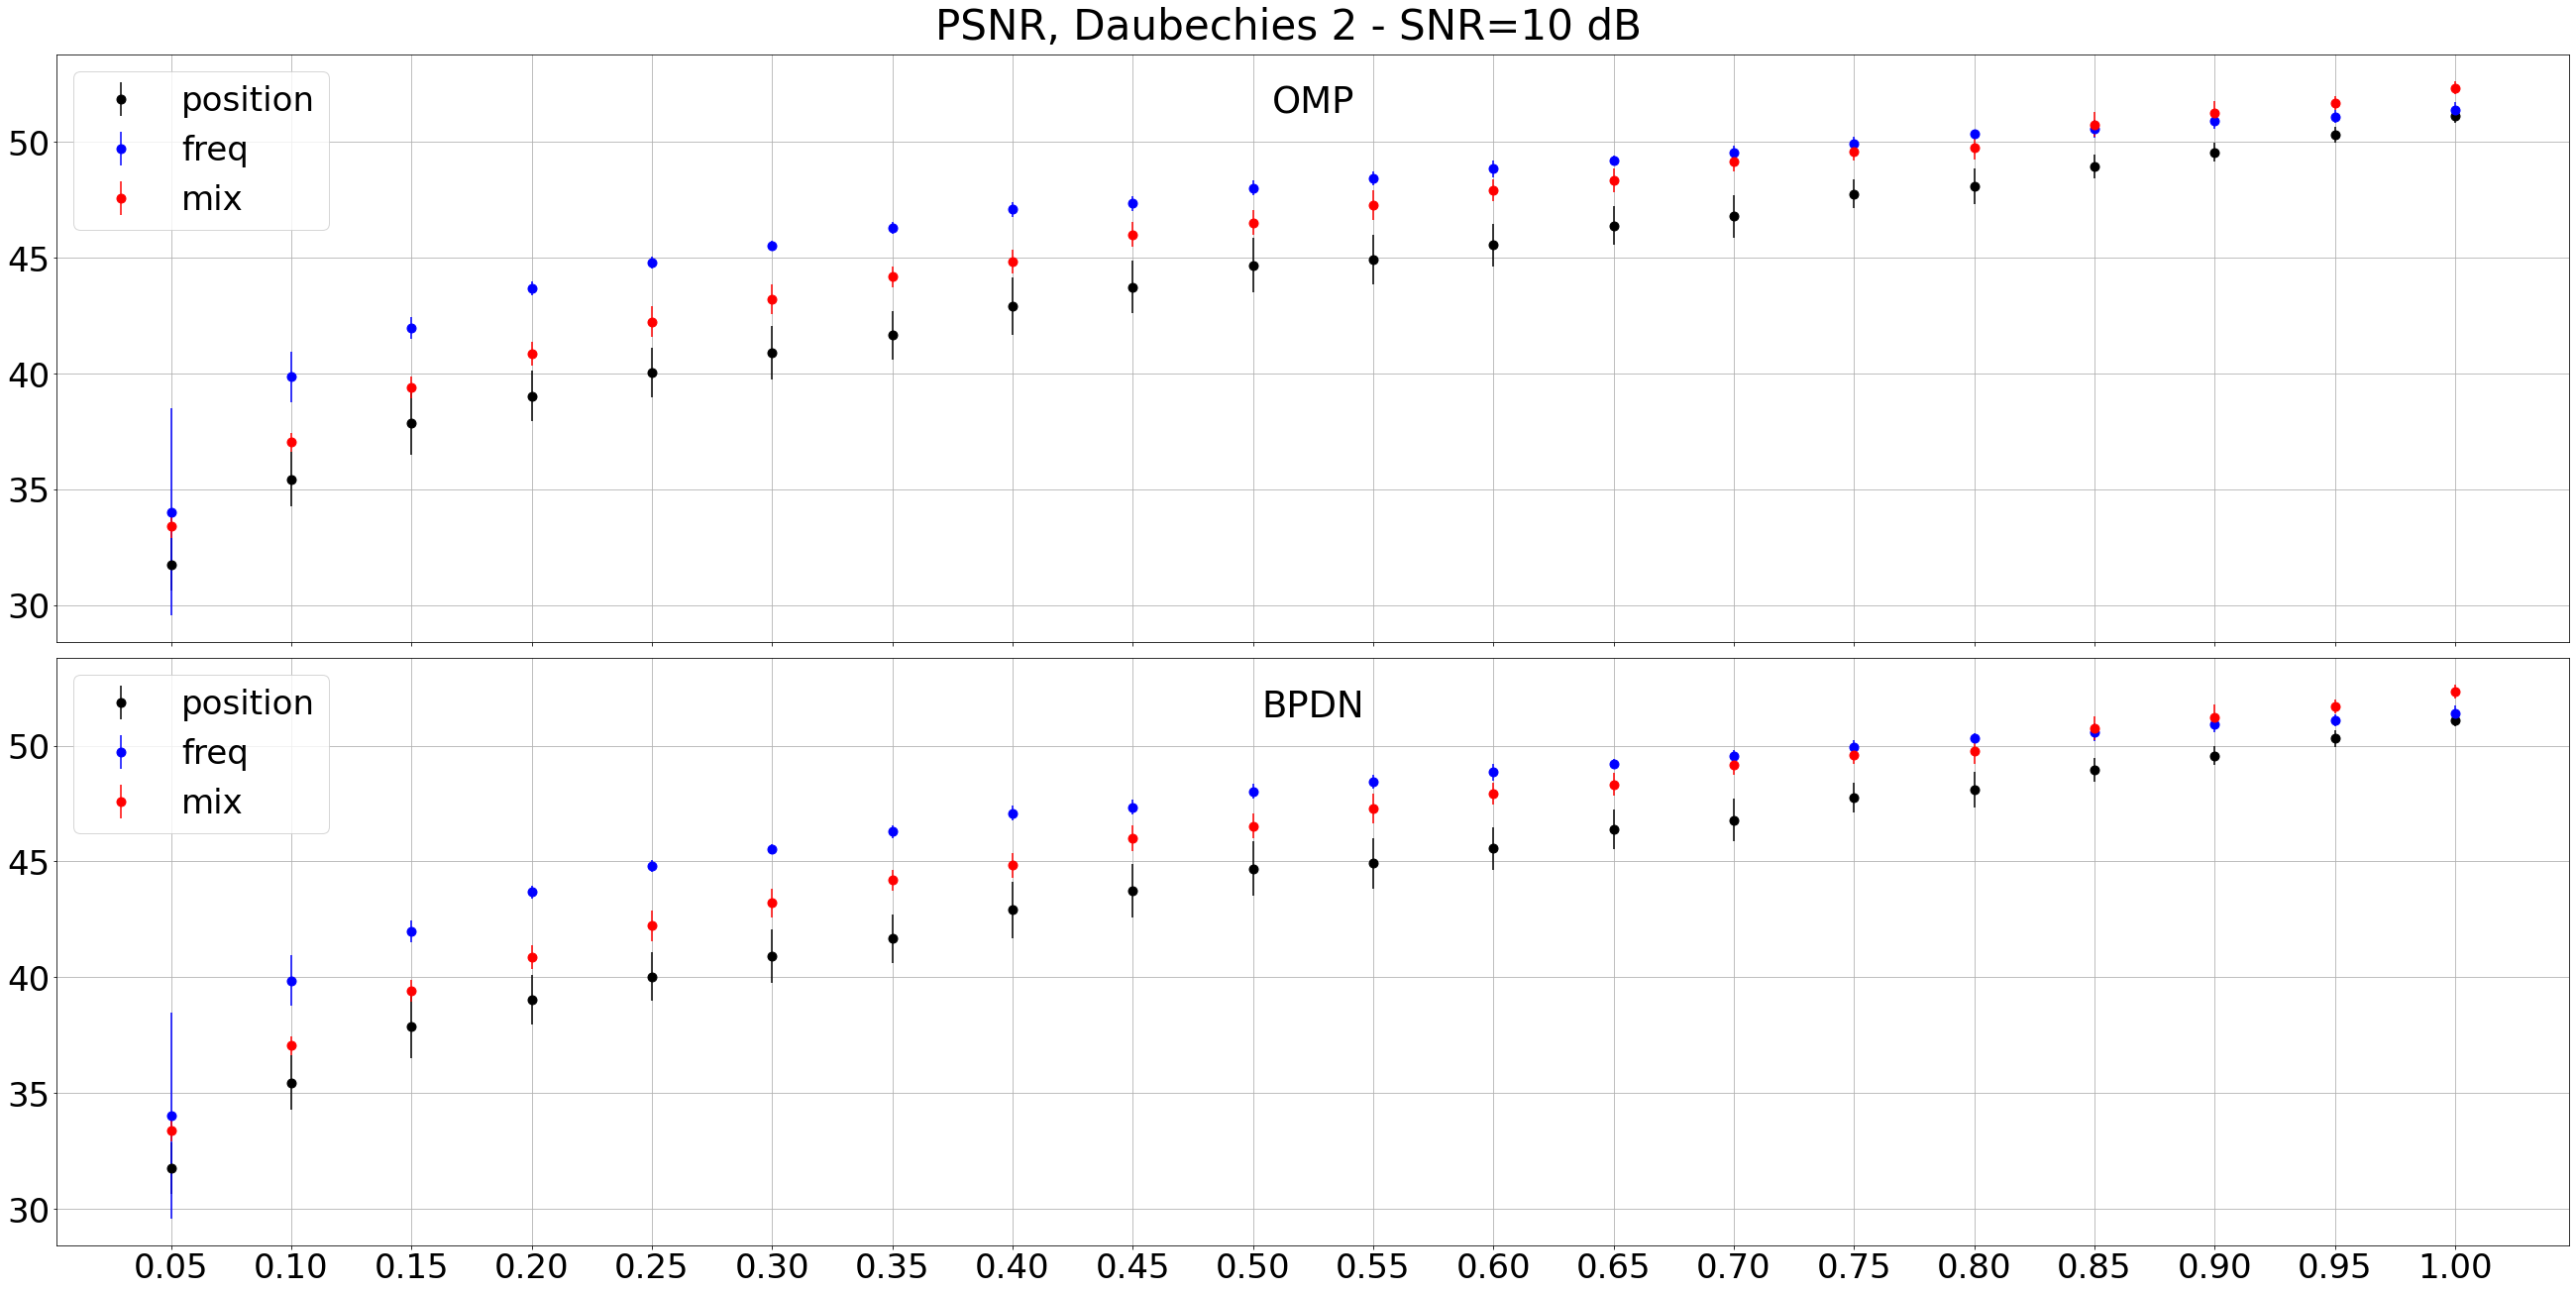

In [27]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus10dB,yerr=error_psnr_omp_db2_pos_plus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus10dB,yerr=error_psnr_omp_db2_freq_plus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus10dB,yerr=error_psnr_omp_db2_mixed_plus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus10dB,yerr=error_psnr_spgl1_db2_pos_plus10dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus10dB,yerr=error_psnr_spgl1_db2_freq_plus10dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus10dB,yerr=error_psnr_spgl1_db2_mixed_plus10dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=10 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=10dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=10dB.pdf',bbox_inches='tight')


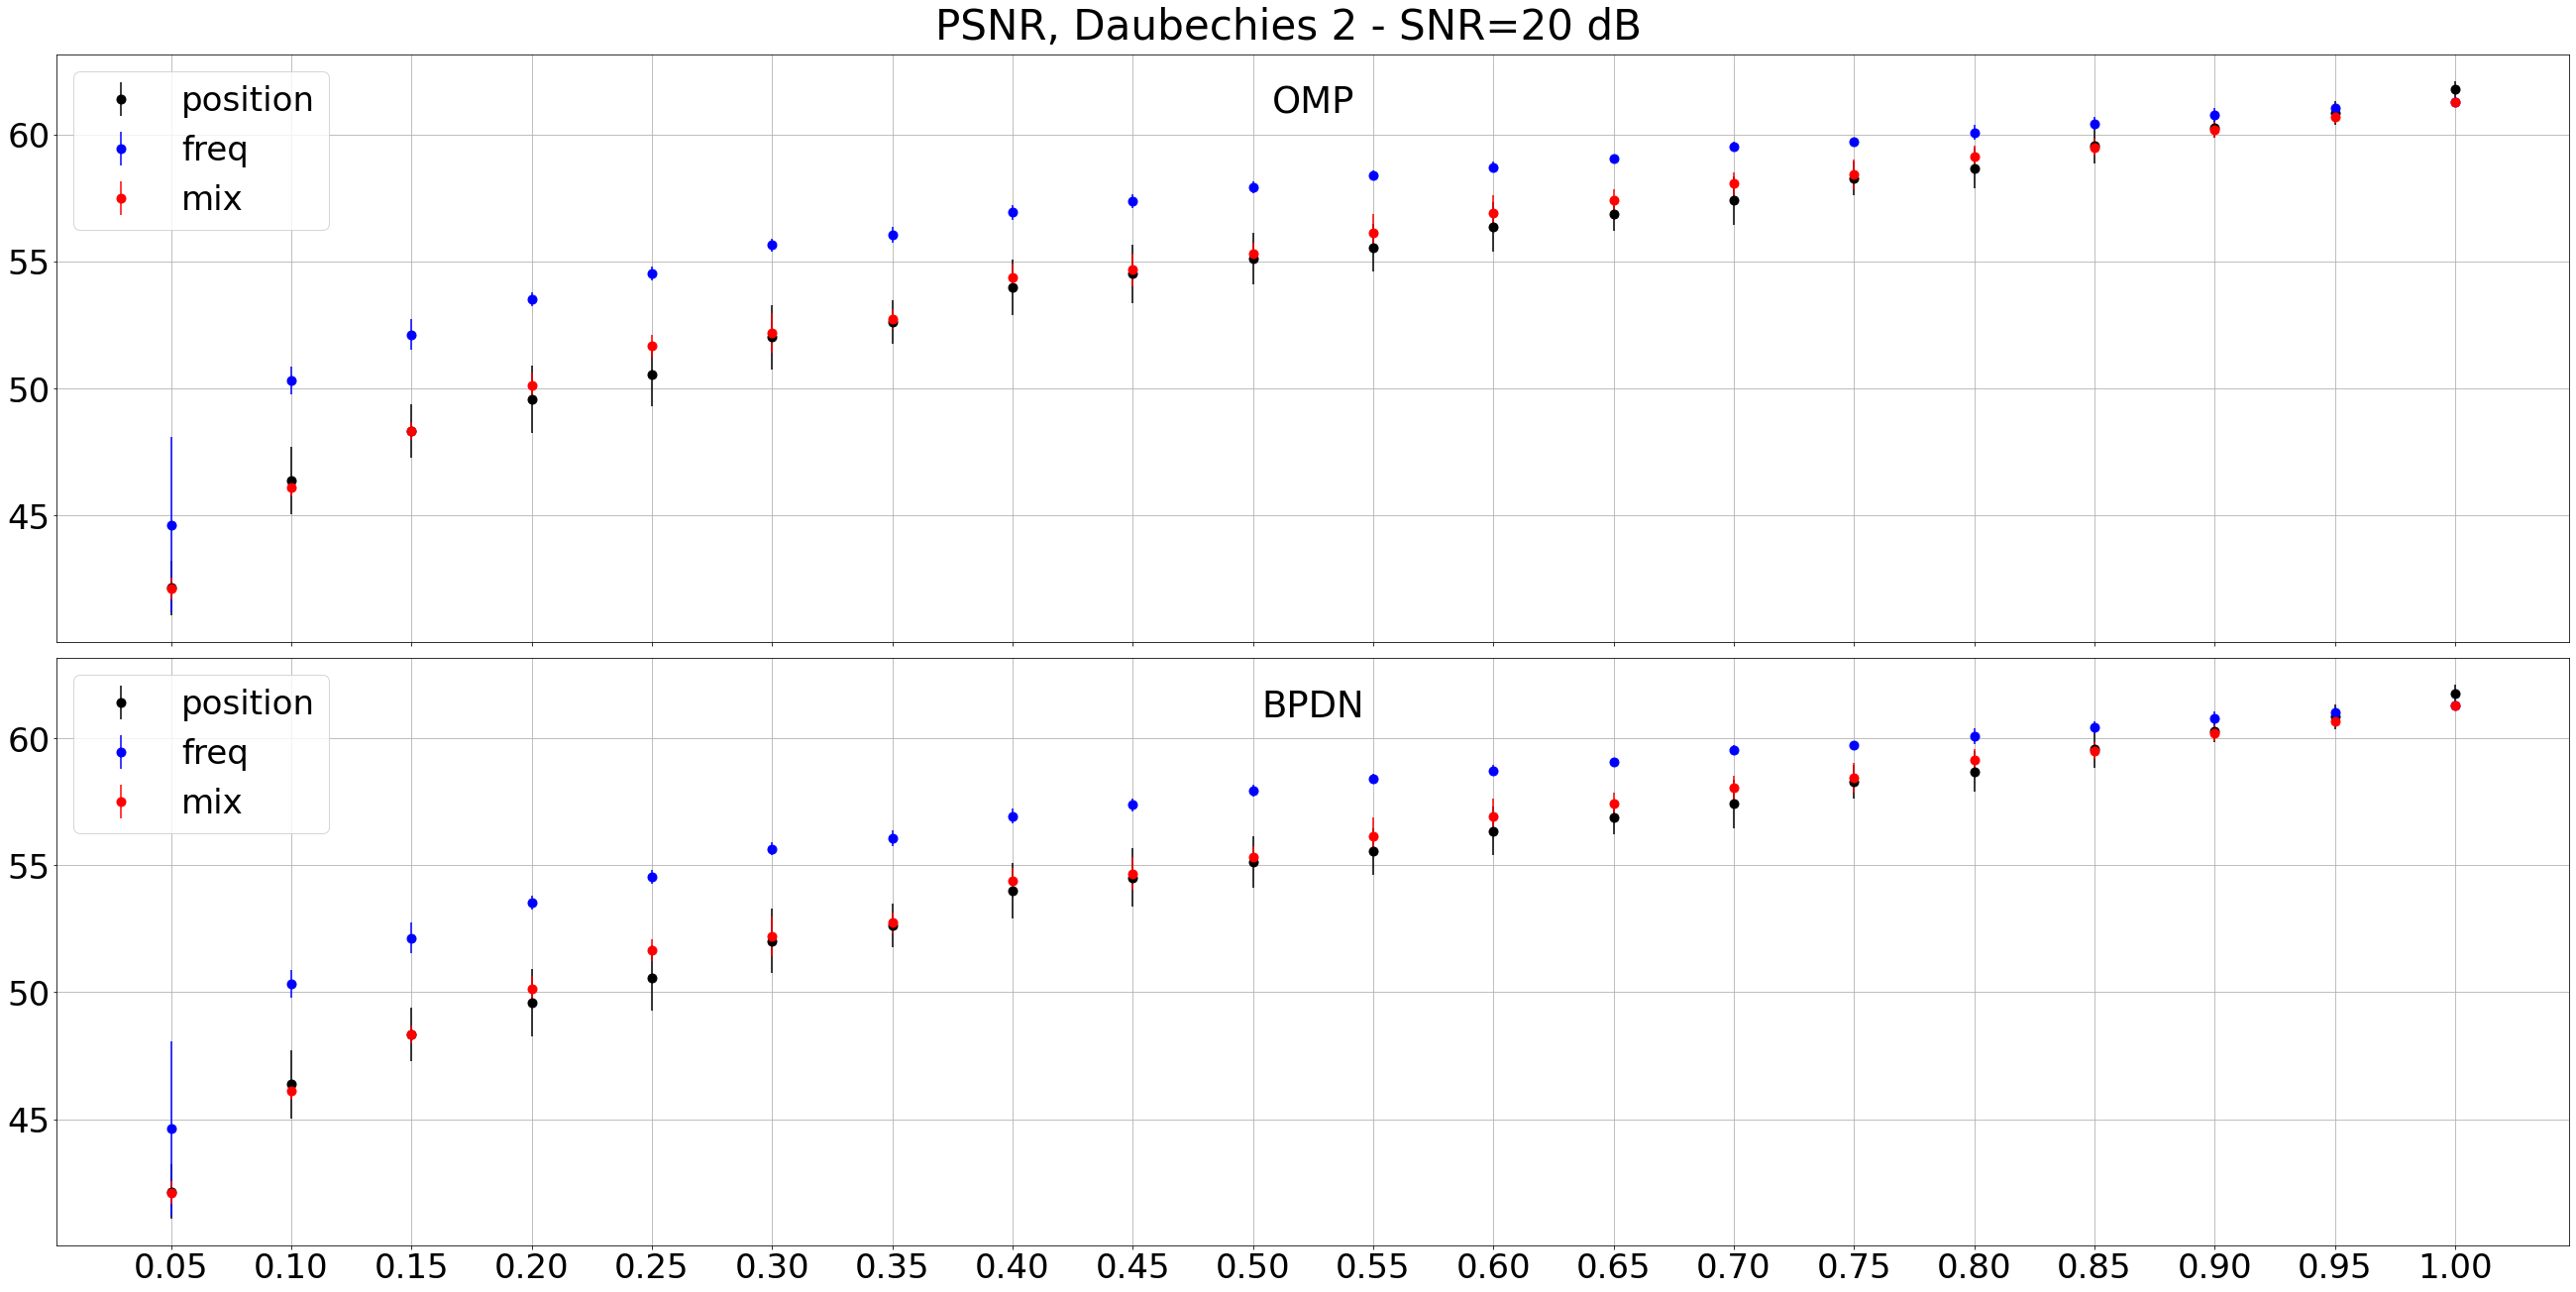

In [28]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus20dB,yerr=error_psnr_omp_db2_pos_plus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus20dB,yerr=error_psnr_omp_db2_freq_plus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus20dB,yerr=error_psnr_omp_db2_mixed_plus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus20dB,yerr=error_psnr_spgl1_db2_pos_plus20dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus20dB,yerr=error_psnr_spgl1_db2_freq_plus20dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus20dB,yerr=error_psnr_spgl1_db2_mixed_plus20dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=20 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=20dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=20dB.pdf',bbox_inches='tight')


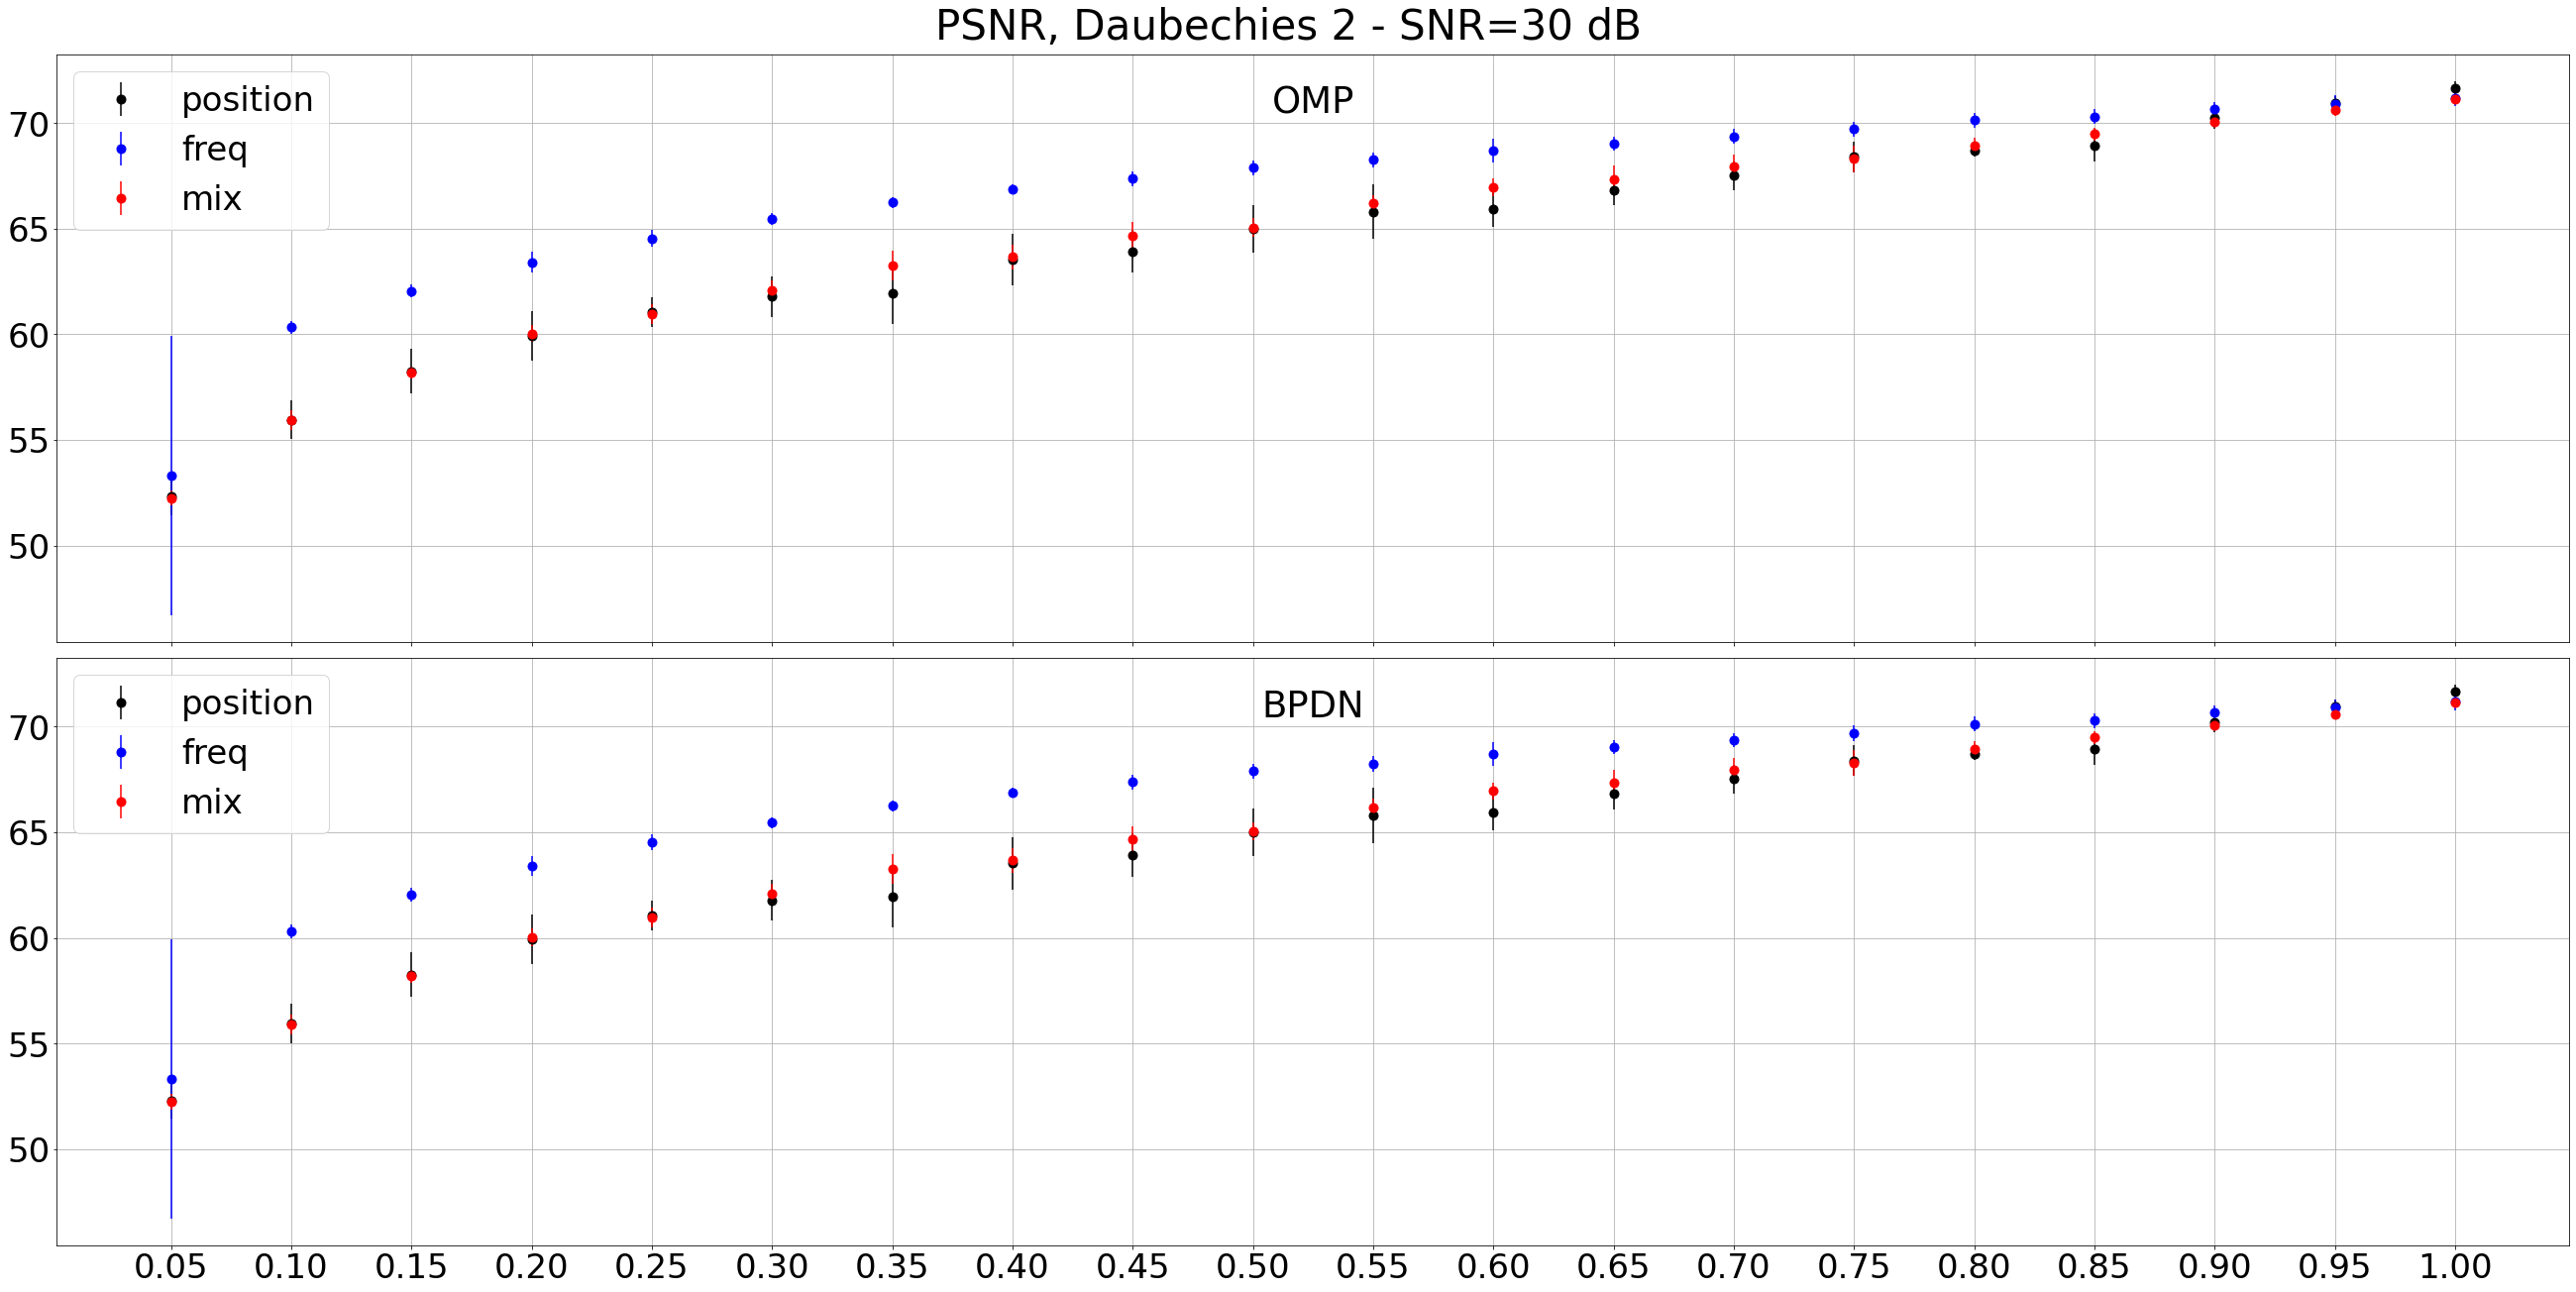

In [29]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus30dB,yerr=error_psnr_omp_db2_pos_plus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus30dB,yerr=error_psnr_omp_db2_freq_plus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus30dB,yerr=error_psnr_omp_db2_mixed_plus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus30dB,yerr=error_psnr_spgl1_db2_pos_plus30dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus30dB,yerr=error_psnr_spgl1_db2_freq_plus30dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus30dB,yerr=error_psnr_spgl1_db2_mixed_plus30dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=30 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=30dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=30dB.pdf',bbox_inches='tight')


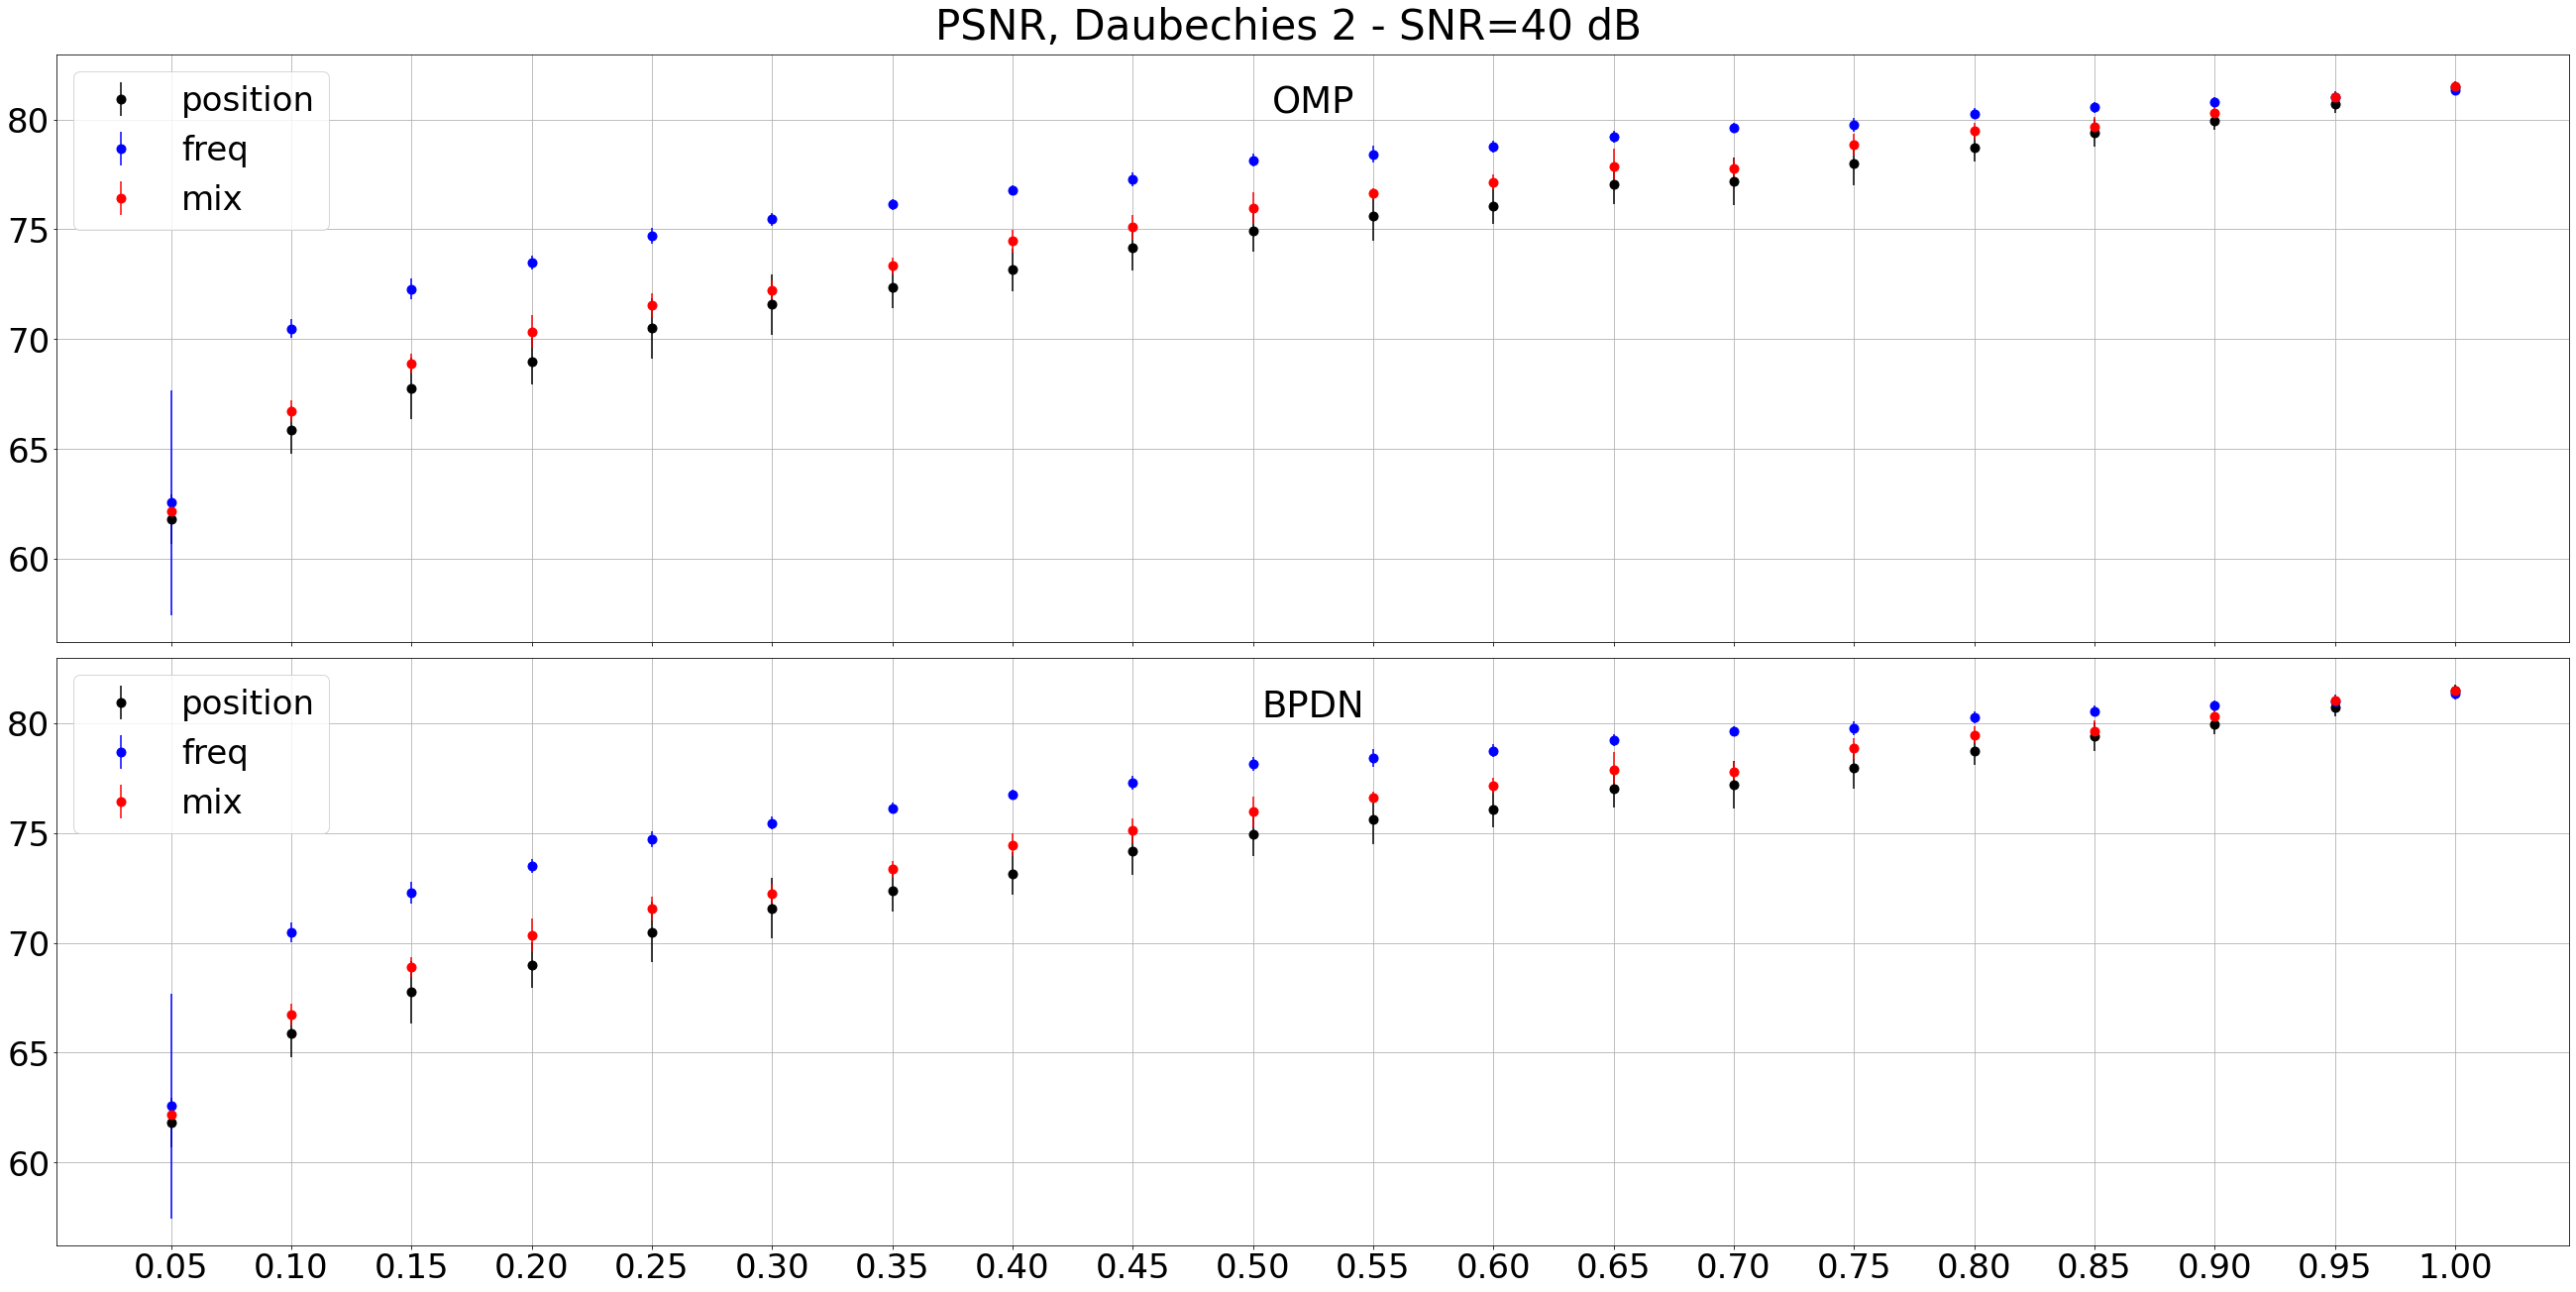

In [30]:
fig, ax = plt.subplots(2,1,figsize=(36,18),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_plus40dB,yerr=error_psnr_omp_db2_pos_plus40dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[0].errorbar(percentage,psnr_omp_db2_freq_plus40dB,yerr=error_psnr_omp_db2_freq_plus40dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[0].errorbar(percentage,psnr_omp_db2_mixed_plus40dB,yerr=error_psnr_omp_db2_mixed_plus40dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[0].legend(fontsize=fontsize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].xaxis.set_major_locator(loc)
ax[0].grid()
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_plus40dB,yerr=error_psnr_spgl1_db2_pos_plus40dB,label='position',fmt='.',markersize=markersize,color=colors[0])
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_plus40dB,yerr=error_psnr_spgl1_db2_freq_plus40dB,label='freq',fmt='.',markersize=markersize,color=colors[1])
ax[1].errorbar(percentage,psnr_spgl1_db2_mixed_plus40dB,yerr=error_psnr_spgl1_db2_mixed_plus40dB,label='mix',fmt='.',markersize=markersize,color=colors[2])
ax[1].legend(fontsize=fontsize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].xaxis.set_major_locator(loc)
ax[1].grid()
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
fig.suptitle('PSNR, Daubechies 2 - SNR=40 dB',fontsize=fontsize+8)
plt.savefig('psnr-db2-snr=40dB.png',bbox_inches='tight')
plt.savefig('psnr-db2-snr=40dB.pdf',bbox_inches='tight')


In [ ]:
rmse_omp_module_db2_freq_plus20dB,rmse_omp_error_module_db2_freq_plus20dB,rmse_omp_phase_db2_freq_plus20dB,rmse_omp_error_phase_db2_freq_plus20dB,    rmse_omp_module_haar_freq_plus20dB,rmse_omp_error_module_haar_freq_plus20dB,rmse_omp_phase_haar_freq_plus20dB,rmse_omp_error_phase_haar_freq_plus20dB,psnr_omp_sym2_freq_plus20dB_freq_plus20dB,error_psnr_omp_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_module_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_error_module_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_phase_sym2_freq_plus20dB_freq_plus20dB,rmse_omp_error_phase_sym2_freq_plus20dB_freq_plus20dB,psnr_spgl1_db2_freq_plus20dB,error_psnr_spgl1_db2_freq_plus20dB,rmse_spgl1_module_db2_freq_plus20dB,rmse_spgl1_error_module_db2_freq_plus20dB,rmse_spgl1_phase_db2_freq_plus20dB,rmse_spgl1_error_phase_db2_freq_plus20dB,psnr_spgl1_haar_freq_plus20dB,error_psnr_spgl1_haar_freq_plus20dB,rmse_spgl1_module_haar_freq_plus20dB,rmse_spgl1_error_module_haar_freq_plus20dB,rmse_spgl1_phase_haar_freq_plus20dB,rmse_spgl1_error_phase_haar_freq_plus20dB,psnr_spgl1_sym2_freq_plus20dB,error_psnr_spgl1_sym2_freq_plus20dB,rmse_spgl1_module_sym2_freq_plus20dB,rmse_spgl1_error_module_sym2_freq_plus20dB,rmse_spgl1_phase_sym2_freq_plus20dB,rmse_spgl1_error_phase_sym2_freq_plus20dB = GetArrays(filename_freq_plus20dB)


Text(0.5, 0.98, 'PSNR - Daubechies 2 - SNR = -10 dB')

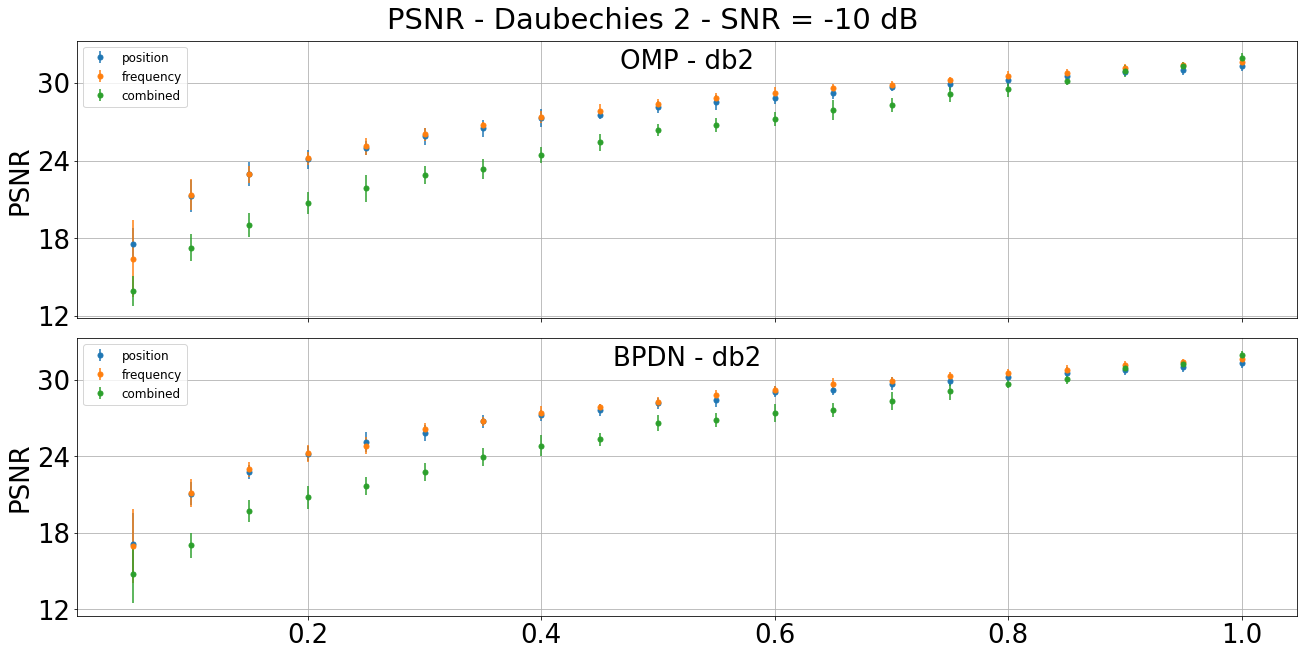

In [70]:
loc = 'best'
fontsize=26
fig, ax = plt.subplots(2,1,sharex=True,figsize=(18,9),constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_combined_minus10dB,yerr=error_psnr_omp_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)

ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus10dB,yerr=error_psnr_spgl1_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus10dB,yerr=error_psnr_spgl1_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_combined_minus10dB,yerr=error_psnr_spgl1_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)

ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.9,'BPDN ',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
fig.suptitle('PSNR - Daubechies 2 - SNR = -10 dB',fontsize=fontsize+3)

Text(0.5, 0.98, 'PSNR - Daubechies 2 - SNR = -20 dB')

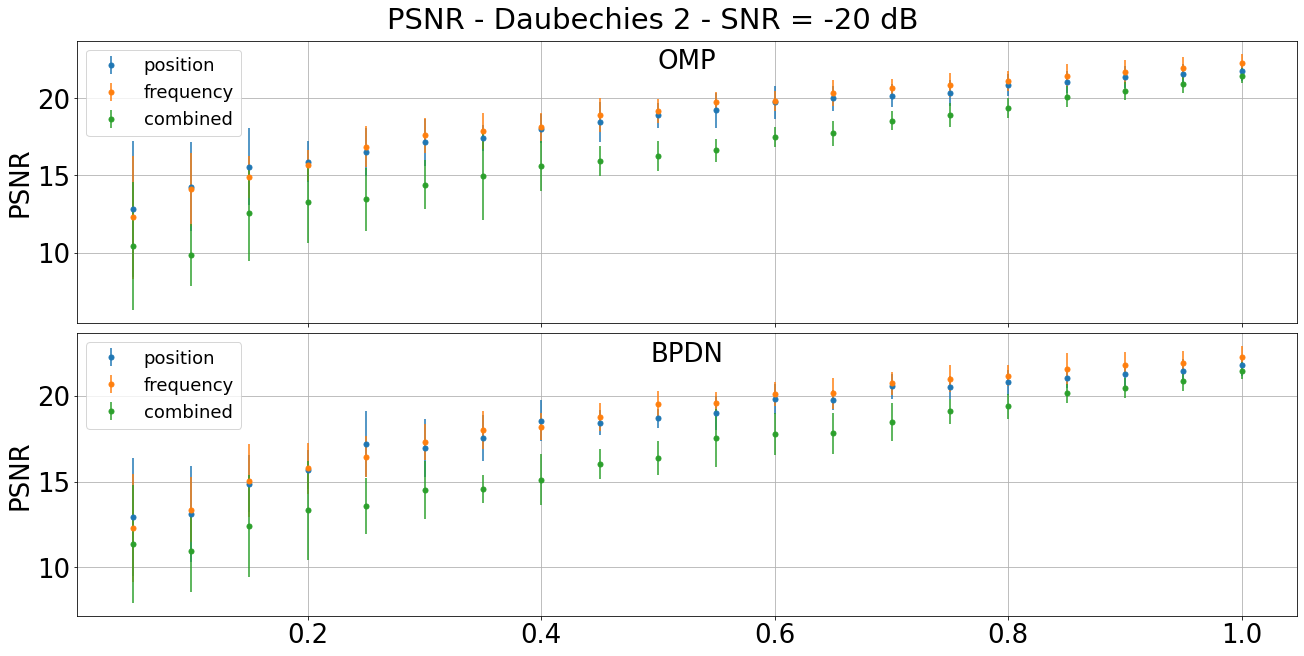

In [73]:
loc = 'best'
fig, ax = plt.subplots(2,1,sharex=True,figsize=(18,9),constrained_layout=True)
ax[0].errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,psnr_omp_db2_combined_minus20dB,yerr=error_psnr_omp_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)

ax[1].errorbar(percentage,psnr_spgl1_db2_pos_minus20dB,yerr=error_psnr_spgl1_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_freq_minus20dB,yerr=error_psnr_spgl1_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,psnr_spgl1_db2_combined_minus20dB,yerr=error_psnr_spgl1_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
fig.suptitle('PSNR - Daubechies 2 - SNR = -20 dB',fontsize=fontsize+3)

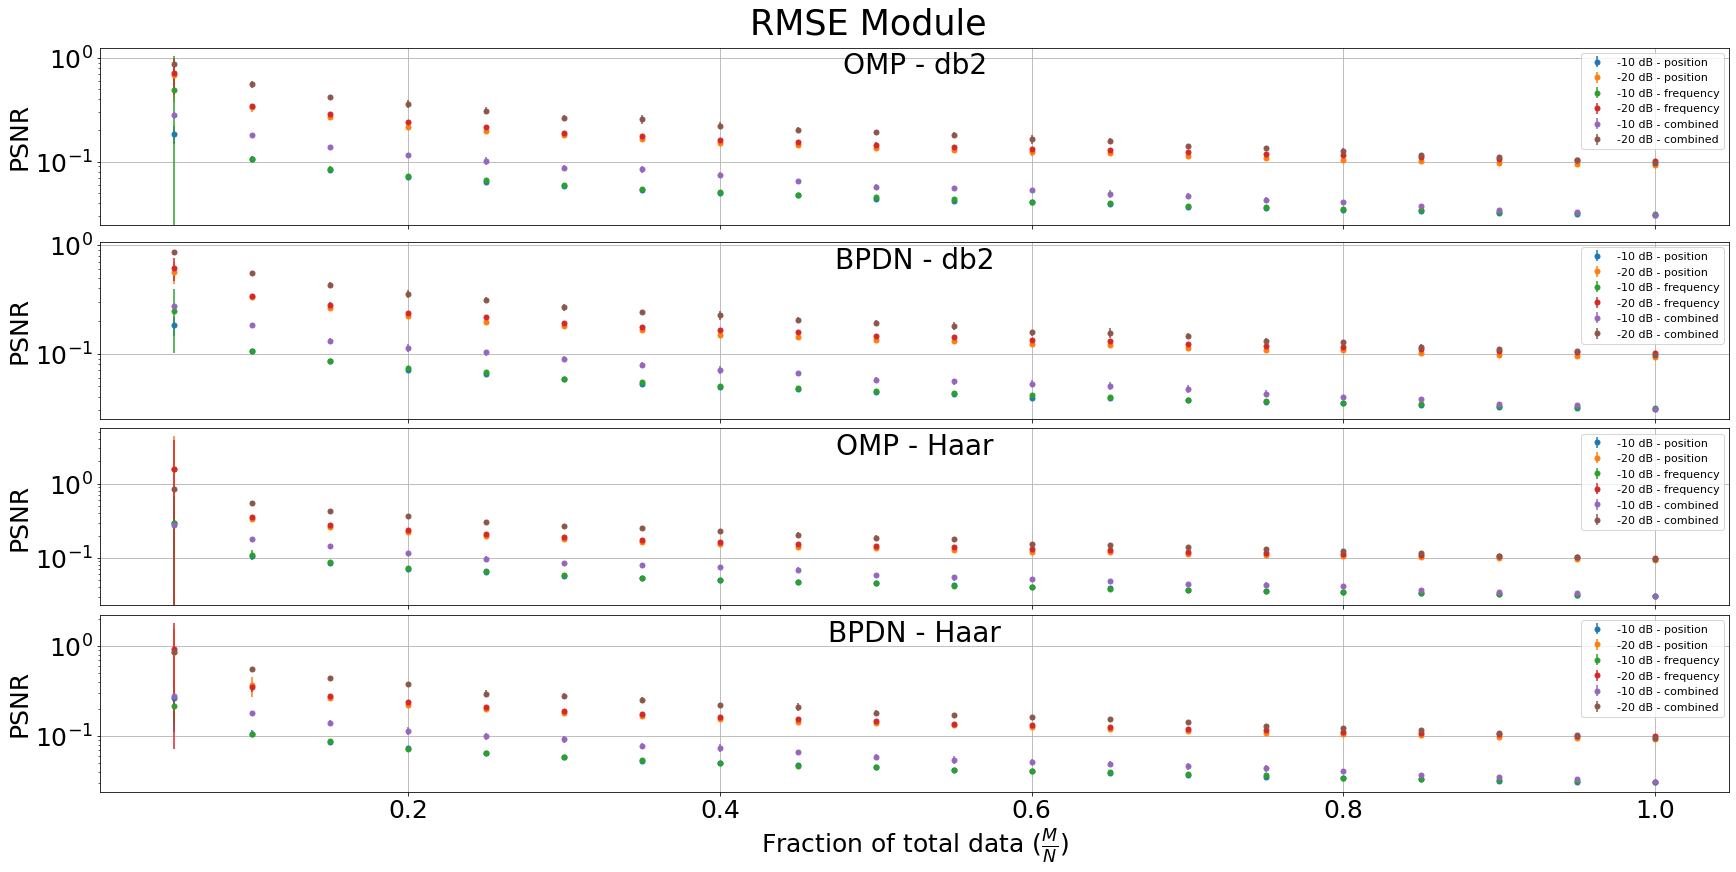

In [88]:
yd, yu = 5,95
xi,xf = 0.0,1.07
fontsize=25
markersize=10
loc = 'upper right'
fig, ax = plt.subplots(4,1,figsize=(24,12),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus10dB,yerr=rmse_omp_error_module_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus20dB,yerr=rmse_omp_error_module_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus10dB,yerr=rmse_omp_error_module_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus20dB,yerr=rmse_omp_error_module_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus10dB,yerr=rmse_omp_error_module_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus20dB,yerr=rmse_omp_error_module_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('PSNR', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.85,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)
ax[0].set_yscale('log')
#ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
#ax[0].set_xlim(xi,xf)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus10dB,yerr=rmse_spgl1_error_module_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus20dB,yerr=rmse_spgl1_error_module_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus10dB,yerr=rmse_spgl1_error_module_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus20dB,yerr=rmse_spgl1_error_module_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus10dB,yerr=rmse_spgl1_error_module_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus20dB,yerr=rmse_spgl1_error_module_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('PSNR', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.85,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
ax[1].set_yscale('log')
#ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
#ax[1].set_xlim(xi,xf)
#ax[2].errorbar(percentage,psnr_omp_haar_pos_minus10dB,yerr=error_psnr_omp_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
#ax[2].errorbar(percentage,psnr_omp_haar_pos_minus20dB,yerr=error_psnr_omp_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
#ax[2].errorbar(percentage,psnr_omp_haar_freq_minus10dB,yerr=error_psnr_omp_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
#ax[2].errorbar(percentage,psnr_omp_haar_freq_minus20dB,yerr=error_psnr_omp_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_pos_minus10dB,yerr=rmse_omp_error_module_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_pos_minus20dB,yerr=rmse_omp_error_module_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_freq_minus10dB,yerr=rmse_omp_error_module_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_freq_minus20dB,yerr=rmse_omp_error_module_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_combined_minus10dB,yerr=rmse_omp_error_module_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_module_haar_combined_minus20dB,yerr=rmse_omp_error_module_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[2].xaxis.set_tick_params(labelsize=fontsize)
ax[2].yaxis.set_tick_params(labelsize=fontsize)
ax[2].set_ylabel('PSNR', fontsize=fontsize)
ax[2].grid()
ax[2].legend(fontsize=fontsize-14,loc=loc)
ax[2].text(.5,.85,'OMP - Haar',horizontalalignment='center',transform=ax[2].transAxes,fontsize=fontsize+3)
ax[2].set_yscale('log')
#ax[2].yaxis.set_major_locator(yticks)
#ax[2].set_ylim(yd,yu)
#ax[2].set_xlim(xi,xf)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_pos_minus10dB,yerr=rmse_spgl1_error_module_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_pos_minus20dB,yerr=rmse_spgl1_error_module_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_freq_minus10dB,yerr=rmse_spgl1_error_module_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_freq_minus20dB,yerr=rmse_spgl1_error_module_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_combined_minus10dB,yerr=rmse_spgl1_error_module_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_module_haar_combined_minus20dB,yerr=rmse_spgl1_error_module_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[3].xaxis.set_tick_params(labelsize=fontsize)
ax[3].yaxis.set_tick_params(labelsize=fontsize)
#ax[3].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+8)
ax[3].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax[3].set_ylabel('PSNR', fontsize=fontsize)
ax[3].grid()
ax[3].legend(fontsize=fontsize-14,loc=loc)
ax[3].text(.5,.85,'BPDN - Haar',horizontalalignment='center',transform=ax[3].transAxes,fontsize=fontsize+3)
ax[3].set_yscale('log')
#ax[3].yaxis.set_major_locator(yticks)
#ax[3].set_ylim(yd,yu)
#ax[3].set_xlim(xi,xf)
#ax[3].set_yscale('log')
fig.suptitle(r'PSNR vs $\frac{M}{N}$',fontsize=fontsize+10)
plt.savefig('%s/psnr-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')

fig.suptitle(r'RMSE Module',fontsize=fontsize+10)
plt.savefig('%s/rmse-module-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')
plt.savefig('%s/rmse-module-vs-data-fraction-different-snr.png' % dir_plots,bbox_inches='tight')

Text(0.5, 0.98, 'RMSE Module - Daubechies 2 - SNR = -10 dB')

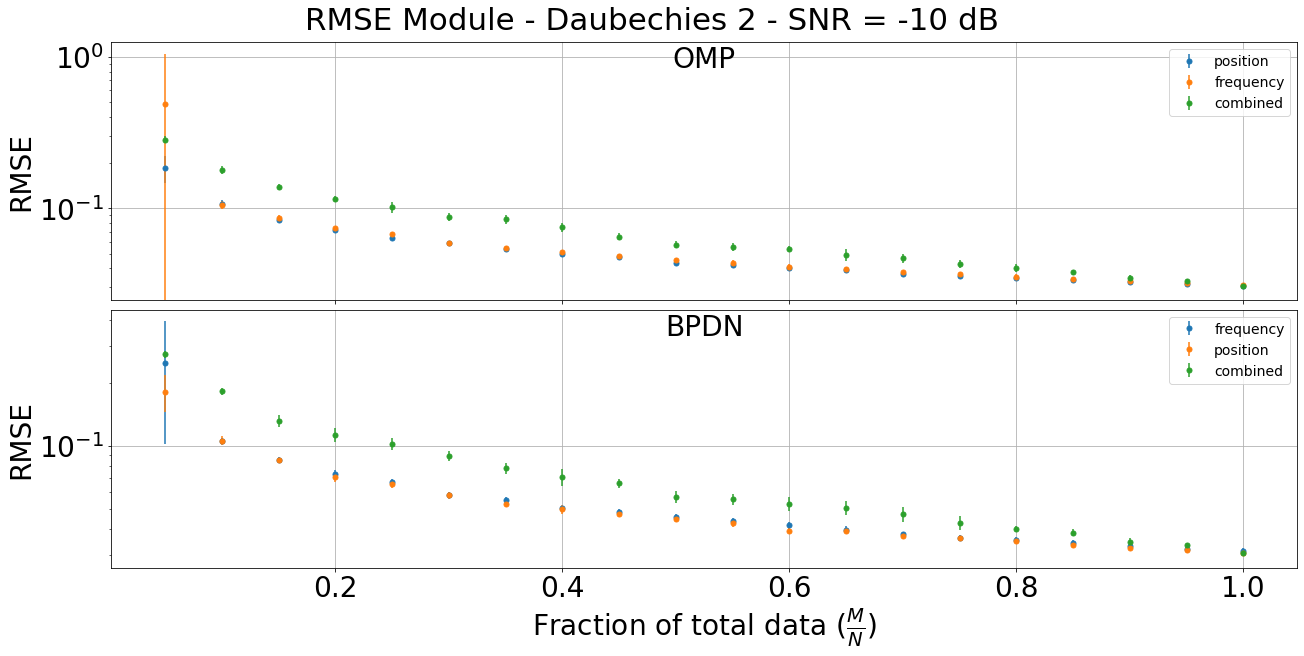

In [79]:
yd,yu = -0.1,1.1
fontsize = 28
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus10dB,yerr=rmse_omp_error_module_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus10dB,yerr=rmse_omp_error_module_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus10dB,yerr=rmse_omp_error_module_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus10dB,yerr=rmse_spgl1_error_module_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus10dB,yerr=rmse_spgl1_error_module_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus10dB,yerr=rmse_spgl1_error_module_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Module - Daubechies 2 - SNR = -10 dB',fontsize=fontsize+3)

Text(0.5, 0.98, 'RMSE Module - Daubechies 2 - SNR = -20 dB')

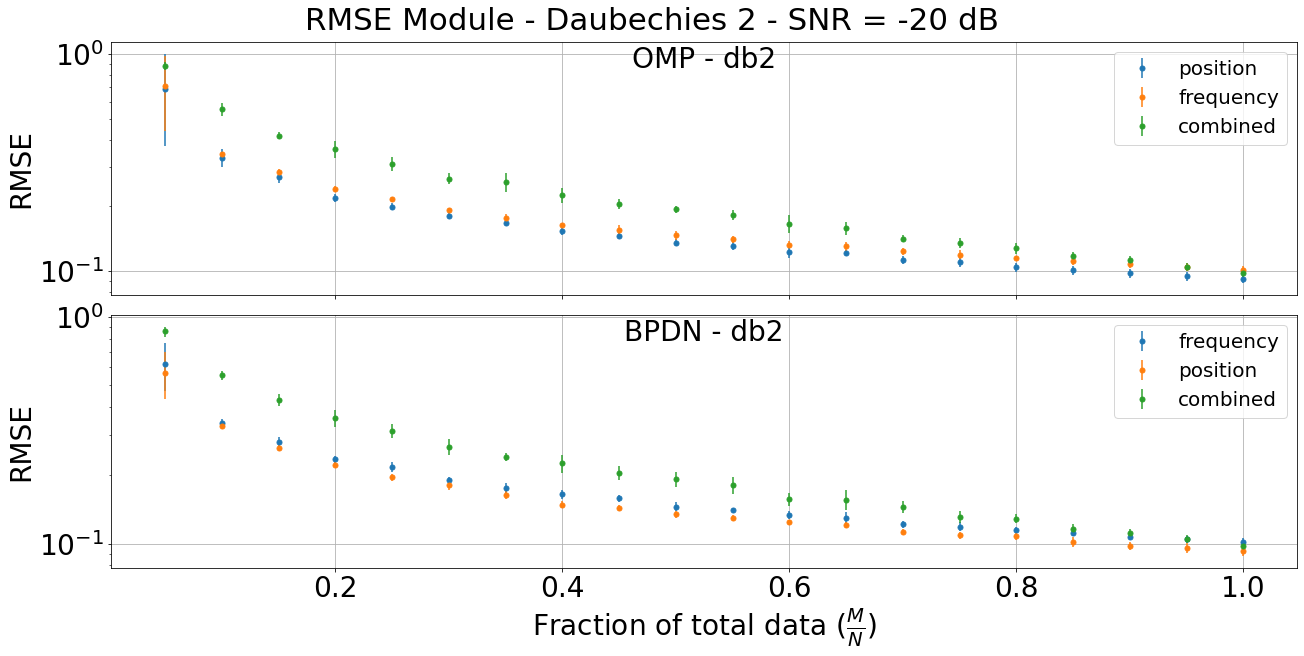

In [81]:
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_module_db2_pos_minus20dB,yerr=rmse_omp_error_module_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_freq_minus20dB,yerr=rmse_omp_error_module_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_module_db2_combined_minus20dB,yerr=rmse_omp_error_module_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_module_db2_freq_minus20dB,yerr=rmse_spgl1_error_module_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_pos_minus20dB,yerr=rmse_spgl1_error_module_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_module_db2_combined_minus20dB,yerr=rmse_spgl1_error_module_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)

ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
#fig.suptitle('Module -20 dB',fontsize=fontsize)
fig.suptitle('RMSE Module - Daubechies 2 - SNR = -20 dB',fontsize=fontsize+3)


Text(0.5, 0.98, 'PSNR - OMP - Daubechies 2')

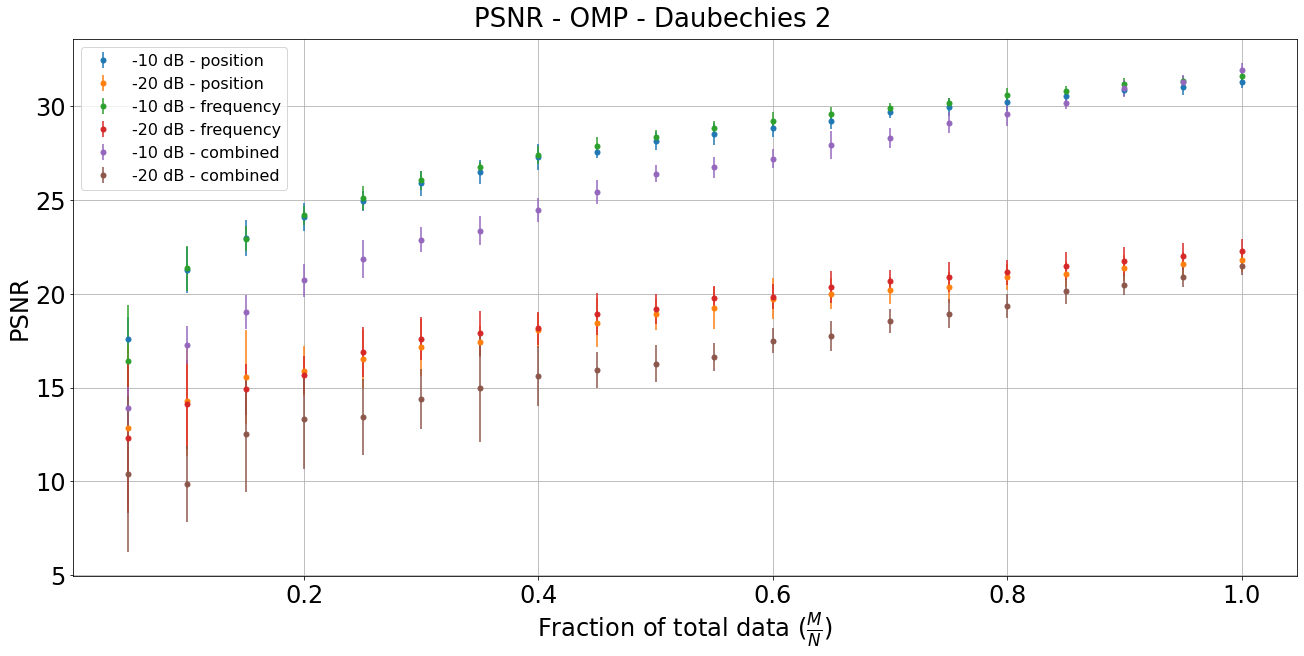

In [85]:
fontsize = 24
fig, ax = plt.subplots(figsize=(18,9),constrained_layout=True)
ax.errorbar(percentage,psnr_omp_db2_pos_minus10dB,yerr=error_psnr_omp_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_pos_minus20dB,yerr=error_psnr_omp_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_freq_minus10dB,yerr=error_psnr_omp_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_freq_minus20dB,yerr=error_psnr_omp_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_combined_minus10dB,yerr=error_psnr_omp_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_db2_combined_minus20dB,yerr=error_psnr_omp_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_ylabel('PSNR', fontsize=fontsize)
ax.grid()
ax.legend(fontsize=fontsize-8)
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('PSNR - OMP - Daubechies 2',fontsize=fontsize+2)

Text(0.5, 0.98, 'PSNR - OMP - Haar')

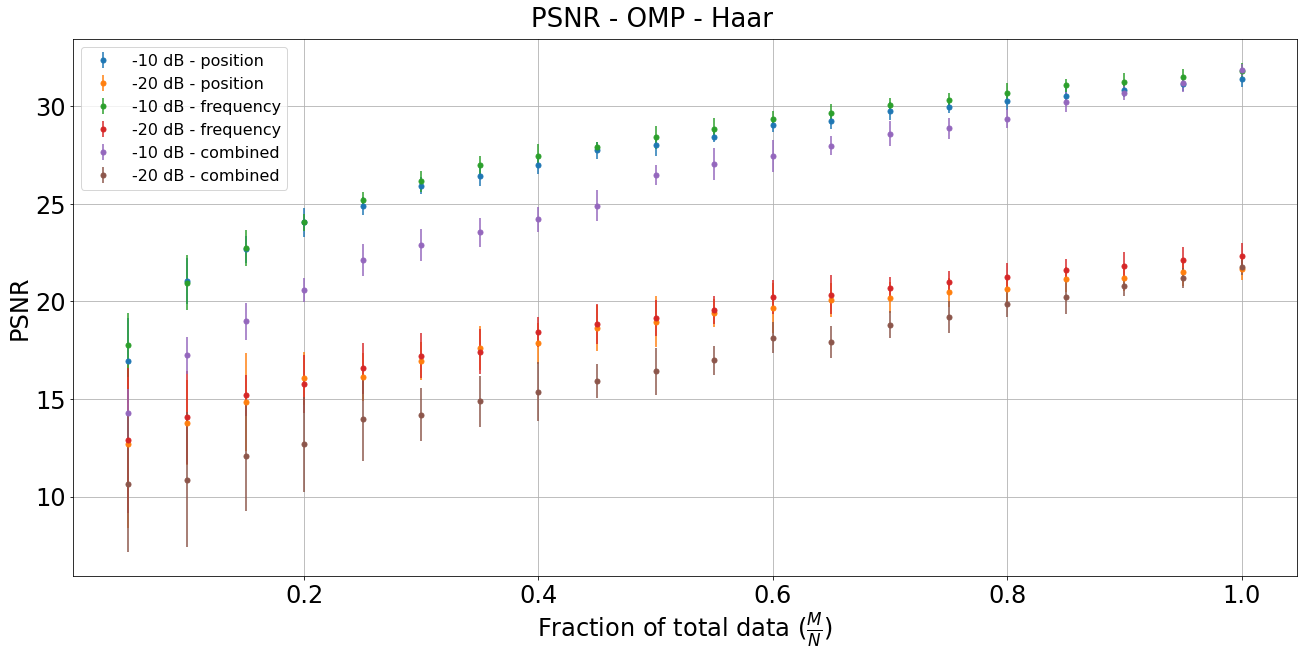

In [86]:
fontsize = 24
fig, ax = plt.subplots(figsize=(18,9),constrained_layout=True)
ax.errorbar(percentage,psnr_omp_haar_pos_minus10dB,yerr=error_psnr_omp_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_pos_minus20dB,yerr=error_psnr_omp_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_freq_minus10dB,yerr=error_psnr_omp_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_freq_minus20dB,yerr=error_psnr_omp_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_combined_minus10dB,yerr=error_psnr_omp_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,psnr_omp_haar_combined_minus20dB,yerr=error_psnr_omp_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_ylabel('PSNR', fontsize=fontsize)
ax.grid()
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax.legend(fontsize=fontsize-8,loc='best')
fig.suptitle('PSNR - OMP - Haar',fontsize=fontsize+2)


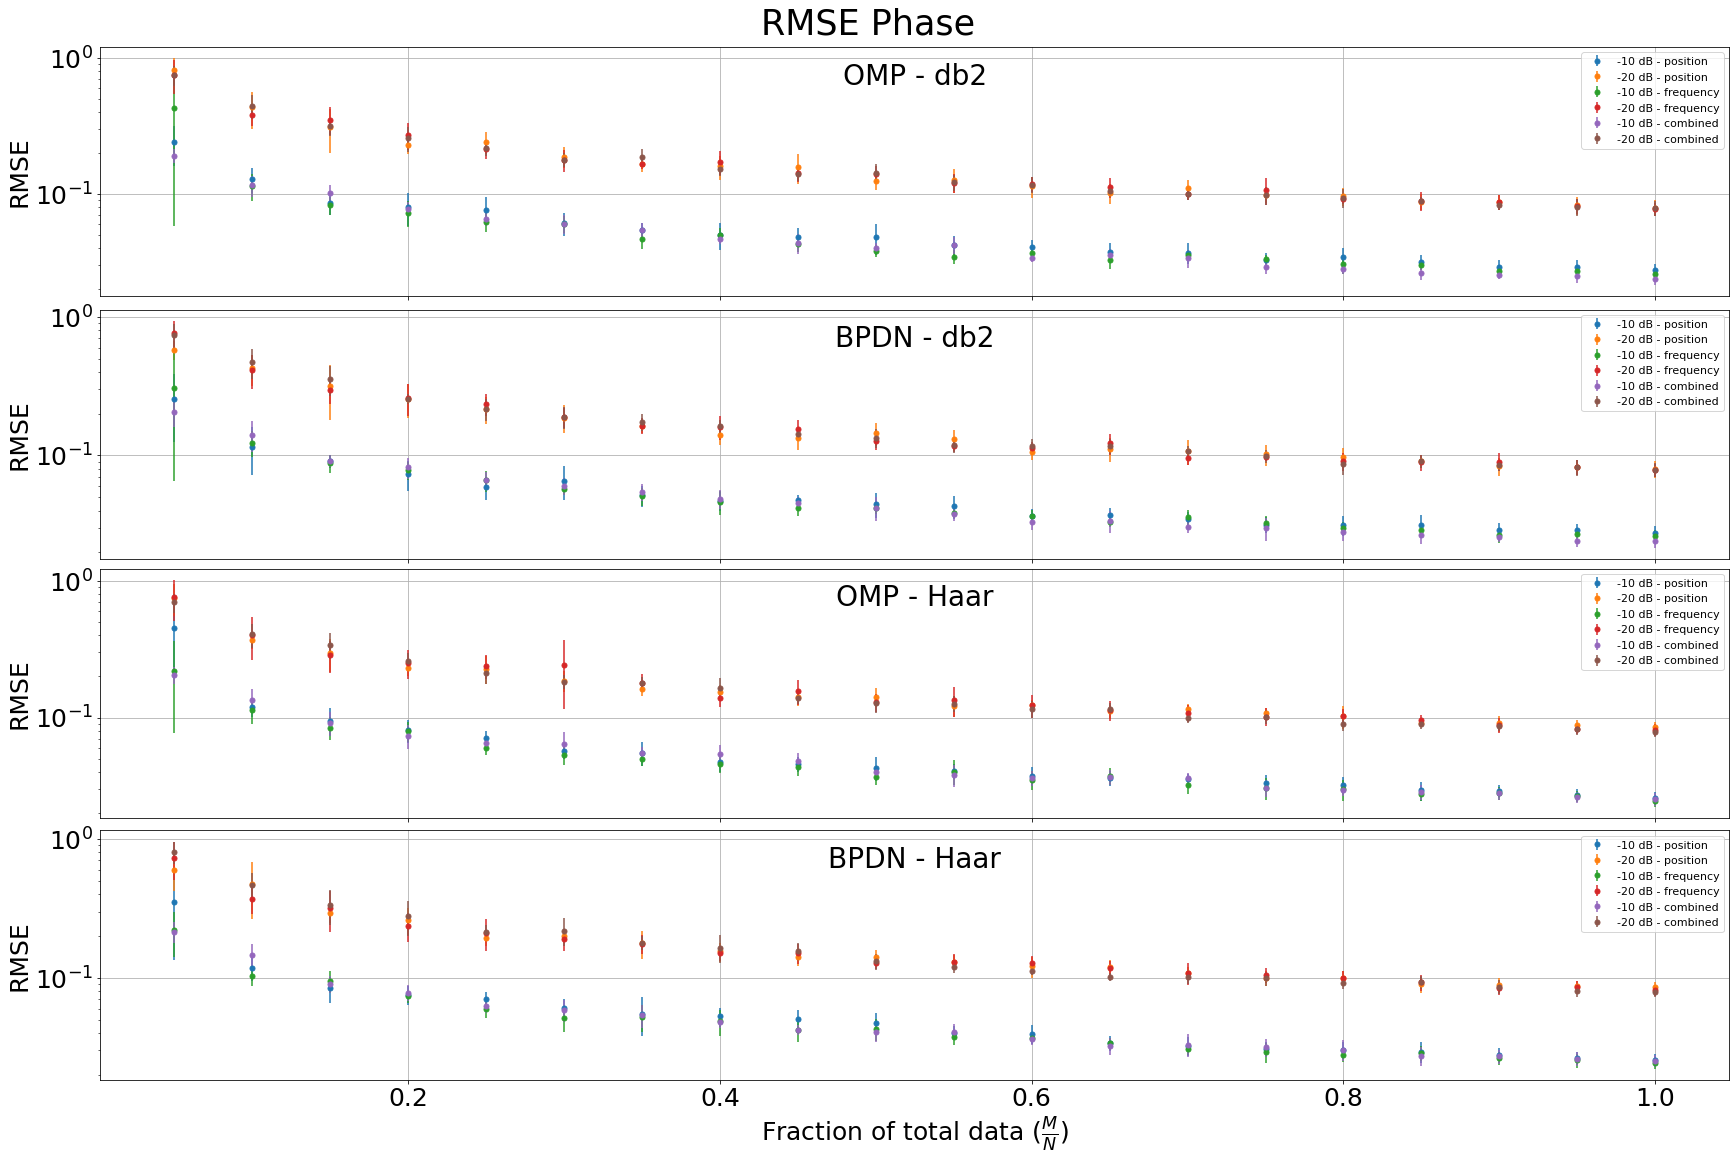

In [37]:
yd, yu = 5,95
xi,xf = 0.0,1.07
fontsize=25
markersize=10
loc = 'upper right'
fig, ax = plt.subplots(4,1,figsize=(24,16),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus10dB,yerr=rmse_omp_error_phase_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus20dB,yerr=rmse_omp_error_phase_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus10dB,yerr=rmse_omp_error_phase_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus20dB,yerr=rmse_omp_error_phase_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus10dB,yerr=rmse_omp_error_phase_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus20dB,yerr=rmse_omp_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-14,loc=loc)
ax[0].text(.5,.85,'OMP - db2',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize+3)
ax[0].set_yscale('log')
#ax[0].set_ylim(yd,yu)
#ax[0].set_xlim(xi,xf)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus10dB,yerr=rmse_spgl1_error_phase_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus20dB,yerr=rmse_spgl1_error_phase_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus10dB,yerr=rmse_spgl1_error_phase_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus20dB,yerr=rmse_spgl1_error_phase_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus10dB,yerr=rmse_spgl1_error_phase_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus20dB,yerr=rmse_spgl1_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-14,loc=loc)
ax[1].text(.5,.85,'BPDN - db2',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize+3)
ax[1].set_yscale('log')
#ax[1].set_ylim(yd,yu)
#ax[1].set_xlim(xi,xf)
ax[2].errorbar(percentage,rmse_omp_phase_haar_pos_minus10dB,yerr=rmse_omp_error_phase_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_pos_minus20dB,yerr=rmse_omp_error_phase_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_freq_minus10dB,yerr=rmse_omp_error_phase_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_freq_minus20dB,yerr=rmse_omp_error_phase_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_combined_minus10dB,yerr=rmse_omp_error_phase_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[2].errorbar(percentage,rmse_omp_phase_haar_combined_minus20dB,yerr=rmse_omp_error_phase_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[2].xaxis.set_tick_params(labelsize=fontsize)
ax[2].yaxis.set_tick_params(labelsize=fontsize)
ax[2].set_ylabel('RMSE', fontsize=fontsize)
ax[2].grid()
ax[2].legend(fontsize=fontsize-14,loc=loc)
ax[2].text(.5,.85,'OMP - Haar',horizontalalignment='center',transform=ax[2].transAxes,fontsize=fontsize+3)
ax[2].set_yscale('log')
#ax[2].set_ylim(yd,yu)
#ax[2].set_xlim(xi,xf)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus10dB,yerr=rmse_spgl1_error_phase_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus20dB,yerr=rmse_spgl1_error_phase_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus10dB,yerr=rmse_spgl1_error_phase_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus20dB,yerr=rmse_spgl1_error_phase_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus10dB,yerr=rmse_spgl1_error_phase_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax[3].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus20dB,yerr=rmse_spgl1_error_phase_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

ax[3].xaxis.set_tick_params(labelsize=fontsize)
ax[3].yaxis.set_tick_params(labelsize=fontsize)
#ax[3].set_xlabel(r'$\frac{M}{N}$',fontsize=fontsize+8)
ax[3].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax[3].set_ylabel('RMSE', fontsize=fontsize)
ax[3].grid()
ax[3].legend(fontsize=fontsize-14,loc=loc)
ax[3].text(.5,.85,'BPDN - Haar',horizontalalignment='center',transform=ax[3].transAxes,fontsize=fontsize+3)
#ax[3].set_ylim(yd,yu)
#ax[3].set_xlim(xi,xf)
ax[3].set_yscale('log')
fig.suptitle(r'RMSE Phase',fontsize=fontsize+10)
plt.savefig('%s/rmse-phase-vs-data-fraction-different-snr.pdf' % dir_plots,bbox_inches='tight')
plt.savefig('%s/rmse-phase-vs-data-fraction-different-snr.png' % dir_plots,bbox_inches='tight')

Text(0.5, 0.98, 'RMSE Phase - Daubechies 2 - SNR = -10 dB')

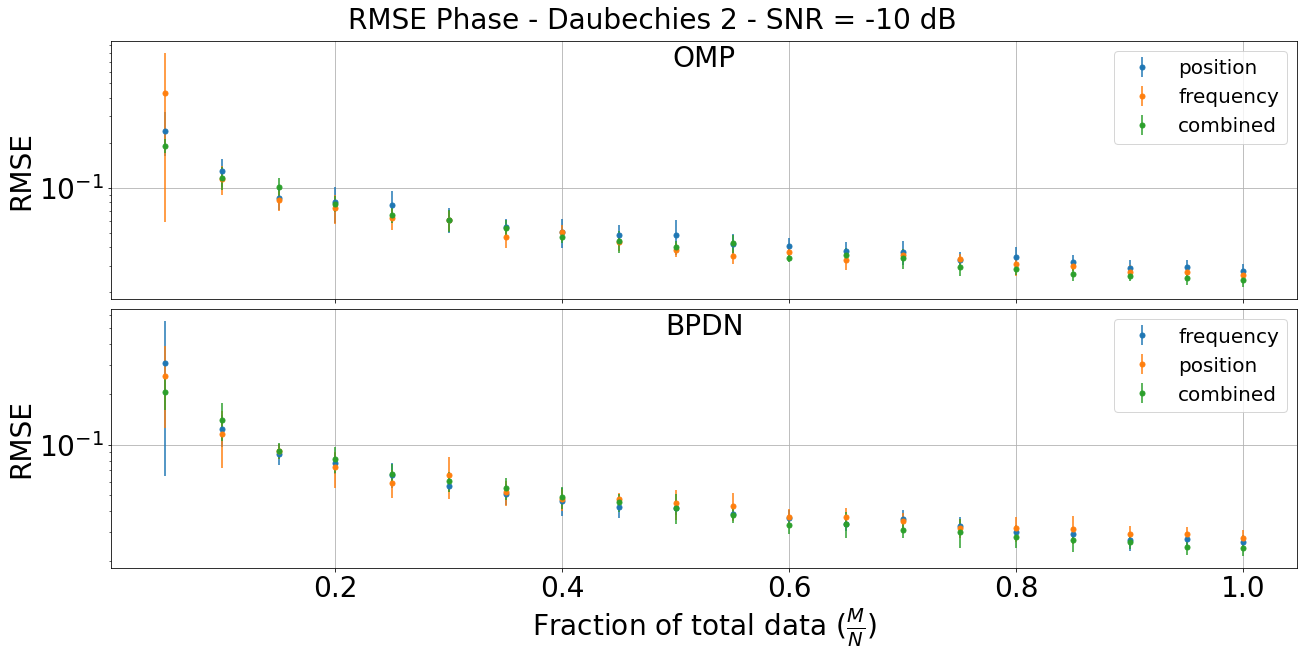

In [68]:
yd, yu = 0.,0.9
fontsize = 28
#ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus20dB,yerr=rmse_spgl1_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)

fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus10dB,yerr=rmse_omp_error_phase_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus10dB,yerr=rmse_omp_error_phase_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus10dB,yerr=rmse_omp_error_phase_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus10dB,yerr=rmse_spgl1_error_phase_db2_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus10dB,yerr=rmse_spgl1_error_phase_db2_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus10dB,yerr=rmse_spgl1_error_phase_db2_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Daubechies 2 - SNR = -10 dB',fontsize=fontsize)
                                                                     

Text(0.5, 0.98, 'RMSE Phase - Haar - SNR = -10 dB')

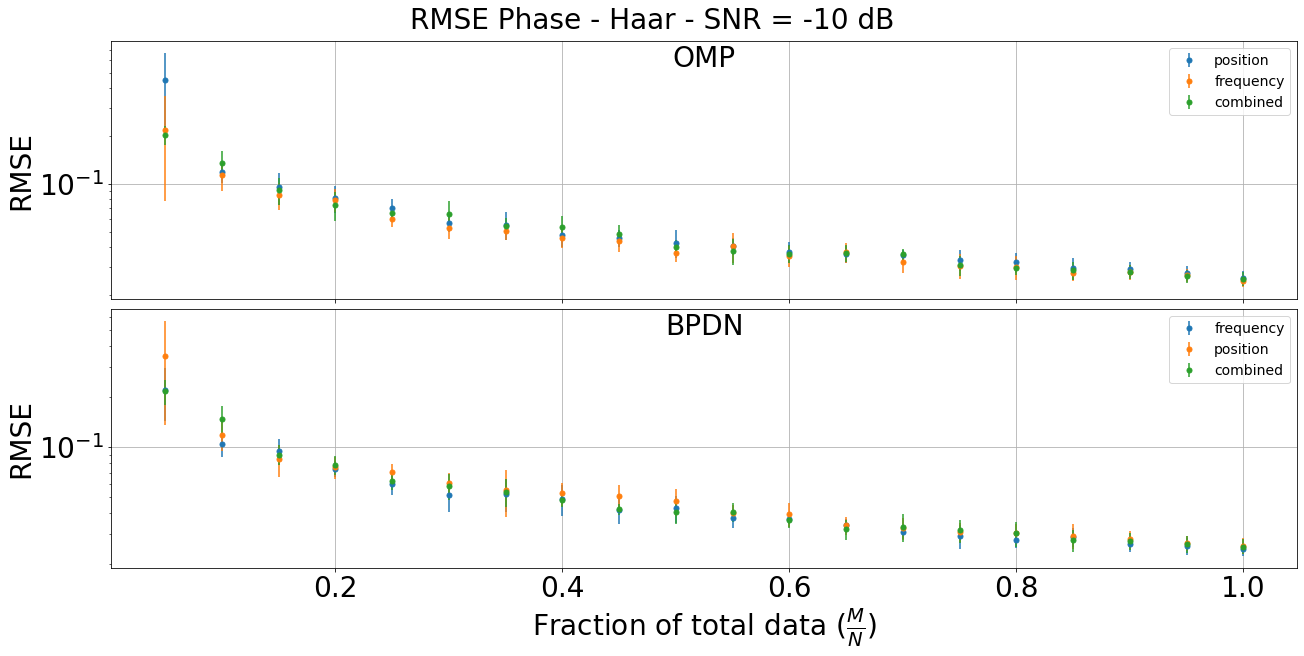

In [69]:
yd, yu = 0.,0.9
fontsize = 28
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_haar_pos_minus10dB,yerr=rmse_omp_error_phase_haar_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_freq_minus10dB,yerr=rmse_omp_error_phase_haar_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_combined_minus10dB,yerr=rmse_omp_error_phase_haar_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-8,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
#ax[0].set_ylim(yd,yu)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus10dB,yerr=rmse_spgl1_error_phase_haar_freq_minus10dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus10dB,yerr=rmse_spgl1_error_phase_haar_pos_minus10dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus10dB,yerr=rmse_spgl1_error_phase_haar_combined_minus10dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-8,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
#ax[1].set_ylim(yd,yu)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Haar - SNR = -10 dB',fontsize=fontsize)

Text(0.5, 0.98, 'RMSE Phase - Daubechies SNR = -20 dB')

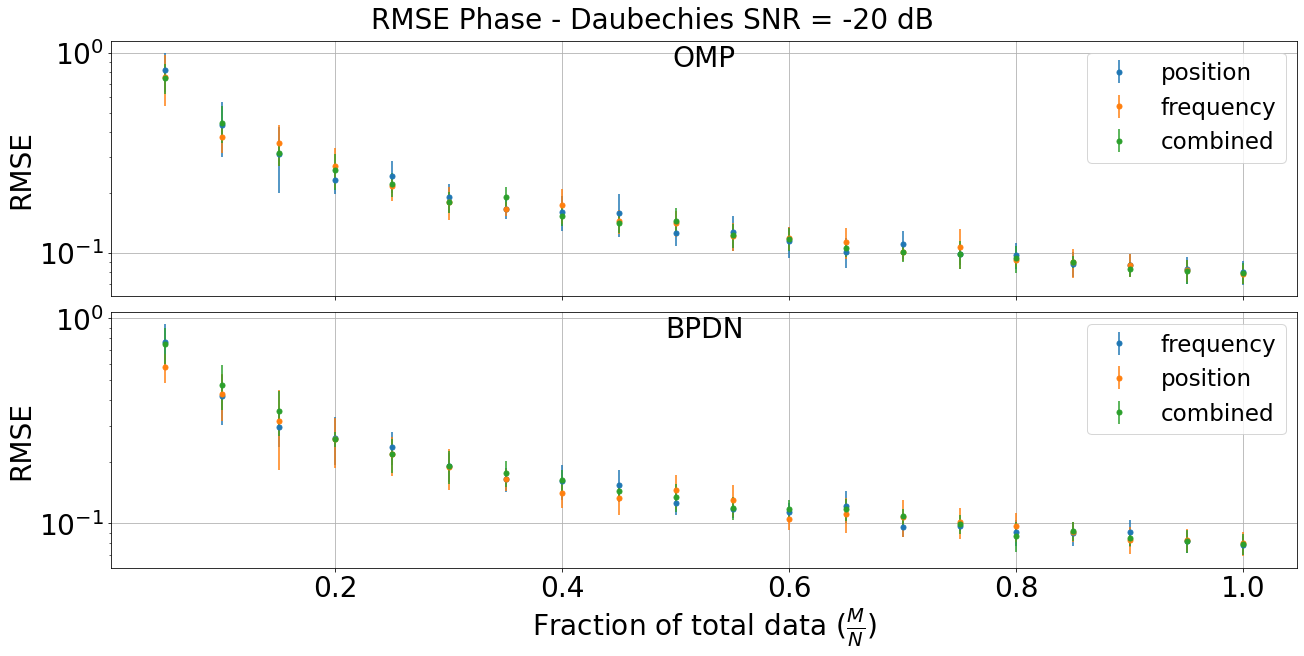

In [55]:
fontize = 24
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_db2_pos_minus20dB,yerr=rmse_omp_error_phase_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_freq_minus20dB,yerr=rmse_omp_error_phase_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_db2_combined_minus20dB,yerr=rmse_omp_error_phase_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-5,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_freq_minus20dB,yerr=rmse_spgl1_error_phase_db2_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_pos_minus20dB,yerr=rmse_spgl1_error_phase_db2_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_db2_combined_minus20dB,yerr=rmse_spgl1_error_phase_db2_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-5,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Daubechies - SNR = -20 dB',fontsize=fontsize)

Text(0.5, 0.98, 'RMSE Phase - Haar SNR = -20 dB')

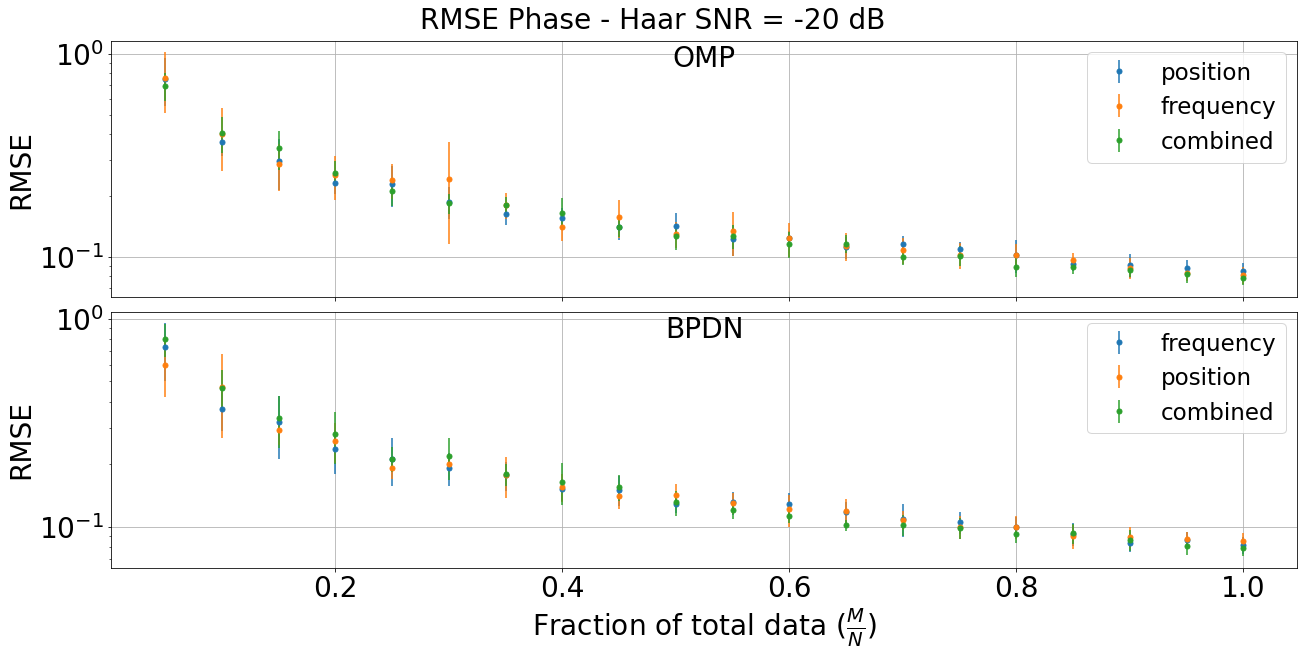

In [56]:
fontize = 24
fig, ax = plt.subplots(2,1,figsize=(18,9),sharex=True,constrained_layout=True)
ax[0].errorbar(percentage,rmse_omp_phase_haar_pos_minus20dB,yerr=rmse_omp_error_phase_haar_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_freq_minus20dB,yerr=rmse_omp_error_phase_haar_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[0].errorbar(percentage,rmse_omp_phase_haar_combined_minus20dB,yerr=rmse_omp_error_phase_haar_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[0].xaxis.set_tick_params(labelsize=fontsize)
ax[0].yaxis.set_tick_params(labelsize=fontsize)
ax[0].set_ylabel('RMSE', fontsize=fontsize)
ax[0].grid()
ax[0].legend(fontsize=fontsize-5,loc=loc)
ax[0].text(.5,.9,'OMP',horizontalalignment='center',transform=ax[0].transAxes,fontsize=fontsize)
ax[0].yaxis.set_major_locator(yticks)
ax[0].set_yscale('log')
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_freq_minus20dB,yerr=rmse_spgl1_error_phase_haar_freq_minus20dB,label='frequency',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_pos_minus20dB,yerr=rmse_spgl1_error_phase_haar_pos_minus20dB,label='position',fmt='.',markersize=markersize)
ax[1].errorbar(percentage,rmse_spgl1_phase_haar_combined_minus20dB,yerr=rmse_spgl1_error_phase_haar_combined_minus20dB,label='combined',fmt='.',markersize=markersize)
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
ax[1].set_ylabel('RMSE', fontsize=fontsize)
ax[1].grid()
ax[1].legend(fontsize=fontsize-5,loc=loc)
ax[1].text(.5,.9,'BPDN',horizontalalignment='center',transform=ax[1].transAxes,fontsize=fontsize)
ax[1].yaxis.set_major_locator(yticks)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
fig.suptitle('RMSE Phase - Haar - SNR = -20 dB',fontsize=fontsize)

Text(0.5, 0.98, 'RMSE Phase - OMP - Daubechies 2')

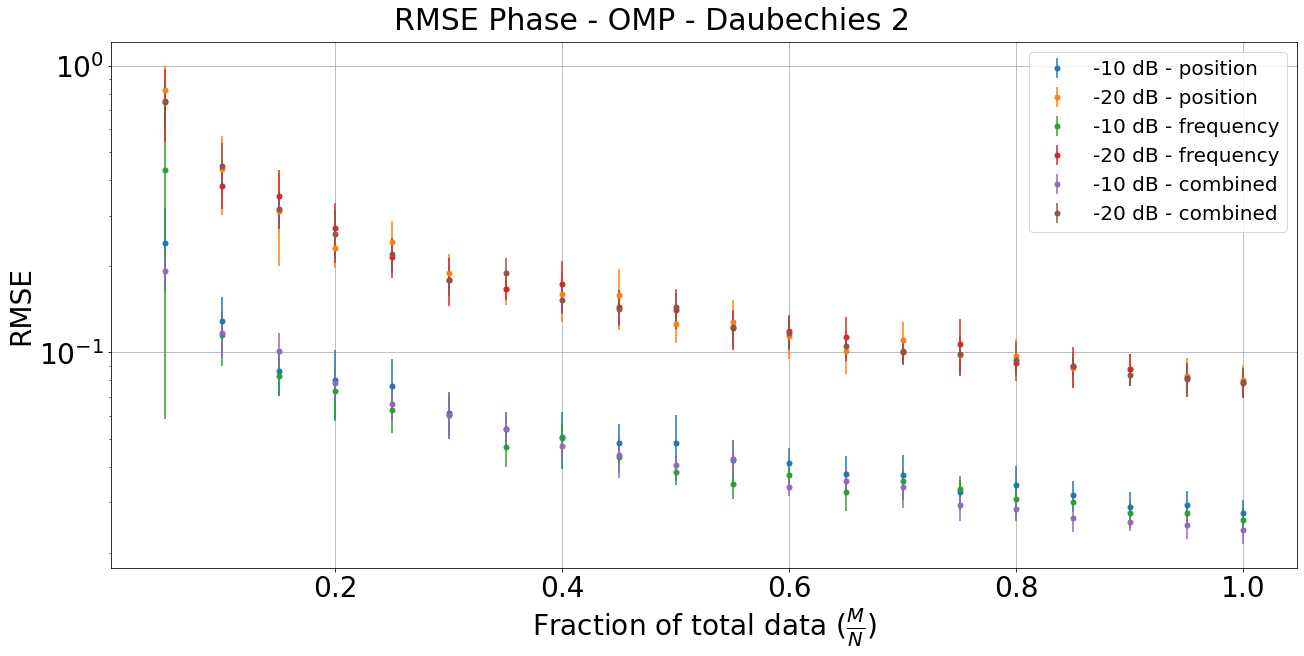

In [52]:
fontsize = 28
fig, ax = plt.subplots(figsize=(18,9),sharex=True,constrained_layout=True)
ax.errorbar(percentage,rmse_omp_phase_db2_pos_minus10dB,yerr=rmse_omp_error_phase_db2_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_pos_minus20dB,yerr=rmse_omp_error_phase_db2_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_freq_minus10dB,yerr=rmse_omp_error_phase_db2_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_freq_minus20dB,yerr=rmse_omp_error_phase_db2_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_combined_minus10dB,yerr=rmse_omp_error_phase_db2_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_db2_combined_minus20dB,yerr=rmse_omp_error_phase_db2_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.set_yscale('log')
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax.set_ylabel(r'RMSE',fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize-8)
ax.grid()
fig.suptitle('RMSE Phase - OMP - Daubechies 2',fontsize=fontsize+2)

Text(0.5, 0.98, 'RMSE Phase - OMP - Haar')

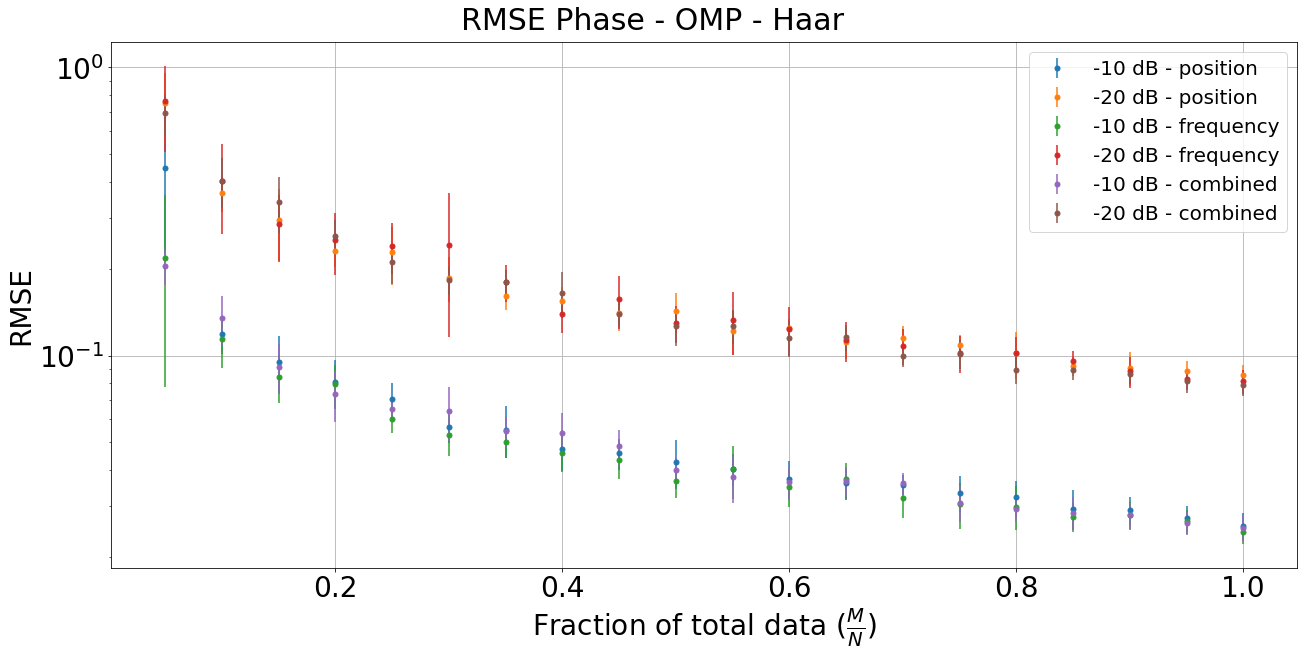

In [66]:
fontsize = 28
fig, ax = plt.subplots(figsize=(18,9),sharex=True,constrained_layout=True)
ax.errorbar(percentage,rmse_omp_phase_haar_pos_minus10dB,yerr=rmse_omp_error_phase_haar_pos_minus10dB,label='-10 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_pos_minus20dB,yerr=rmse_omp_error_phase_haar_pos_minus20dB,label='-20 dB - position',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_freq_minus10dB,yerr=rmse_omp_error_phase_haar_freq_minus10dB,label='-10 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_freq_minus20dB,yerr=rmse_omp_error_phase_haar_freq_minus20dB,label='-20 dB - frequency',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_combined_minus10dB,yerr=rmse_omp_error_phase_haar_combined_minus10dB,label='-10 dB - combined',fmt='.',markersize=markersize)
ax.errorbar(percentage,rmse_omp_phase_haar_combined_minus20dB,yerr=rmse_omp_error_phase_haar_combined_minus20dB,label='-20 dB - combined',fmt='.',markersize=markersize)
ax.set_yscale('log')
ax.set_xlabel(r'Fraction of total data $(\frac{M}{N})$',fontsize=fontsize)
ax.set_ylabel(r'RMSE',fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize-8)
ax.grid()
fig.suptitle('RMSE Phase - OMP - Haar',fontsize=fontsize+2)
